
# Final Project Starter


---
## Project Description:
### Can you predict loan default?
> You’ve recently joined a major financial institution and are tasked with developing and comparing several machine learning models to predict “loan status”. Specifically which loans are likely to default. Since we now work in a regulated industry, we need to ensure that our models are both explainable and that the predictions that we create can be explained; and most importantly we can document what we did!  


### Models to be Evaluated.

You will train and evaluate different models

- Logistic Regression: Serves as a baseline for performance comparison.
- Random Forest: An ensemble method known for its robustness and ability to handle complex data structures.
- Gradient Boosting Machine (GBM) OR XGBoost: Advanced ensemble techniques known for their predictive power.
- Neural Network: An approximation method known for it’s ability to identify non-linear relationships.
- StackingClassifier or AutoGluon Weighted Ensemble.

### Methodology / Approach
#### Data Exploration and Preprocessing
1.	Exploratory Data Analysis (EDA): Conduct an initial analysis to understand the data's characteristics, including distribution of the target variable, missing values, and potential outliers.
2.	Data Preprocessing: Address missing values, deal with extreme values, encode categorical variables, and prepare the data for modeling.
####  Model Development
1.	Model Training: Develop models using Logistic Regression, Random Forest, and GBM/XGBoost, Neural Network and an AugoGluon or SKLEARN stacking ensemble model on the training data.
2.	Parameter Tuning: Optimize model parameters to enhance performance – for scikit-learn based models.
#### Global Model Explanations
1.	Model Comparison: Compare the models based on their performance and feature importance scores to identify the most effective model on both the train and test sets. What metric should you choose to pick the best performing model and why?
2.	Feature Importance: compare the feature importance from one model to another, why would they be different?
3.	Roc Curve & PR Curves on TEST set. you need to plot all of your models with a ROC curve and a PR curve, explain what they mean and how to interpret them.
4.	Partial Dependance Plot: Pick your best performing model and generate partial dependance plots explaining the AVERAGE impact to predictions in a way that a business person can understand.
5.	Operational Strategy at 2% and at 5% FPR: Propose a strategy to achieve and maintain a 2% and also 5% false positive rate, detailing its implications on recall and precision. What does this mean for the business in plain language?

#### Local Explanations
Using your best performing model, make predictions on your test set and identify the TOP 10 best True Positives, your TOP 10 False Positives and your Top 10 False Negatives. Eyeball the data, or use plots or trees or some other method to explain why you think you gave a prediction a particular score. Is there a pattern or common theme that you notice for wrong predictions?

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Load all the necessary packages from the Smote with Pipelines Notebook
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -- sklearn modules
from sklearn.model_selection import train_test_split    #- partition train/test split
from sklearn.linear_model import LogisticRegression     #- logistic regression classifier
from sklearn.ensemble import RandomForestClassifier     #- random forest classifier
from sklearn.ensemble import GradientBoostingClassifier #- GBM classfier
from sklearn.neural_network import MLPClassifier        #- multi-layer perceptron
from sklearn.ensemble import StackingClassifier

# -- we need these to make our pipelines
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_curve, auc

# -- we need these to evaluate our models
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# -- need this to render charts in notebook --
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
# --
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# --
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler


## Import Data



In [ ]:
loan = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ames Projects Python and SQL/loan_train.csv')
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  \
0  1077501.0  1296599.0     5000.0       5000.0           4975.0  36 months   
1  1077430.0  1314167.0     2500.0       2500.0           2500.0  60 months   
2  1076863.0  1277178.0    10000.0      10000.0          10000.0  36 months   
3  1069639.0  1304742.0     7000.0       7000.0           7000.0  60 months   
4  1072053.0  1288686.0     3000.0       3000.0           3000.0  36 months   

  int_rate  installment grade sub_grade  ... next_pymnt_d last_credit_pull_d  \
0   10.65%       162.87     B        B2  ...          NaN           Sep-2016   
1   15.27%        59.83     C        C4  ...          NaN           Sep-2016   
2   13.49%       339.31     C        C1  ...          NaN           Apr-2016   
3   15.96%       170.08     C        C5  ...          NaN           Sep-2016   
4   18.64%       109.43     E        E1  ...          NaN           Dec-2014   

  collections_12_mths_ex_med  policy_code application_type acc_now_delinq  \
0                        0.0          1.0       INDIVIDUAL            0.0   
1                        0.0          1.0       INDIVIDUAL            0.0   
2                        0.0          1.0       INDIVIDUAL            0.0   
3                        0.0          1.0       INDIVIDUAL            0.0   
4                        0.0          1.0       INDIVIDUAL            0.0   

  chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies tax_liens  
0                      0.0         0.0                  0.0       0.0  
1                      0.0         0.0                  0.0       0.0  
2                      0.0         0.0                  0.0       0.0  
3                      0.0         0.0                  0.0       0.0  
4                      0.0         0.0                  0.0       0.0  

[5 rows x 52 columns]

In [ ]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_rec_late_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

Column names already look clean, so no need to fix the column names. We also have a fair amount of financial data about a member, which is something that we know is critical for predicting defaulting on a loan

In [ ]:
print(loan.info())
print(f"Rows: {loan.shape[0]}, Columns: {loan.shape[1]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29777 entries, 0 to 29776
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          29774 non-null  float64
 1   member_id                   29774 non-null  float64
 2   loan_amnt                   29774 non-null  float64
 3   funded_amnt                 29774 non-null  float64
 4   funded_amnt_inv             29774 non-null  float64
 5   term                        29774 non-null  object 
 6   int_rate                    29774 non-null  object 
 7   installment                 29774 non-null  float64
 8   grade                       29774 non-null  object 
 9   sub_grade                   29774 non-null  object 
 10  emp_title                   27955 non-null  object 
 11  emp_length                  29015 non-null  object 
 12  home_ownership              29774 non-null  object 
 13  annual_inc                  297

With that being said, we have lots of object or string data so that a transformer is necessary if we wish to use these variables in our model.

#### Loan Status Stats
- 84.96% of observations are current (Make their payments)
- 15.04% of observations default on their loans
> We should expect to be mostly current/non-defaulting observations since majority of the original data set has current observations, but in this case we are curious on figuring out what features/variables actually determine event label (default or current/no-defaulting)

In [ ]:
loan.loan_status.value_counts(normalize=True).round(4)

current    0.8496
default    0.1504
Name: loan_status, dtype: float64

In [ ]:
# Count of Current and Default
loan['loan_status'].value_counts()

current    25300
default     4477
Name: loan_status, dtype: int64

---
### Describe the Data

In [ ]:
def df_profile(df, target):

    df = df.copy()

    numeric_features = [ c for c in df.select_dtypes(include = np.number).columns ]
    pd.options.display.float_format = '{:.5f}'.format

    categorical_features = [ c for c in df.select_dtypes(include = "object").columns ]

    rowcnt = len(df)
    df_s1  = df.agg(['count', 'nunique','mean','min','max']).transpose().reset_index().rename(columns={"index":"feature_name"}).round(4)
    df_s1['count'] = df_s1['count'].astype('int64')
    df_s1['nunique'] = df_s1['nunique'].astype('int64')
    df_s1["null"] = (rowcnt - df_s1["count"]).astype('int64')
    df_s1["not_null"] = rowcnt - df_s1["null"]
    df_s1["null_pct"] = df_s1["null"] / rowcnt
    df_s1["nunique_pct"] = df_s1['nunique'] / rowcnt


    dt = pd.DataFrame(df.dtypes).reset_index().rename(columns={"index":"feature_name", 0:"dtype"})
    df_stats = pd.merge(dt, df_s1, on='feature_name', how='inner')

    df_stats = df_stats.sort_values("dtype").reset_index(drop=True)

    df_stats['feature_type'] = "UNKNOWN"
    df_stats.loc[np.logical_or(df_stats['dtype'] == int, df_stats['dtype'] == float), 'feature_type'] = "NUMERIC"
    df_stats.loc[df_stats['dtype'] == object, 'feature_type'] = "CATEGORY"
    df_stats.loc[df_stats['feature_name'] == target, 'feature_type'] = "TARGET"

    df_stats['feature_warning'] = "NO WARNING"
    df_stats.loc[df_stats['nunique_pct'] > 0.9, 'feature_warning'] = "EXCLUDE, GT 90% UNIQUE"
    df_stats.loc[df_stats['null_pct'] > 0.2, 'feature_warning'] = "NULL WARNING, GT 20% MISSING"
    df_stats.loc[df_stats['null_pct'] > 0.5, 'feature_warning'] = "EXCLUDE, GT 50% MISSING"
    df_stats.loc[np.logical_and(np.logical_or(df_stats['dtype'] == int, df_stats['dtype'] == float), df_stats['nunique'] <= 20), 'feature_warning'] = "LIKELY CATEGORICAL, NUMERIC w. LOW CARDINALITY"

    return df_stats

dfp = df_profile(loan, 'loan_status')
dfp

feature_name    dtype  count  nunique         mean  \
0                           id  float64  29774    29774 663006.18452   
1               fico_range_low  float64  29774       43    713.05317   
2              fico_range_high  float64  29774       43    717.05317   
3               inq_last_6mths  float64  29754       27      1.08409   
4       mths_since_last_delinq  float64  10870       90     34.71582   
5       mths_since_last_record  float64   2569      107     59.22538   
6                     open_acc  float64  29754       44      9.33901   
7                      pub_rec  float64  29754        6      0.05855   
8                    revol_bal  float64  29774    18399  14310.00064   
9         pub_rec_bankruptcies  float64  28811        3      0.04533   
10                   total_acc  float64  29754       78     22.08278   
11               out_prncp_inv  float64  29774      384     11.76432   
12          total_rec_late_fee  float64  29774     1604      1.50478   
13             last_pymnt_amnt  float64  29774    26903   2615.40548   
14  collections_12_mths_ex_med  float64  29673        1      0.00000   
15                 policy_code  float64  29774        1      1.00000   
16              acc_now_delinq  float64  29754        2      0.00013   
17    chargeoff_within_12_mths  float64  29673        1      0.00000   
18                 delinq_amnt  float64  29754        3      0.20434   
19                   out_prncp  float64  29774      383     11.79629   
20                         dti  float64  29774     2846     13.38403   
21                 delinq_2yrs  float64  29754       11      0.15504   
22                   tax_liens  float64  29698        2      0.00003   
23                   member_id  float64  29774    29774 823568.14597   
24                   loan_amnt  float64  29774      827  11109.43441   
25                 funded_amnt  float64  29774      981  10843.63707   
26             funded_amnt_inv  float64  29774     6862  10149.65531   
27                  annual_inc  float64  29773     4286  69201.23229   
28                 installment  float64  29774    13255    323.80815   
29            application_type   object  29774        1          NaN   
30                        term   object  29774        2          NaN   
31          last_credit_pull_d   object  29772      109          NaN   
32                next_pymnt_d   object   2352       96          NaN   
33                    int_rate   object  29774      390          NaN   
34                last_pymnt_d   object  29710      106          NaN   
35                       grade   object  29774        7          NaN   
36                   sub_grade   object  29774       35          NaN   
37                    zip_code   object  29774      819          NaN   
38                  revol_util   object  29710     1094          NaN   
39                  emp_length   object  29015       11          NaN   
40              home_ownership   object  29774        5          NaN   
41         verification_status   object  29774        3          NaN   
42                     issue_d   object  29774       55          NaN   
43                 loan_status   object  29777        2          NaN   
44                  pymnt_plan   object  29774        2          NaN   
45                         url   object  29774    29774          NaN   
46            earliest_cr_line   object  29754      516          NaN   
47                        desc   object  20344    20309          NaN   
48                     purpose   object  29774       14          NaN   
49                  addr_state   object  29774       50          NaN   
50                       title   object  29763    15199          NaN   
51                   emp_title   object  27955    22141          NaN   

           min           max   null  not_null  null_pct  nunique_pct  \
0  54734.00000 1077501.00000      3     29774   0.00010      0.99990   
1    610.00000     825.00000      3     29774   0.00010  

As for what the likley predictors will be are going to be variables that are not biased and relate to demographics, along with variables that have too much unique values which makes it very hard to make predictions.

---
### Exploratory Data Analysis

#### Null Analysis

In [ ]:
# Null Analysis
loan.isnull().sum().sort_values(ascending=False)

next_pymnt_d                  27425
mths_since_last_record        27208
mths_since_last_delinq        18907
desc                           9433
emp_title                      1822
pub_rec_bankruptcies            966
emp_length                      762
chargeoff_within_12_mths        104
collections_12_mths_ex_med      104
tax_liens                        79
last_pymnt_d                     67
revol_util                       67
open_acc                         23
inq_last_6mths                   23
total_acc                        23
pub_rec                          23
acc_now_delinq                   23
delinq_amnt                      23
delinq_2yrs                      23
earliest_cr_line                 23
title                            14
last_credit_pull_d                5
annual_inc                        4
out_prncp_inv                     3
total_rec_late_fee                3
grade                             3
last_pymnt_amnt                   3
installment                 

#### Numeric Features

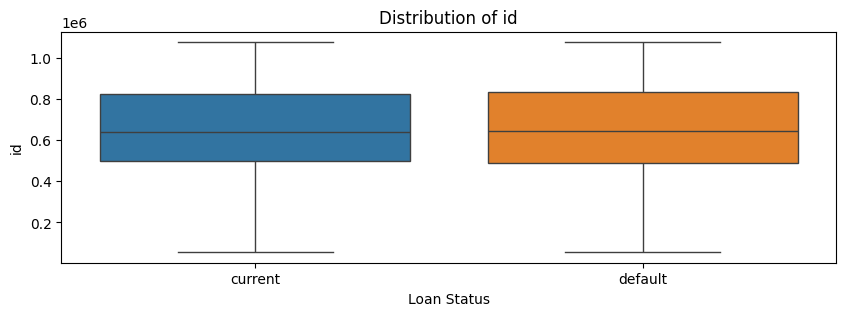

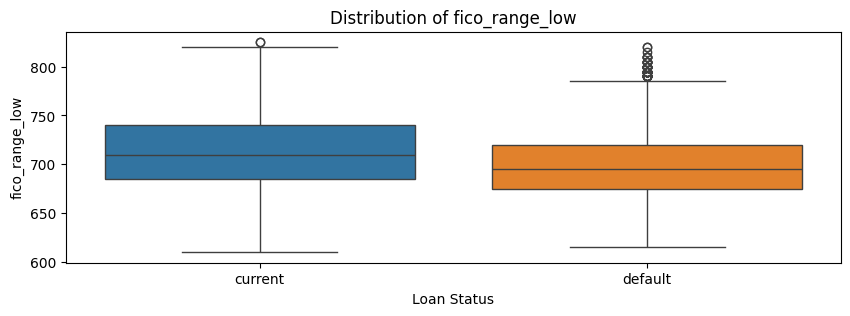

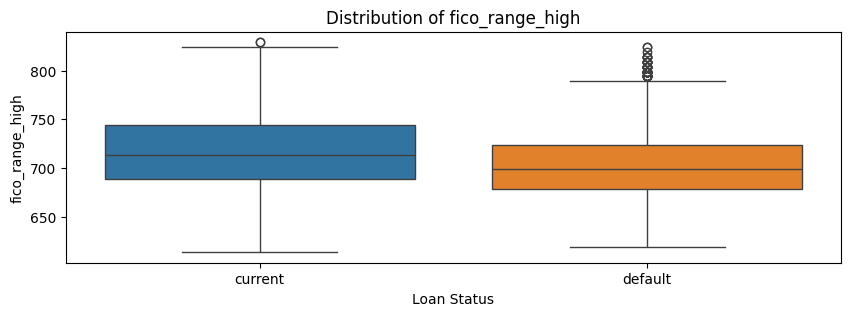

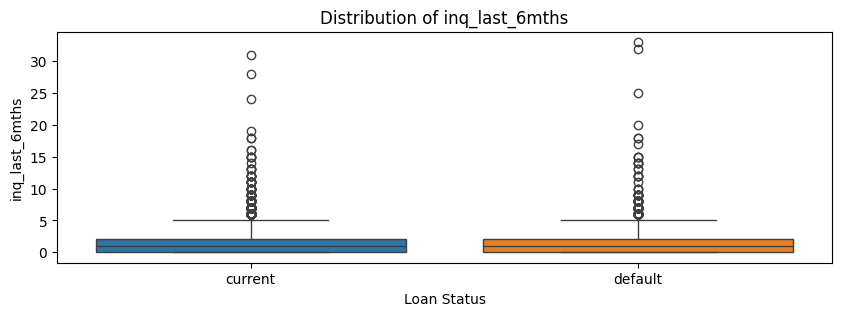

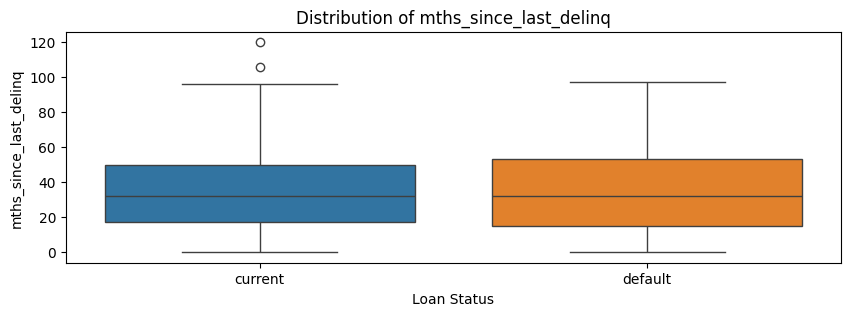

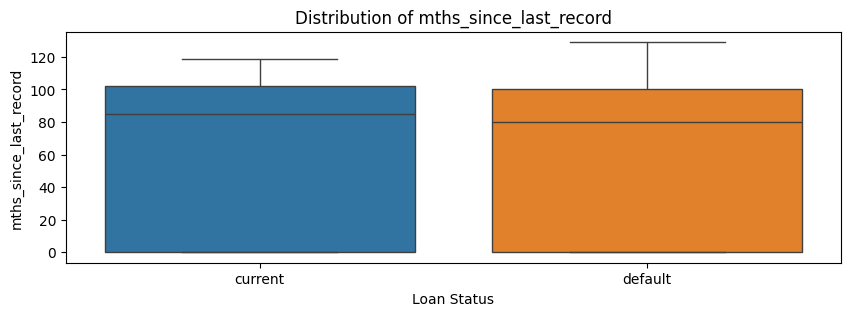

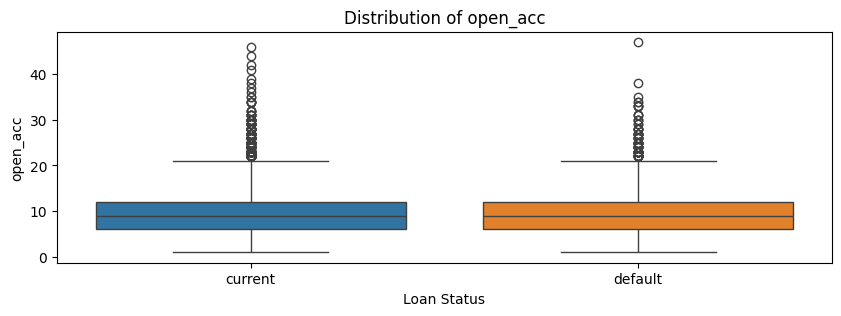

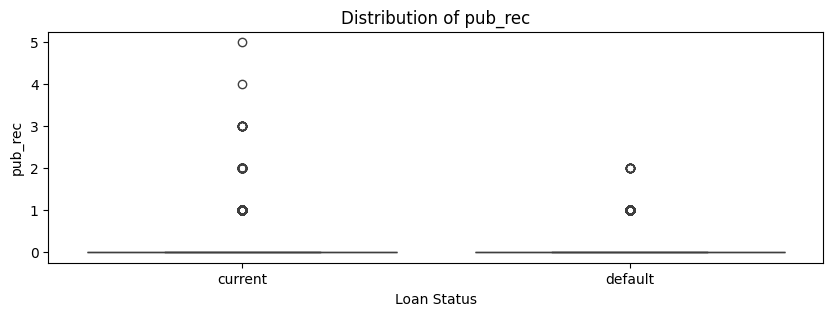

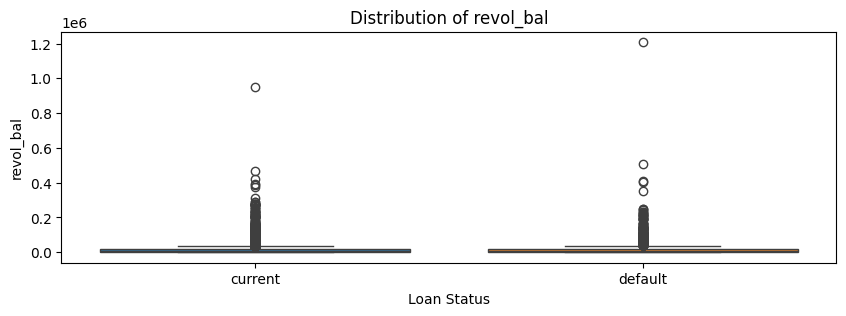

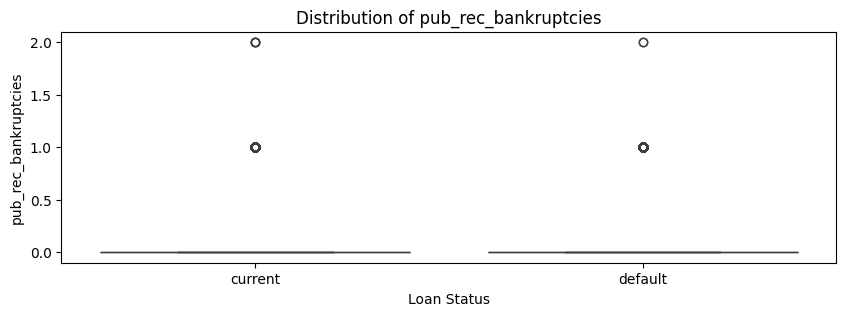

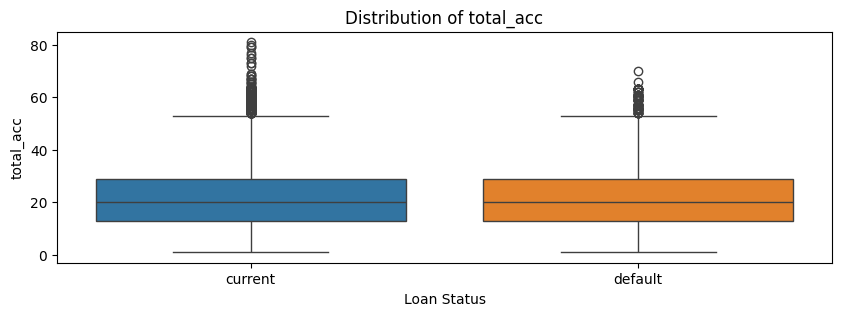

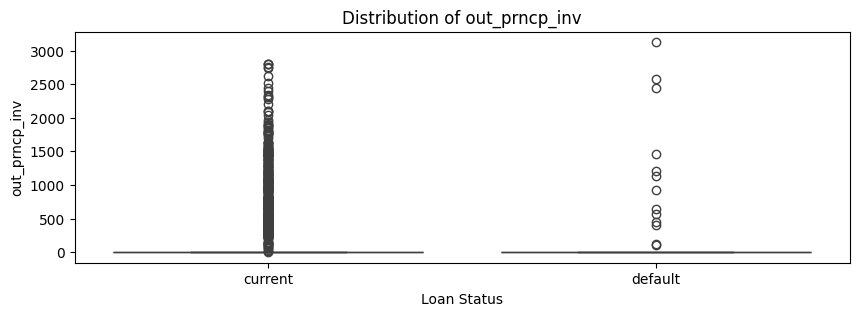

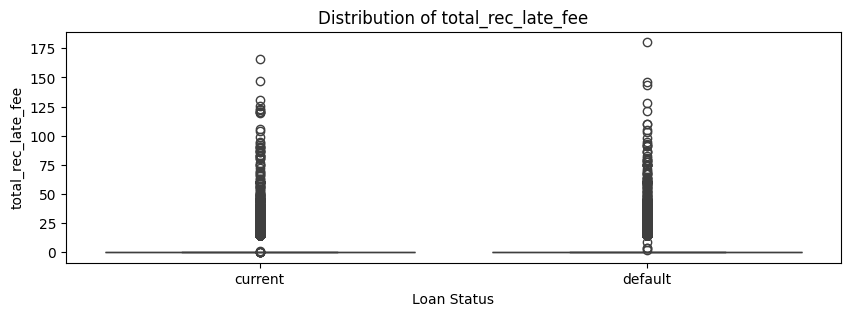

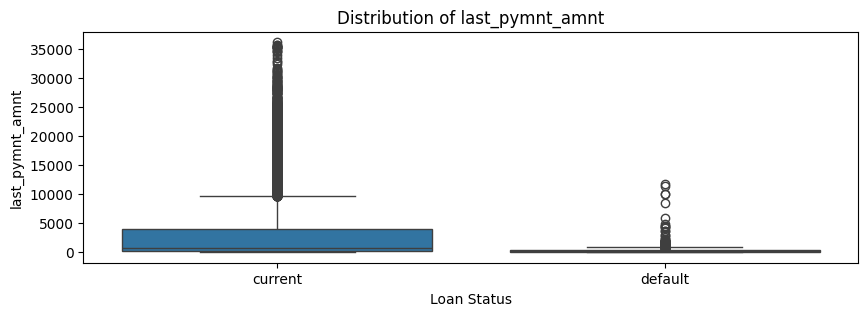

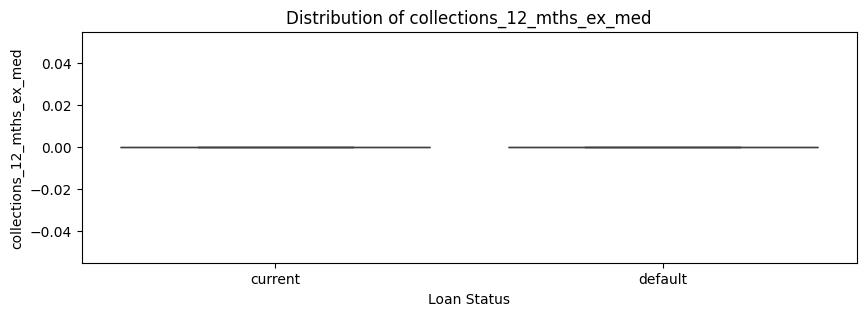

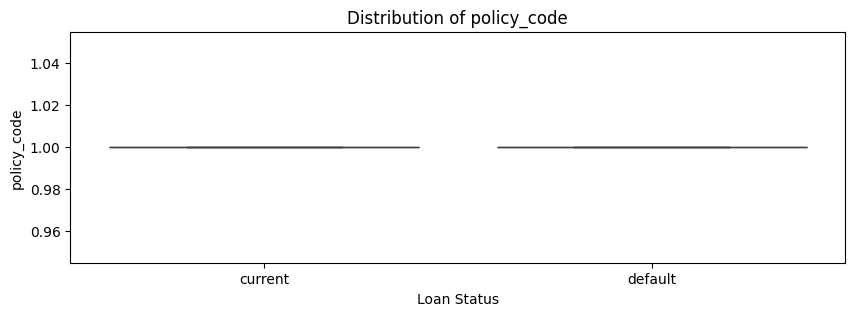

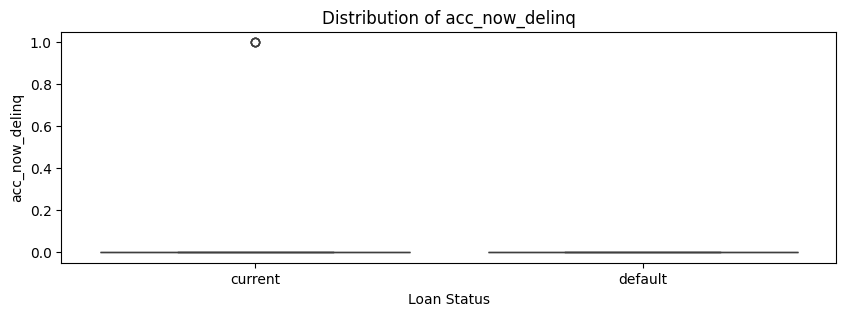

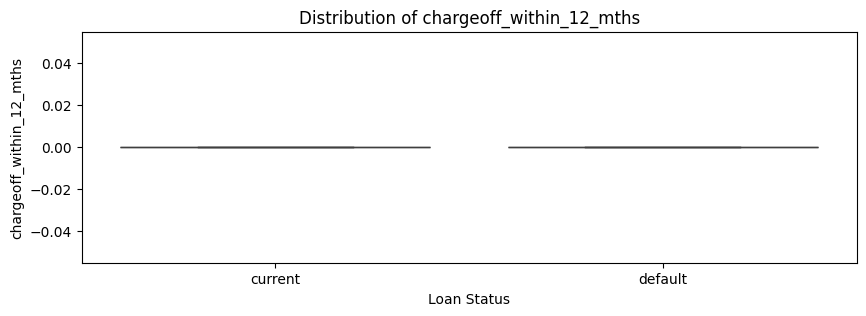

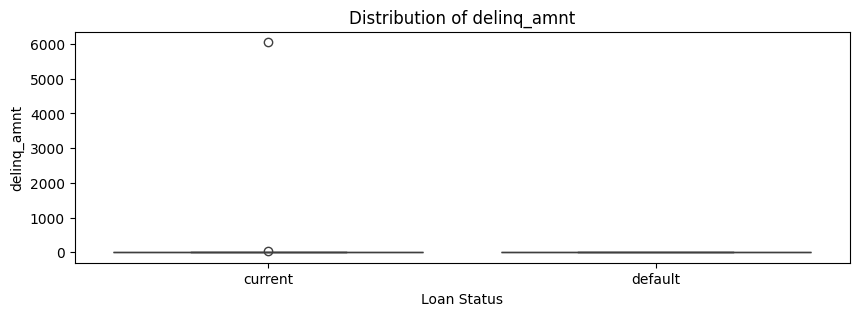

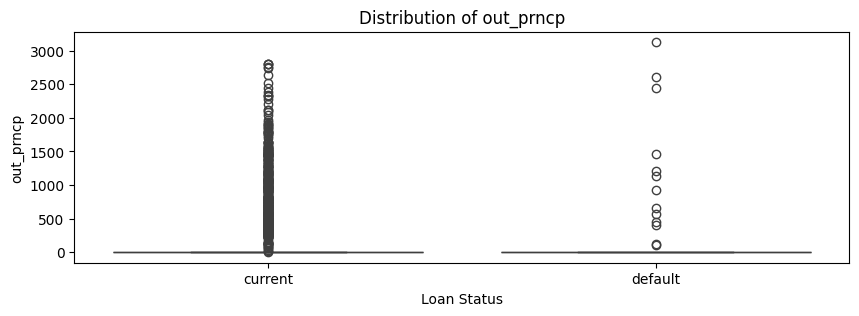

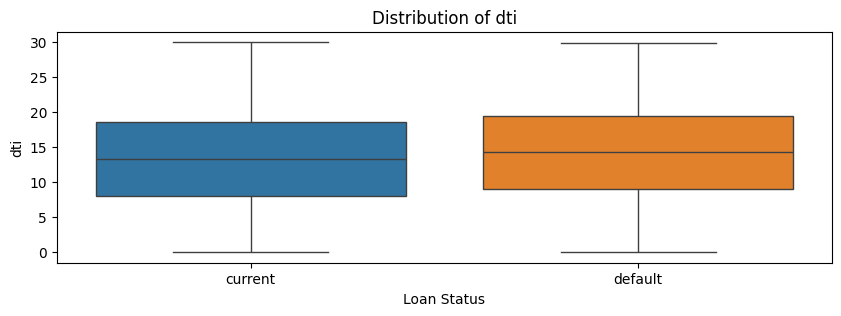

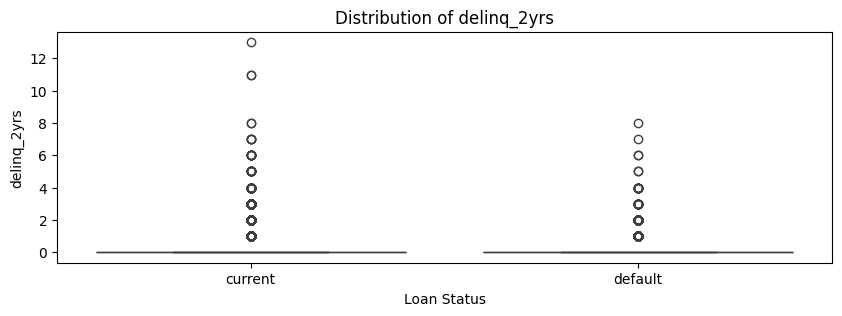

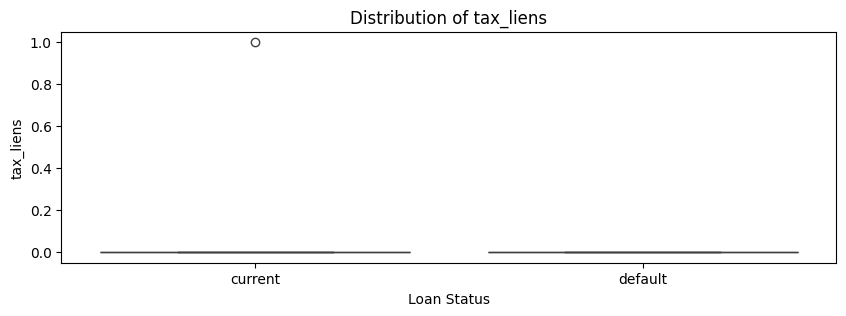

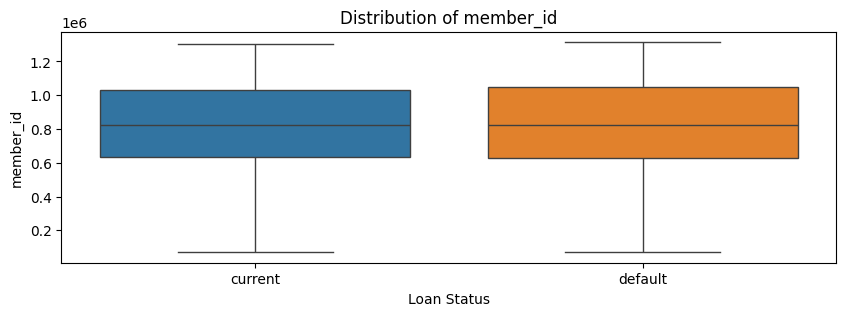

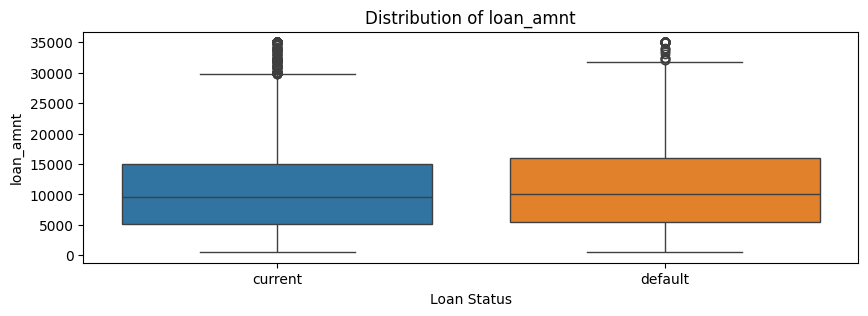

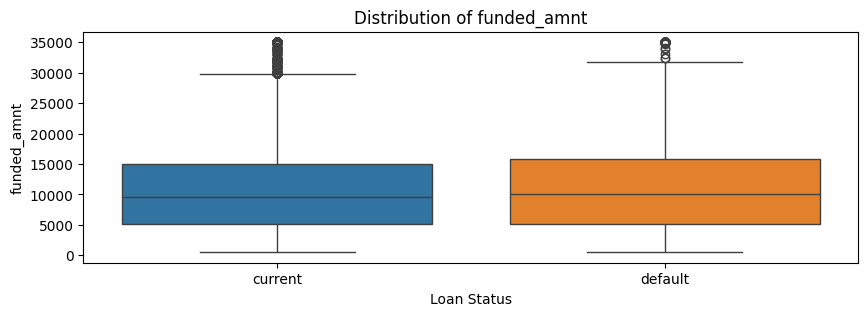

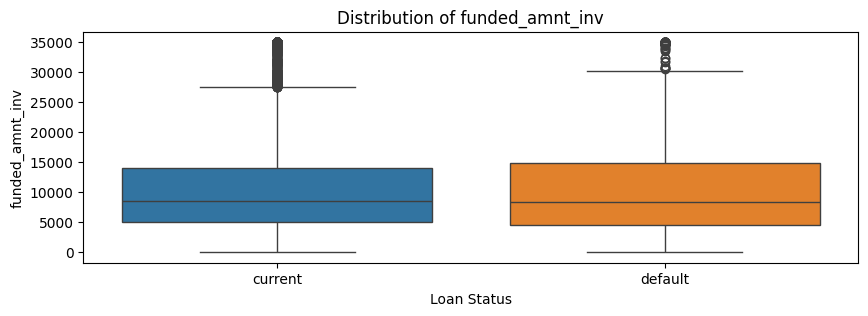

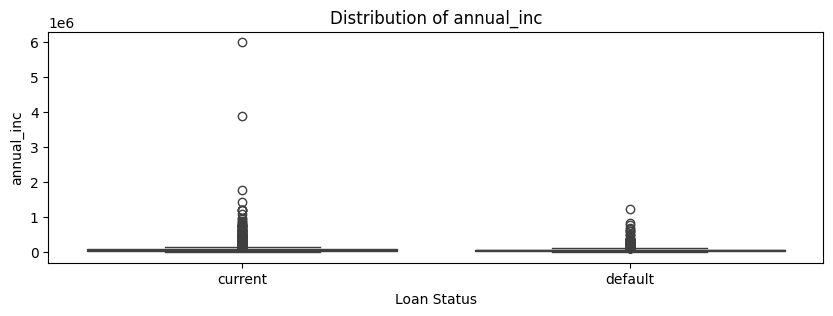

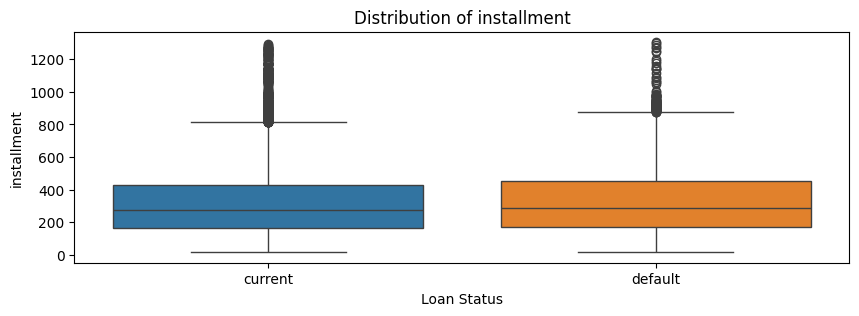

In [ ]:
numeric_features = dfp.query('feature_type == "NUMERIC"')['feature_name'].to_list()
for num_col in numeric_features:
  plt.figure(figsize=(10, 3))
  sns.boxplot(x='loan_status', y=num_col, hue = 'loan_status', data=loan)
  plt.title(f'Distribution of {num_col}')
  plt.xlabel('Loan Status')
  plt.ylabel(num_col)
  #plt.show()

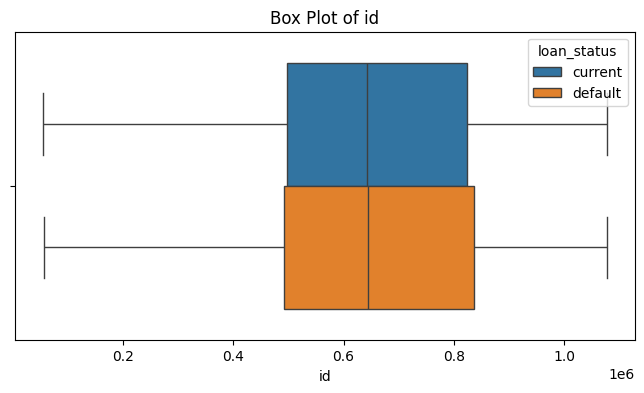

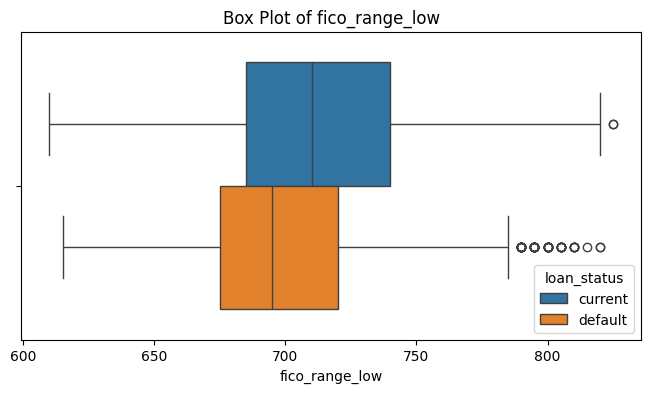

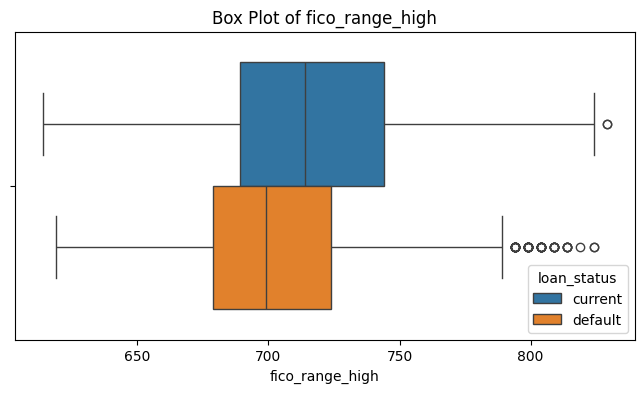

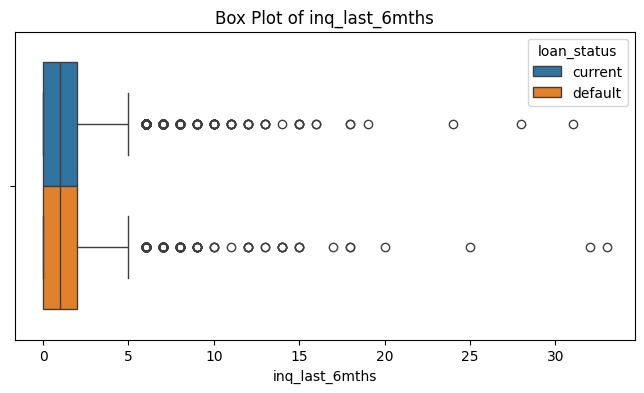

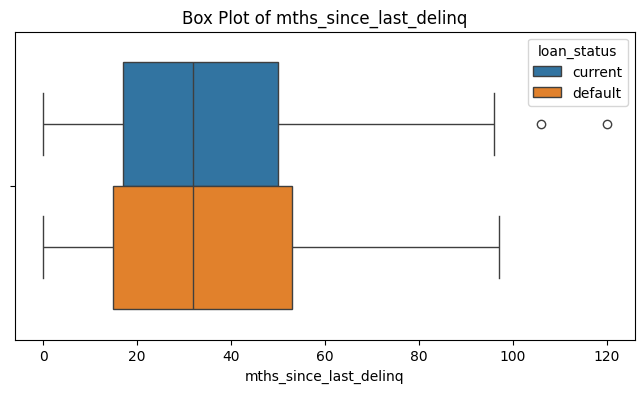

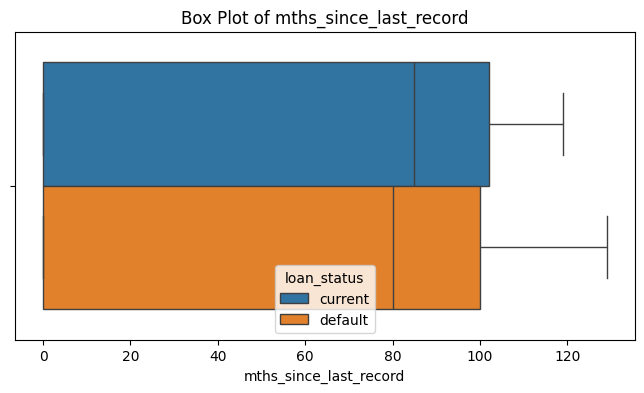

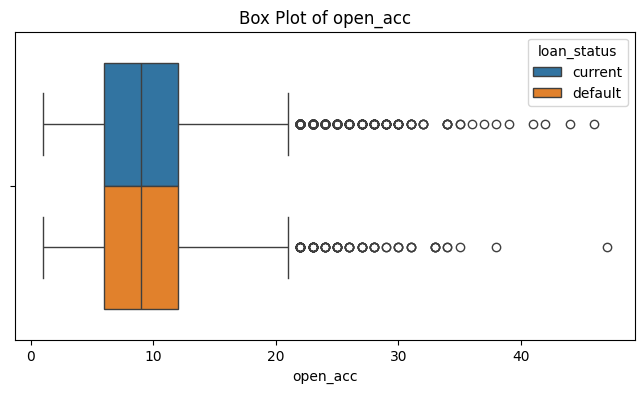

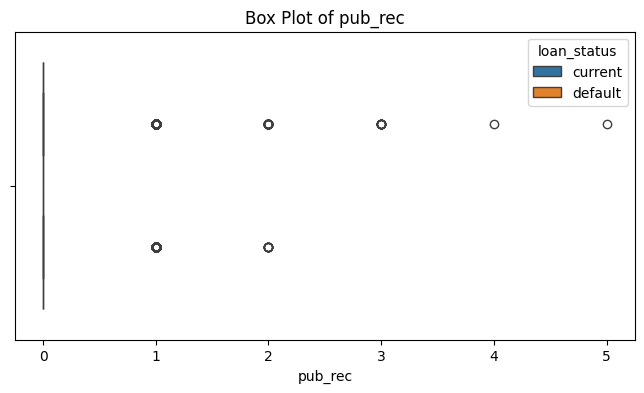

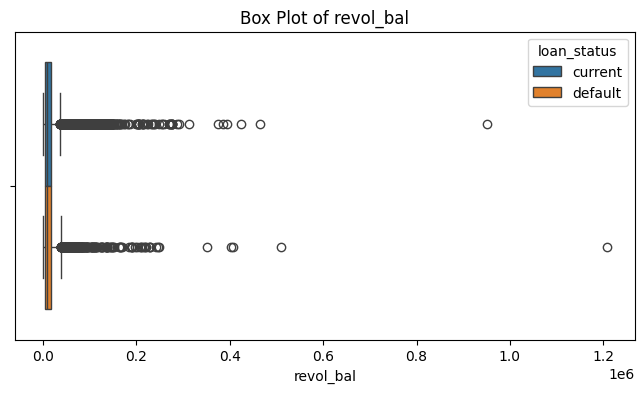

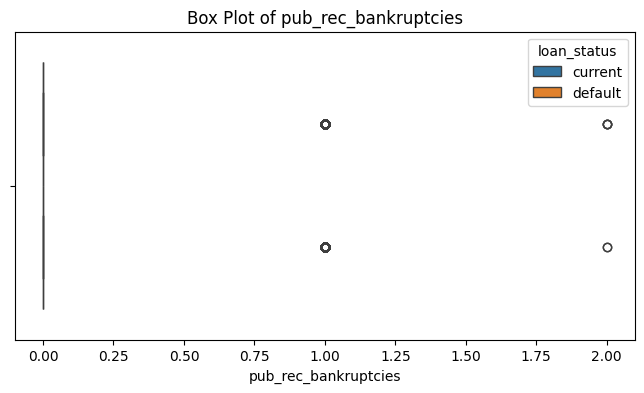

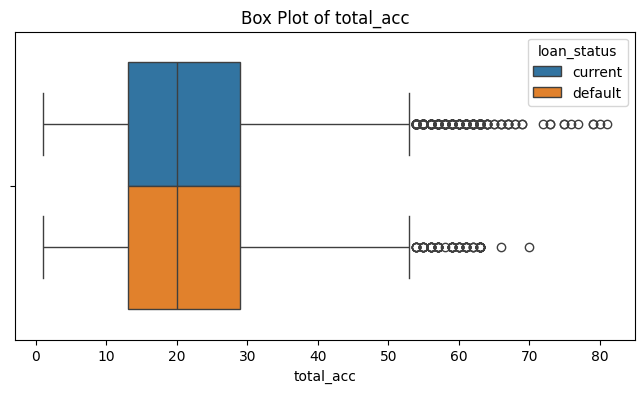

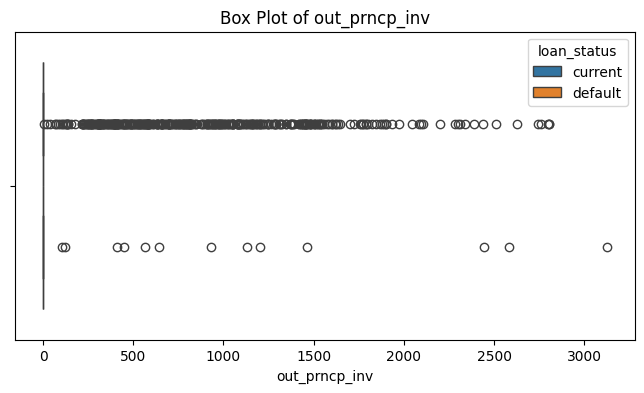

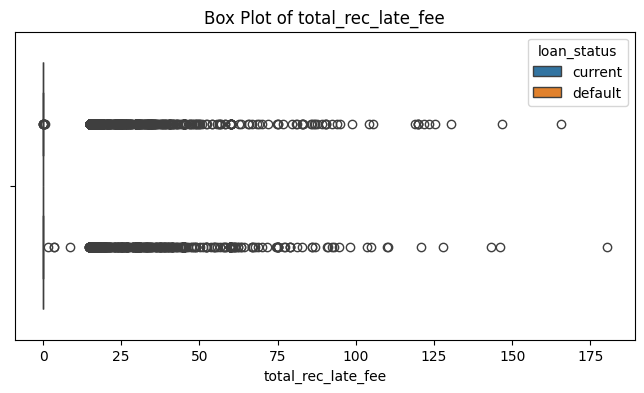

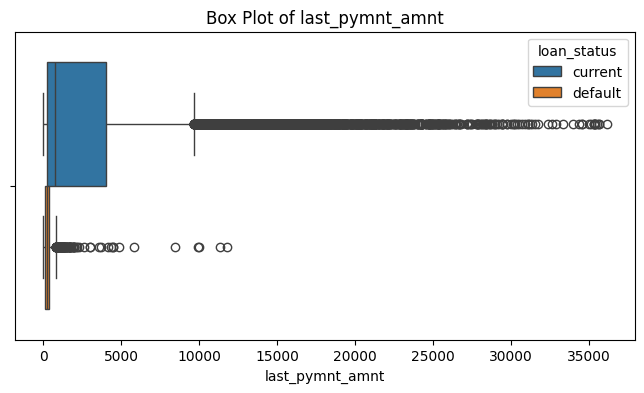

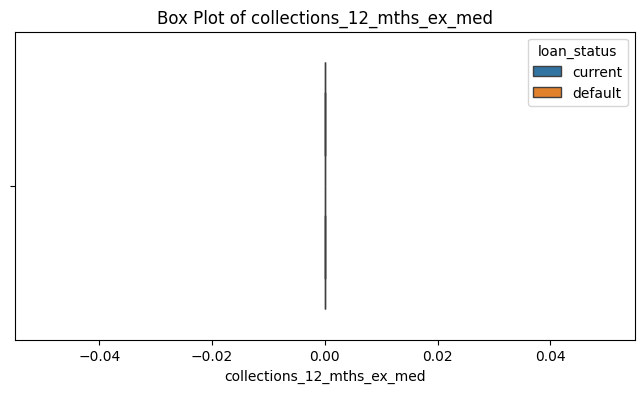

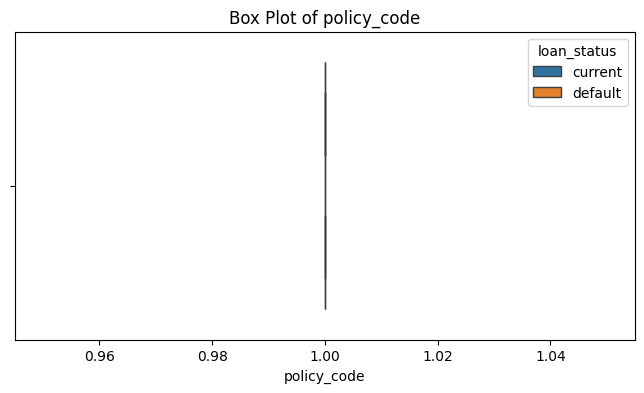

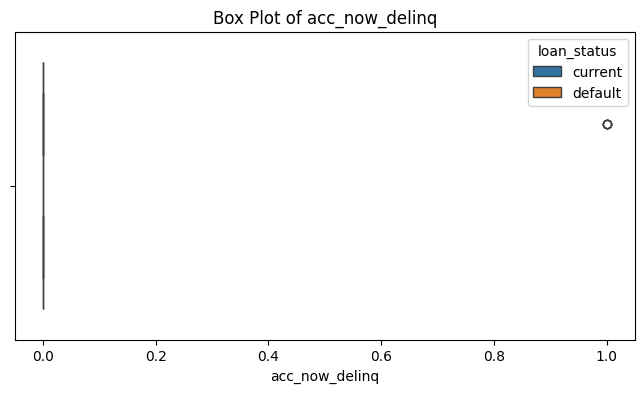

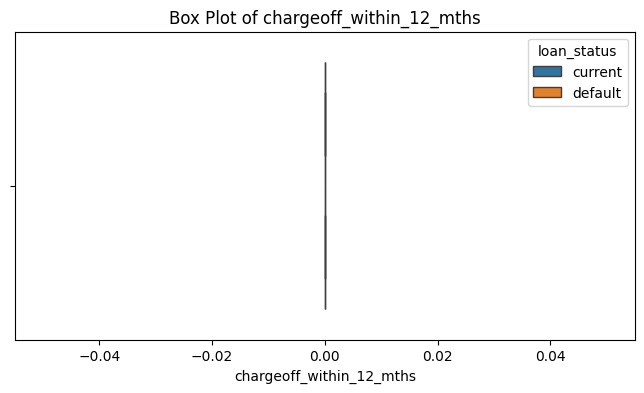

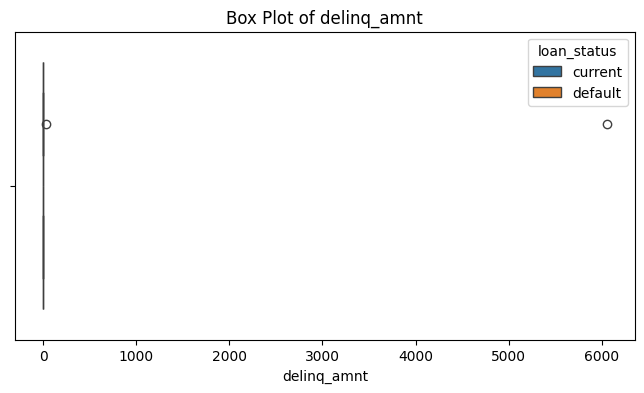

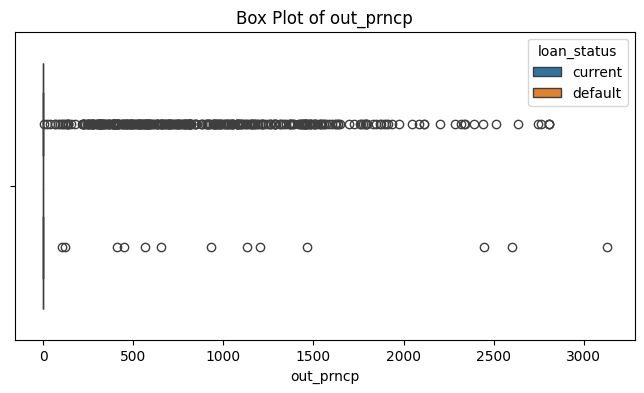

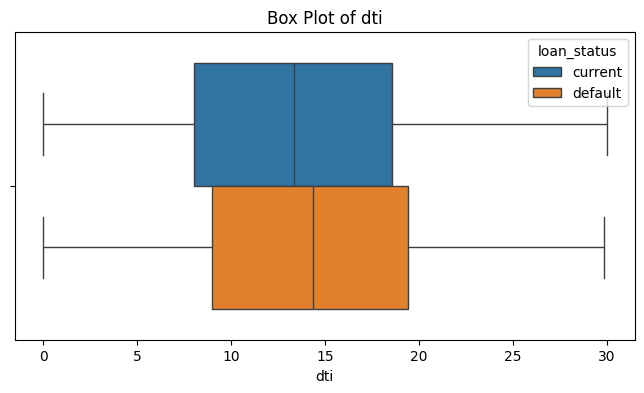

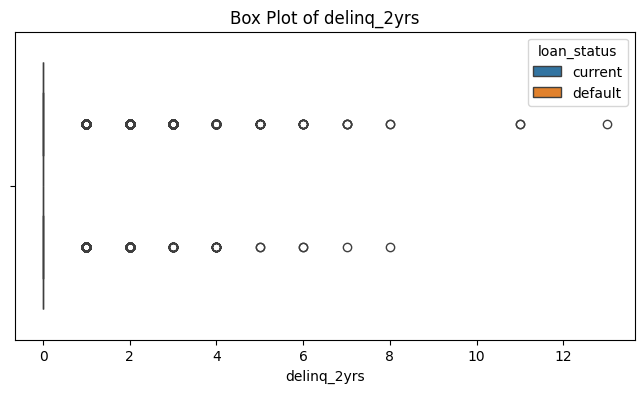

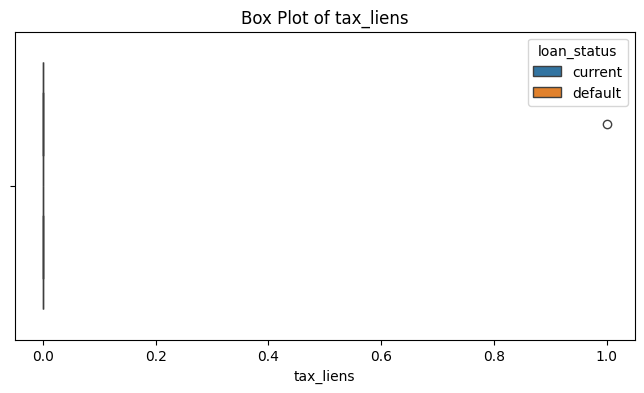

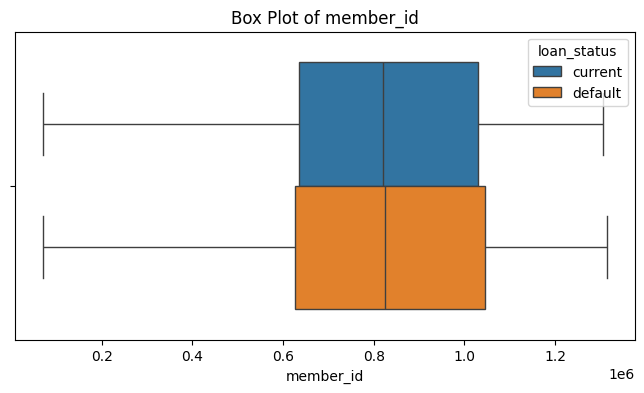

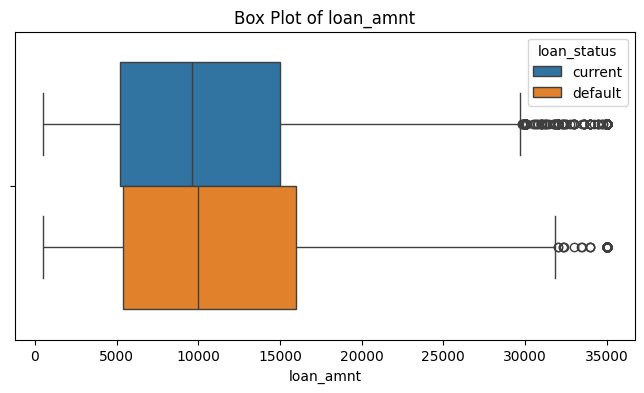

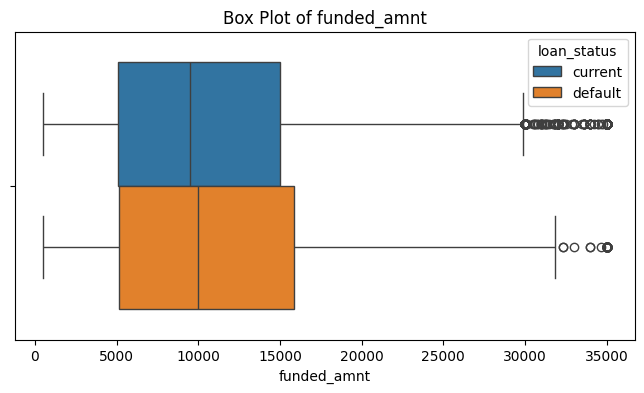

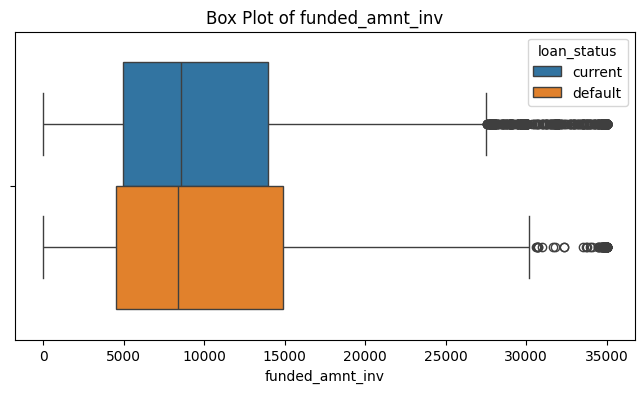

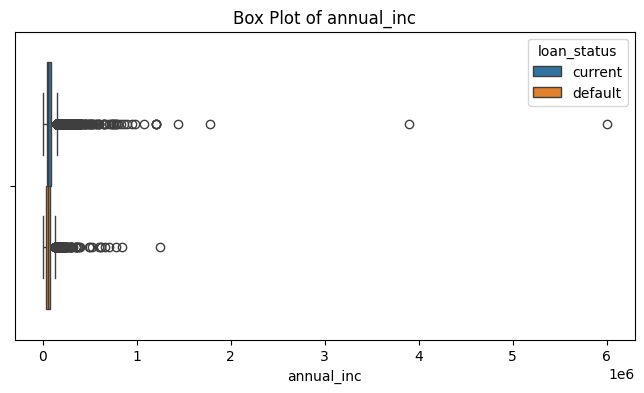

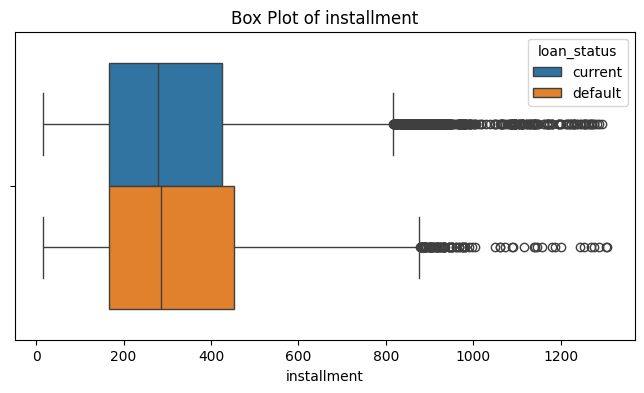

In [ ]:
for col in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=loan, x=col, hue="loan_status")
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

#### Target Variable

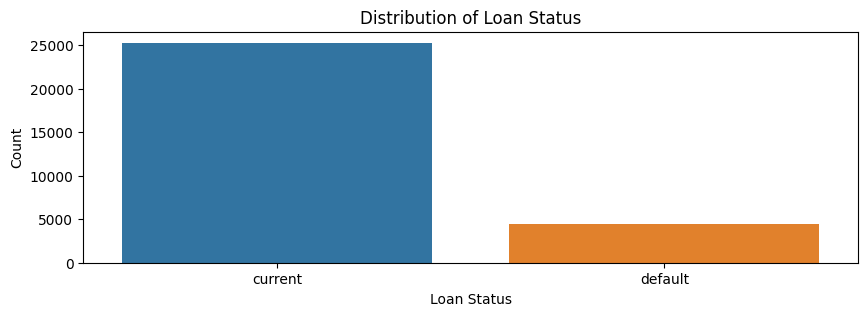

In [ ]:
plt.figure(figsize=(10, 3))
sns.countplot(x='loan_status', hue='loan_status', data=loan)
plt.title(f'Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

#### Explore Likely Predictors
- List of variables we will explore: []

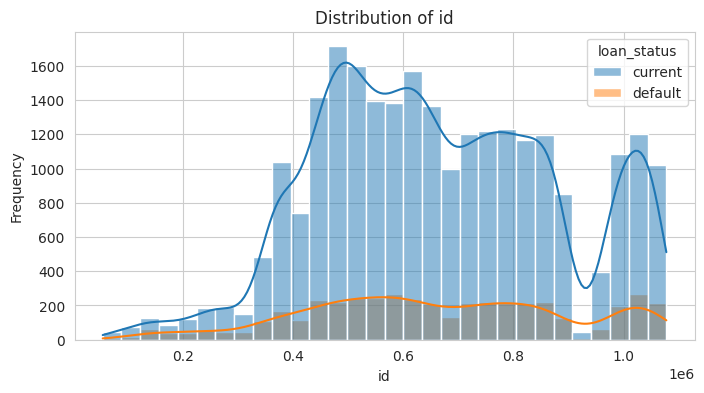

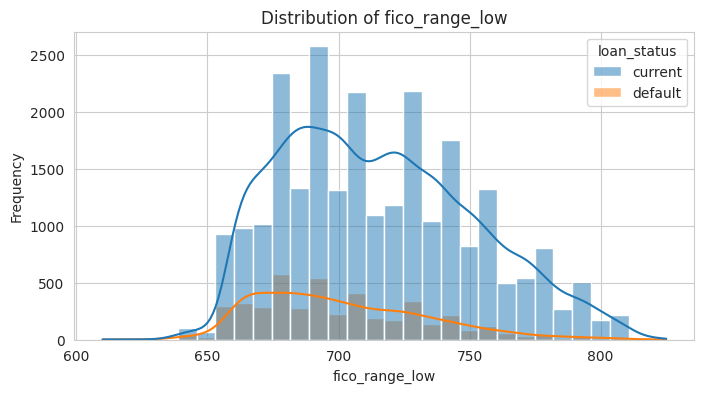

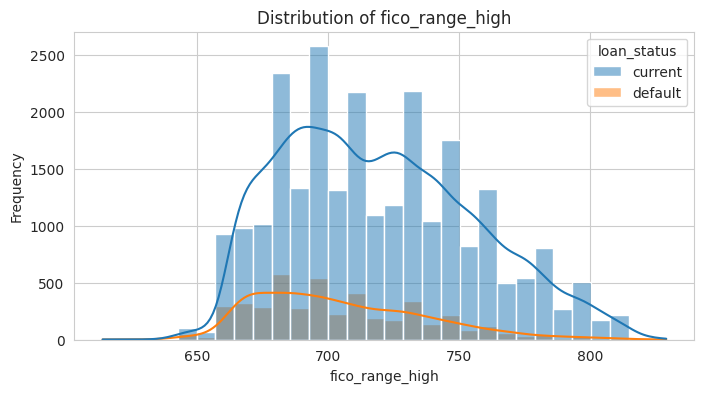

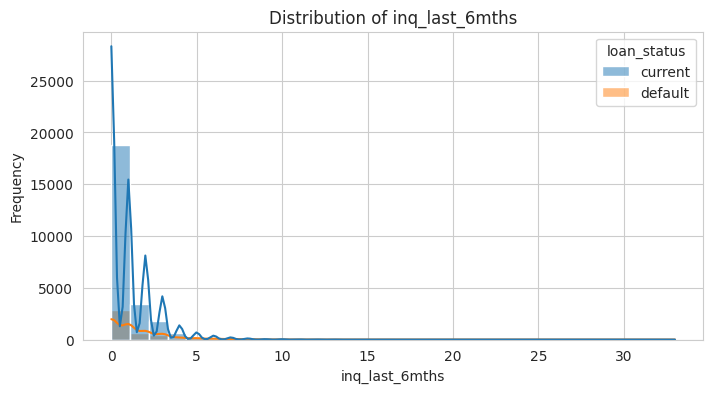

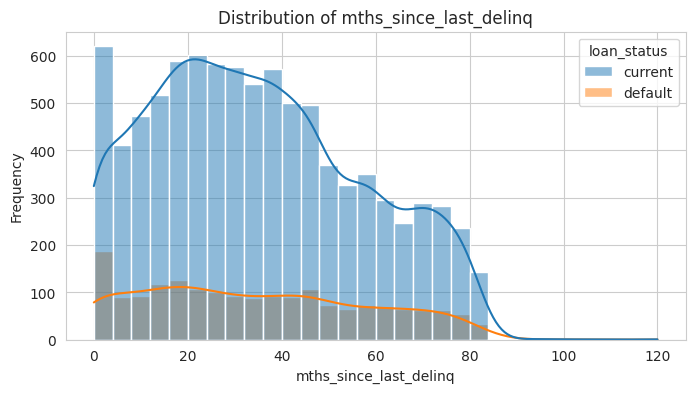

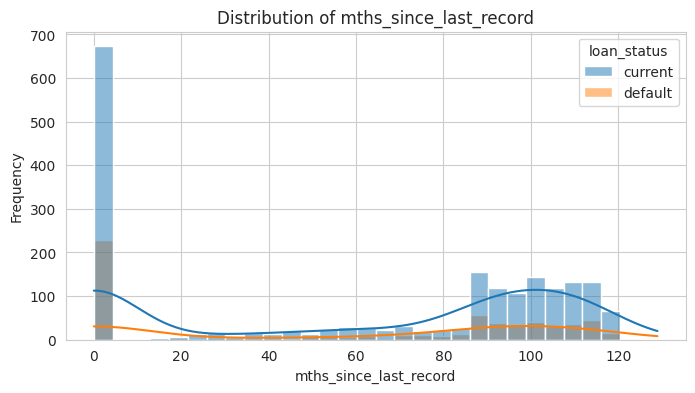

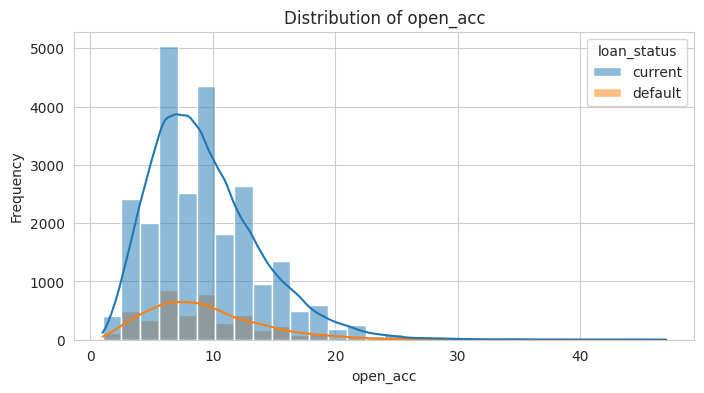

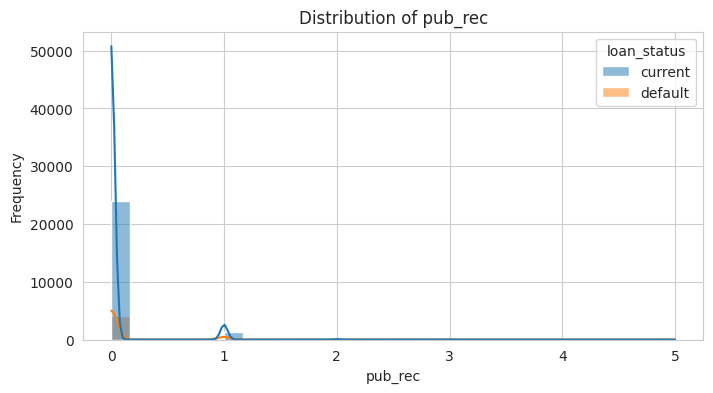

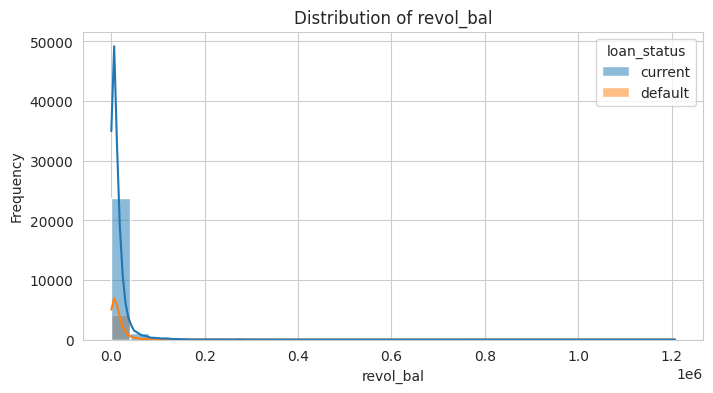

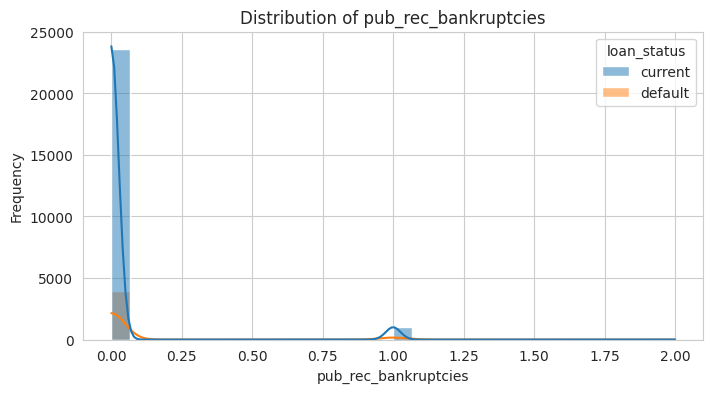

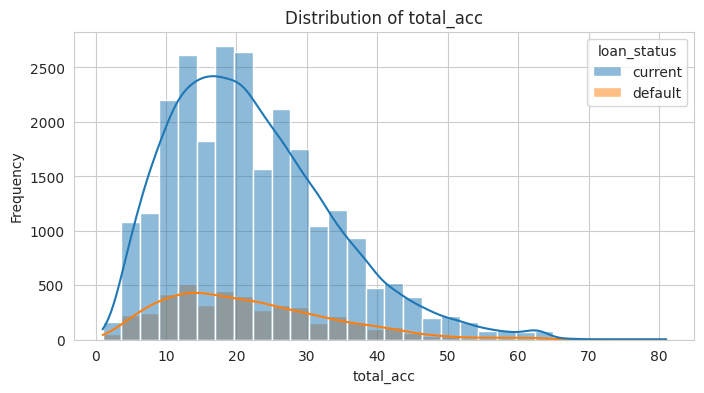

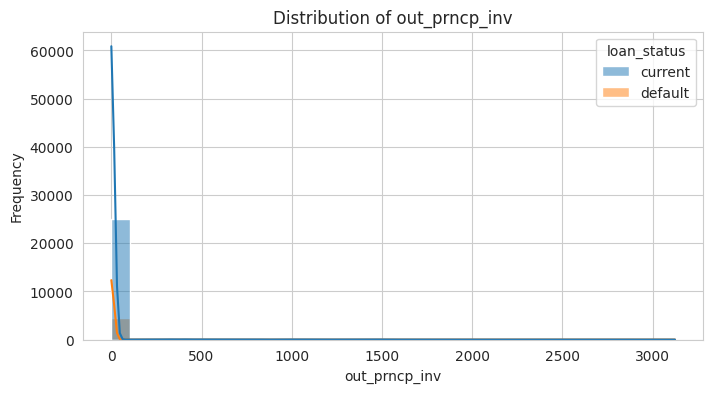

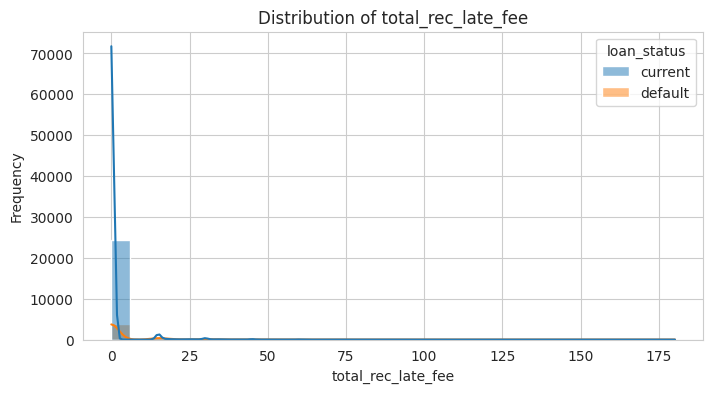

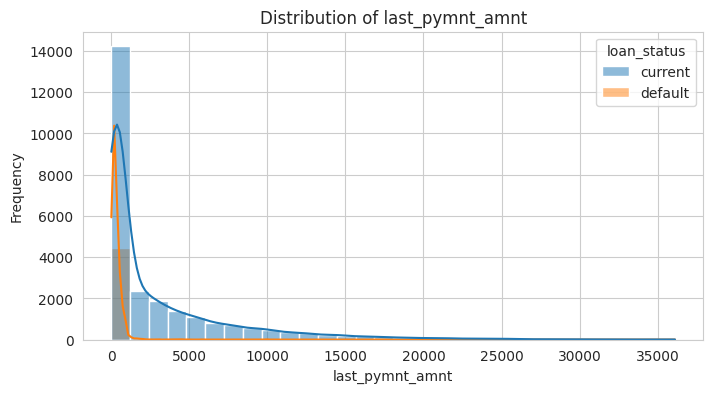

collections_12_mths_ex_med The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.
policy_code The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.


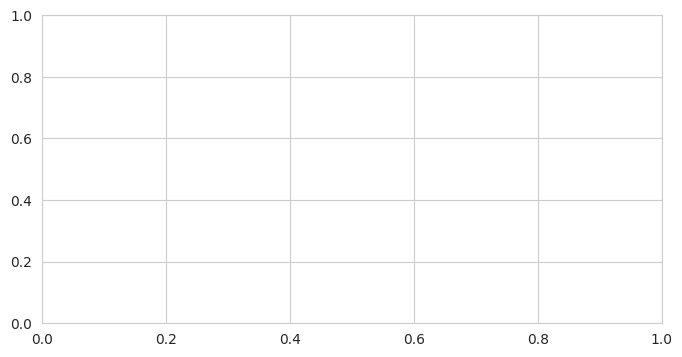

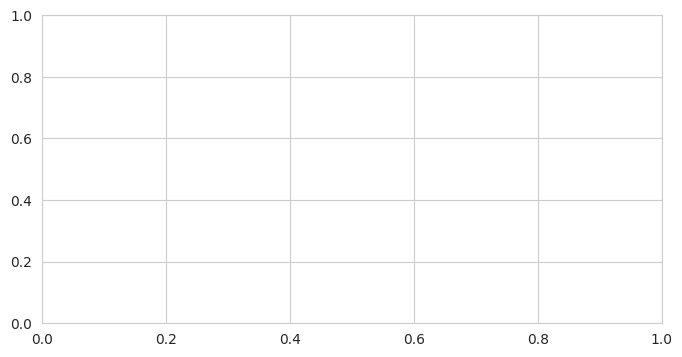

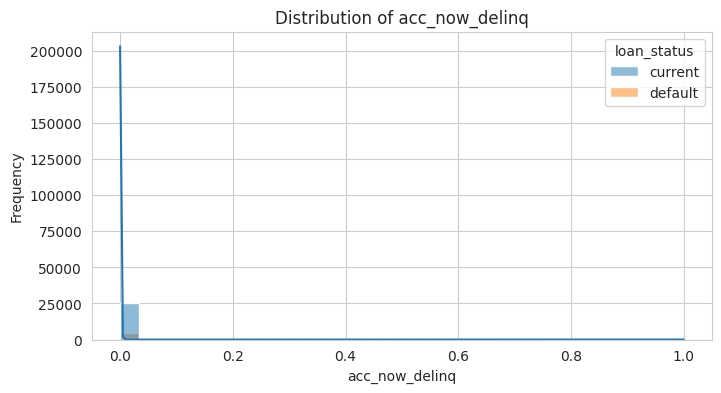

chargeoff_within_12_mths The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.


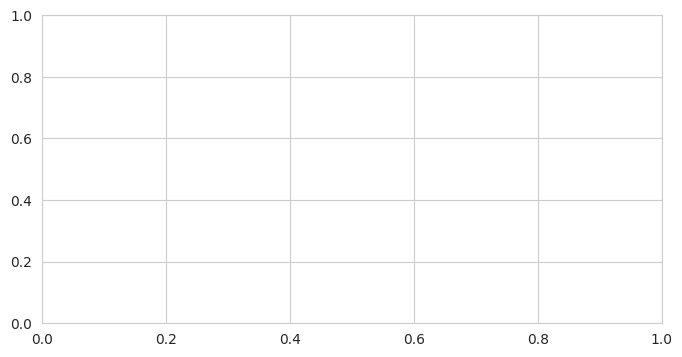

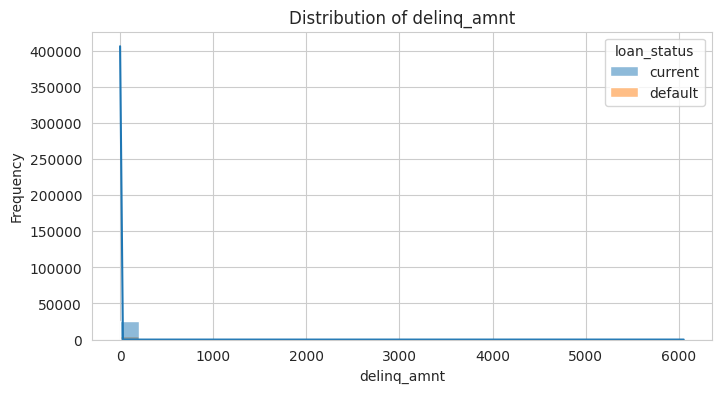

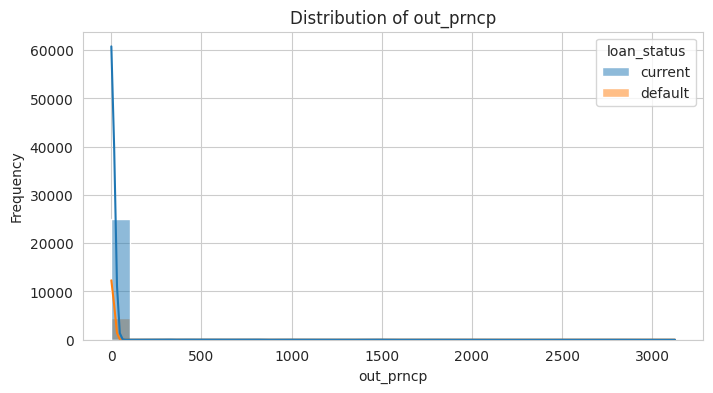

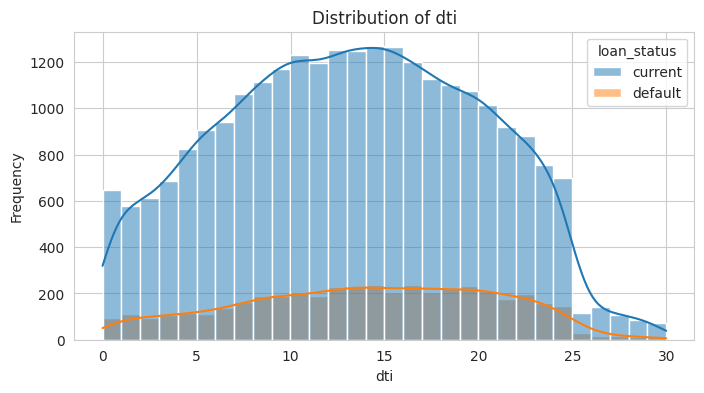

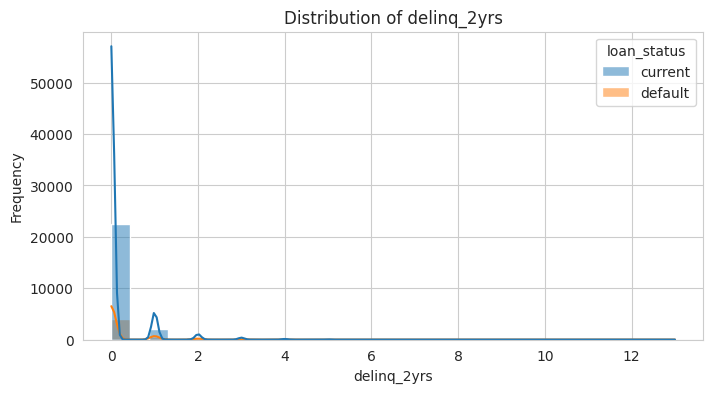

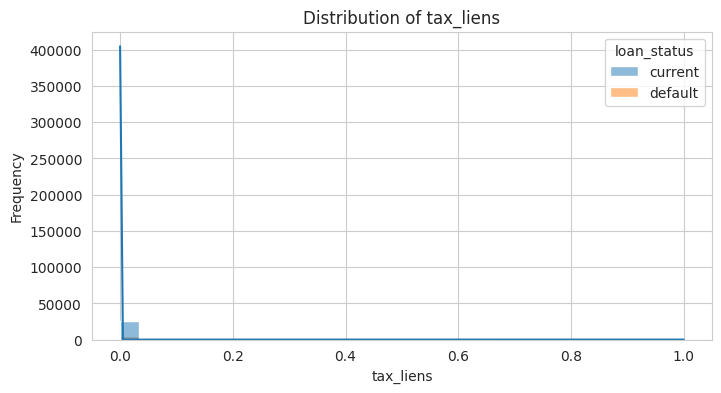

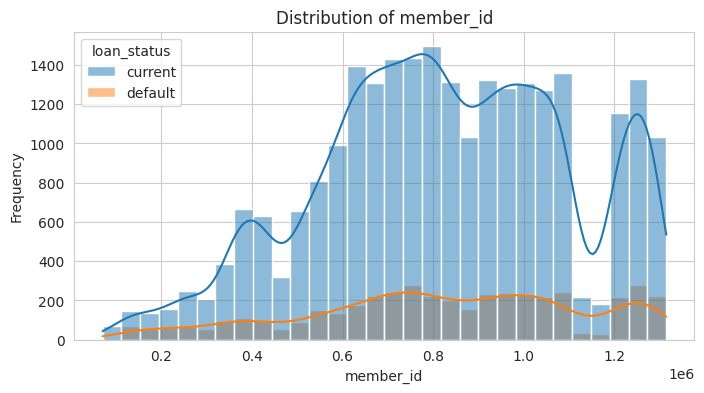

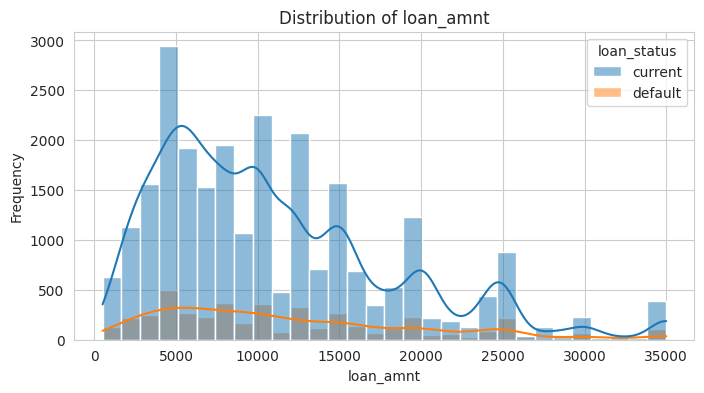

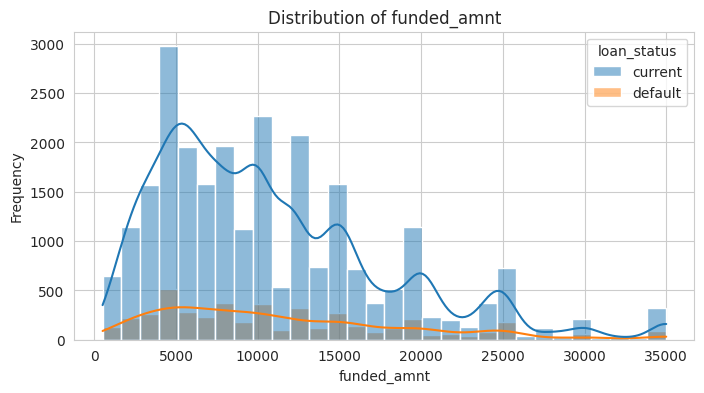

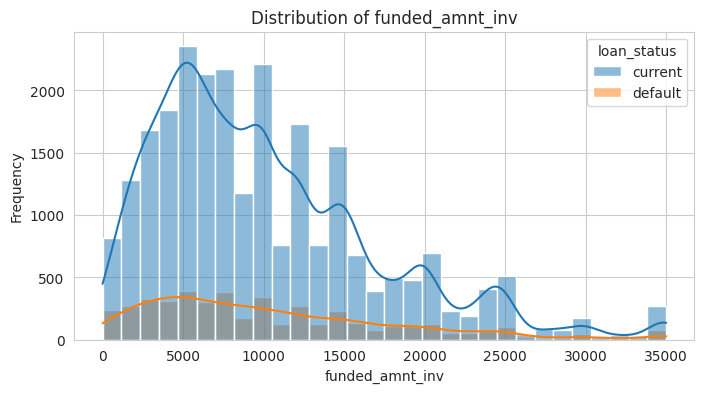

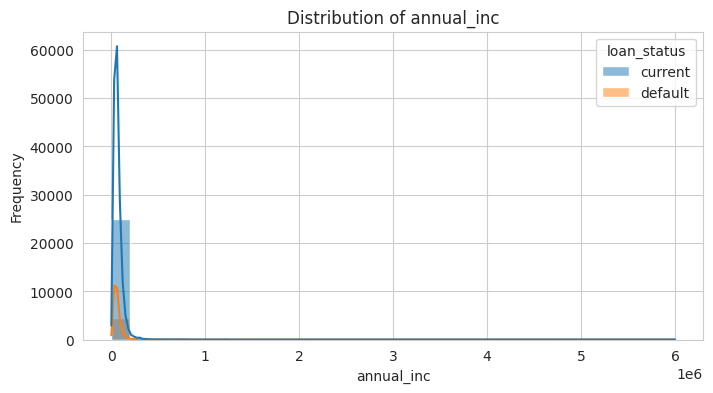

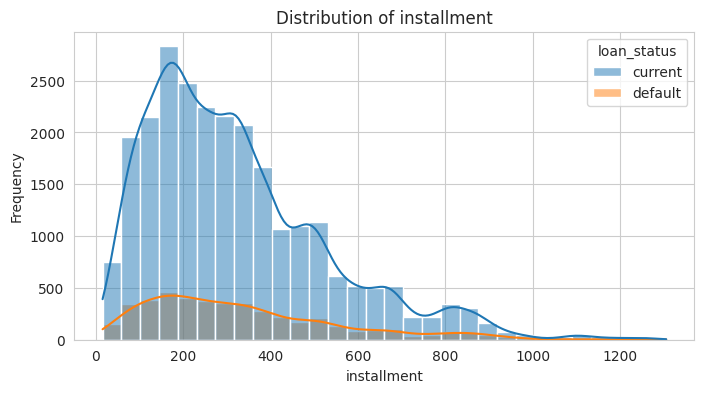

In [ ]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

for col in numeric_features:
    try:
      plt.figure(figsize=(8, 4))
      sns.histplot(data= loan, x=col, hue="loan_status", kde=True, bins=30)
      plt.title(f'Distribution of {col}')
      plt.xlabel(col)
      plt.ylabel('Frequency')
      plt.show()
    except Exception as e:
      print(col, e)

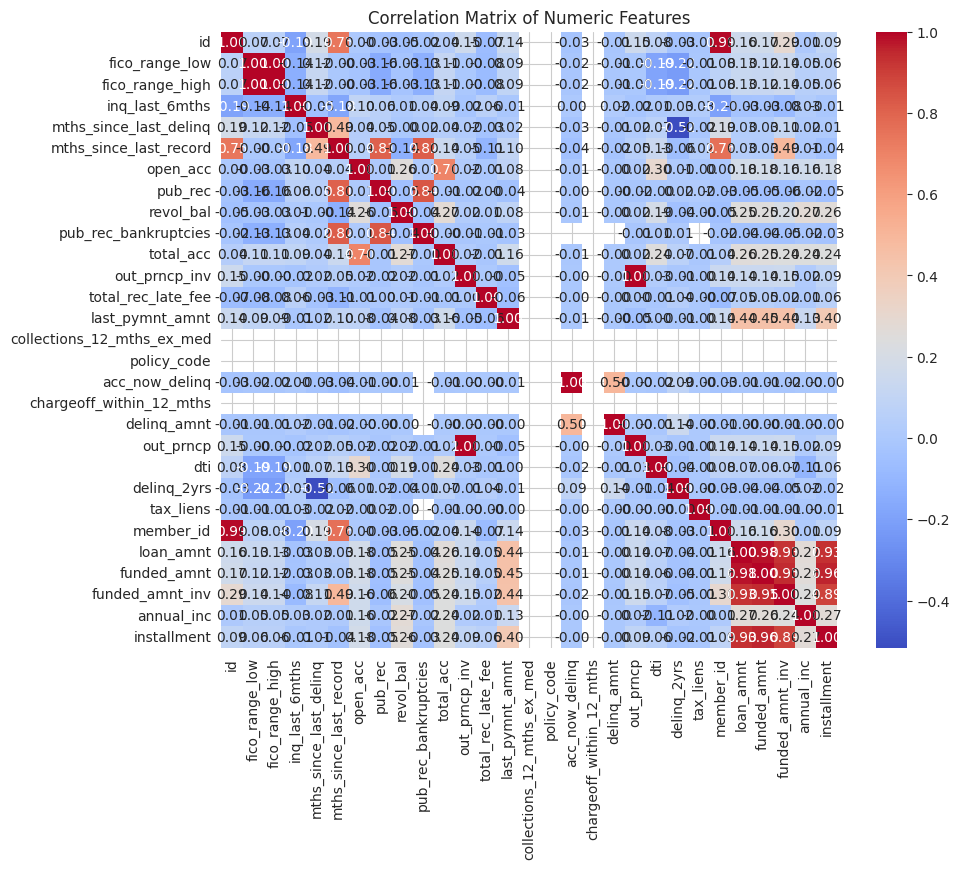

In [ ]:
# Compute the correlation matrix
corr_matrix = loan[numeric_features].corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

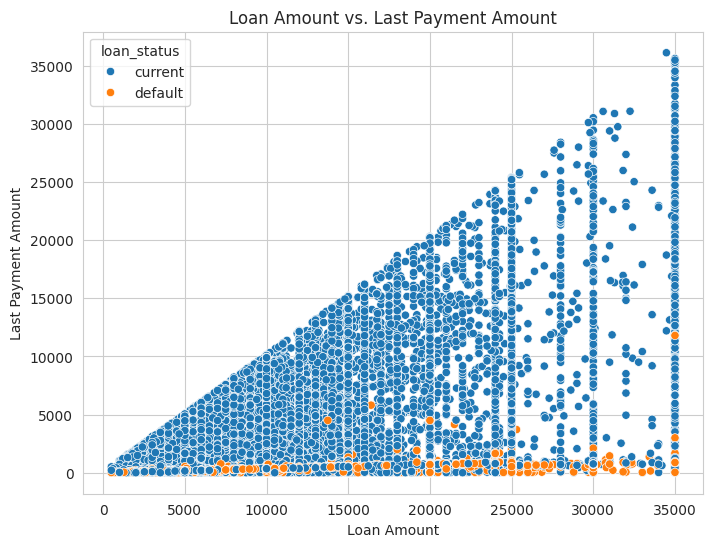

In [ ]:
# Example scatter plot between 'loan_amnt' and 'last_pymnt_amnt'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=loan, x='loan_amnt', y='last_pymnt_amnt', hue='loan_status')
plt.title('Loan Amount vs. Last Payment Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Last Payment Amount')
plt.show()


---
# Following the cookbook recipe with building a predictive machine model!
- Here I am going run through steps 1-6, except for Parameter Tuning just to show the difference between a baseline performance and the performance when we implement hyper parameterization for predictive performance. Also, more importantly we would like to a demonstration of how this process actually works in practice!


1. Feature Selection
2. Train and Split Data
3. Preprocess Data with Pipelines for handling nulls and scaling
4. Model Training
5. Parameter Tuning
6. Performance Metrics
7. Feature Importance Analysis

### 1. Feature Selection

In [ ]:
target = 'loan_status'
numeric_features = loan.select_dtypes(include=['int64', 'float64']).columns
#print(numeric_features)
numeric_features = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_rec_late_fee',
       'last_pymnt_amnt']
print(numeric_features)
categorical_features = loan.select_dtypes(include=['object']).columns
#print(categorical_features)
categorical_features = ['grade', 'sub_grade','home_ownership', 'verification_status']
print(categorical_features)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_rec_late_fee', 'last_pymnt_amnt']
['grade', 'sub_grade', 'home_ownership', 'verification_status']


#### Making Target Variable Categorical with Numbers

In [ ]:
loan[target] = loan[target].map({'current': 0, 'default': 1})
loan[target].value_counts()

0    25300
1     4477
Name: loan_status, dtype: int64

### 2. Train Test Split (80% Training and 20% Testing)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(loan[numeric_features + categorical_features], loan[target], test_size=0.2, random_state=42)

In [ ]:
# How many rows in training data and compare it to the original data set
print(f"Rows in Training Data: {X_train.shape[0]}")
print(f"Rows in Testing Data: {X_test.shape[0]}")
print(f"Rows in Original Data frame: {loan.shape[0]}")
print(f"Difference in Rows: {loan.shape[0]-X_train.shape[0]}")

Rows in Training Data: 23821
Rows in Testing Data: 5956
Rows in Original Data frame: 29777
Difference in Rows: 5956


In [ ]:
# Preview the training data
X_train.head()

loan_amnt  funded_amnt  funded_amnt_inv  installment  annual_inc  \
27888  8000.00000   8000.00000       7875.00000    189.61000 26000.00000   
1383   5250.00000   5250.00000       5250.00000    182.69000 48000.00000   
20758 18000.00000  10900.00000      10180.13698    340.97000 95000.00000   
2441   6000.00000   6000.00000       6000.00000    187.75000 30000.00000   
21877 18000.00000  18000.00000      17989.99707    589.24000 73200.00000   

           dti  delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  \
27888  8.40000      0.00000       700.00000        704.00000         6.00000   
1383  24.77000      0.00000       675.00000        679.00000         2.00000   
20758 21.32000      0.00000       750.00000        754.00000         1.00000   
2441   5.84000      0.00000       715.00000        719.00000         0.00000   
21877  0.26000      0.00000       725.00000        729.00000         0.00000   

       ...   revol_bal  total_acc  out_prncp  out_prncp_inv  \
27888  ...  9174.00000   14.00000    0.00000        0.00000   
1383   ... 18889.00000   18.00000    0.00000        0.00000   
20758  ... 36780.00000   30.00000    0.00000        0.00000   
2441   ...   876.00000    9.00000    0.00000        0.00000   
21877  ...   526.00000   21.00000    0.00000        0.00000   

       total_rec_late_fee  last_pymnt_amnt  grade  sub_grade  home_ownership  \
27888             0.00000        189.61000      D         D3        MORTGAGE   
1383              0.00000       1895.35000      C         C4            RENT   
20758             0.00000        349.75000      A         A5        MORTGAGE   
2441              0.00000       3697.81000      A         A4             OWN   
21877             0.00000        657.50000      B         B4        MORTGAGE   

       verification_status  
27888             Verified  
1383       Source Verified  
20758             Verified  
2441       Source Verified  
21877             Verified  

[5 rows x 24 columns]

In [ ]:
dfp_2 = df_profile(X_train, 'loan_status')
dfp_2

feature_name    dtype  count  nunique        mean        min  \
0                loan_amnt  float64  23818      775 11078.57290  500.00000   
1          last_pymnt_amnt  float64  23818    21912  2608.06000    0.00000   
2       total_rec_late_fee  float64  23818     1308     1.51080    0.00000   
3            out_prncp_inv  float64  23818      303    11.67010    0.00000   
4                out_prncp  float64  23818      303    11.69880    0.00000   
5                total_acc  float64  23801       77    22.01920    1.00000   
6                revol_bal  float64  23818    15894 14314.60030    0.00000   
7                  pub_rec  float64  23801        6     0.05860    0.00000   
8                 open_acc  float64  23801       40     9.35540    1.00000   
9   mths_since_last_delinq  float64   8672       88    34.59540    0.00000   
10  mths_since_last_record  float64   2051      105    59.09220    0.00000   
11         fico_range_high  float64  23818       42   716.92110  619.00000   
12          fico_range_low  float64  23818       42   712.92110  615.00000   
13             delinq_2yrs  float64  23801       11     0.15660    0.00000   
14                     dti  float64  23818     2803    13.36870    0.00000   
15              annual_inc  float64  23817     3636 69131.34460 2000.00000   
16             installment  float64  23818    11531   322.85370   15.67000   
17         funded_amnt_inv  float64  23818     5681 10129.91130    0.00000   
18             funded_amnt  float64  23818      940 10816.09290  500.00000   
19          inq_last_6mths  float64  23801       24     1.08490    0.00000   
20          home_ownership   object  23818        5         NaN        NaN   
21                   grade   object  23818        7         NaN        NaN   
22               sub_grade   object  23818       35         NaN        NaN   
23     verification_status   object  23818        3         NaN        NaN   

             max   null  not_null  null_pct  nunique_pct feature_type  \
0    35000.00000      3     23818   0.00013      0.03253      NUMERIC   
1    36115.20000      3     23818   0.00013      0.91986      NUMERIC   
2      146.04000      3     23818   0.00013      0.05491      NUMERIC   
3     3123.44000      3     23818   0.00013      0.01272      NUMERIC   
4     3126.61000      3     23818   0.00013      0.01272      NUMERIC   
5       81.00000     20     23801   0.00084      0.00323      NUMERIC   
6  1207359.00000      3     23818   0.00013      0.66723      NUMERIC   
7        5.00000     20     23801   0.00084      0.00025      NUMERIC   
8       47.00000     20     23801   0.00084      0.00168      NUMERIC   
9      120.00000  15149      8672   0.63595      0.00369      NUMERIC   
10     129.00000  21770      2051   0.91390      0.00441      NUMERIC   
11     829.00000      3     23818   0.00013      0.00176      NUMERIC   
12     825.00000      3     23818   0.00013      0.00176      NUMERIC   
13      13.00000     20     23801   0.00084      0.00046      NUMERIC   
14      29.95000      3     23818   0.00013      0.11767      NUMERIC   
15 6000000.00000      4     23817   0.00017      0.15264      NUMERIC   
16    1305.19000      3     23818   0.00013      0.48407      NUMERIC   
17   35000.00000      3     23818   0.00013      0.23849      NUMERIC   
18   35000.00000      3     23818   0.00013      0.03946      NUMERIC   
19      33.00000     20     23801   0.00084      0.00101      NUMERIC   
20           NaN      3     23818   0.00013      0.00021     CATEGORY   
21           NaN      3     23818   0.00013      0.00029     CATEGORY   
22           NaN      3     23818   0.00013      0.00147     CATEGORY   
23           NaN      3     23818   0.00013      0.00013     CATEGORY   

                                   feature_warning  
0                                       NO WARNING  
1                           EXCLUDE, GT 90% UNIQUE  
2                                       NO WARNING  
3                        

In [ ]:
# 1. Split features into categorical, numeric, and target
numeric_features =  dfp_2.query('feature_type == "NUMERIC"')['feature_name'].to_list()
print(f"Numeric Features:", numeric_features)
categorical_features = dfp_2.query('feature_type == "CATEGORY"')['feature_name'].to_list()
print(f"Categorical Features:", categorical_features)
print(f"Target Feature:", "['loan_status']" )

Numeric Features: ['loan_amnt', 'last_pymnt_amnt', 'total_rec_late_fee', 'out_prncp_inv', 'out_prncp', 'total_acc', 'revol_bal', 'pub_rec', 'open_acc', 'mths_since_last_delinq', 'mths_since_last_record', 'fico_range_high', 'fico_range_low', 'delinq_2yrs', 'dti', 'annual_inc', 'installment', 'funded_amnt_inv', 'funded_amnt', 'inq_last_6mths']
Categorical Features: ['home_ownership', 'grade', 'sub_grade', 'verification_status']
Target Feature: ['loan_status']


In [ ]:
# preview the training data with the numeric features
X_train[numeric_features].head()

loan_amnt  last_pymnt_amnt  total_rec_late_fee  out_prncp_inv  \
27888  8000.00000        189.61000             0.00000        0.00000   
1383   5250.00000       1895.35000             0.00000        0.00000   
20758 18000.00000        349.75000             0.00000        0.00000   
2441   6000.00000       3697.81000             0.00000        0.00000   
21877 18000.00000        657.50000             0.00000        0.00000   

       out_prncp  total_acc   revol_bal  pub_rec  open_acc  \
27888    0.00000   14.00000  9174.00000  0.00000   6.00000   
1383     0.00000   18.00000 18889.00000  0.00000   7.00000   
20758    0.00000   30.00000 36780.00000  0.00000  12.00000   
2441     0.00000    9.00000   876.00000  0.00000   5.00000   
21877    0.00000   21.00000   526.00000  0.00000   6.00000   

       mths_since_last_delinq  mths_since_last_record  fico_range_high  \
27888                     NaN                     NaN        704.00000   
1383                      NaN                     NaN        679.00000   
20758                     NaN                     NaN        754.00000   
2441                 27.00000                     NaN        719.00000   
21877                     NaN                     NaN        729.00000   

       fico_range_low  delinq_2yrs      dti  annual_inc  installment  \
27888       700.00000      0.00000  8.40000 26000.00000    189.61000   
1383        675.00000      0.00000 24.77000 48000.00000    182.69000   
20758       750.00000      0.00000 21.32000 95000.00000    340.97000   
2441        715.00000      0.00000  5.84000 30000.00000    187.75000   
21877       725.00000      0.00000  0.26000 73200.00000    589.24000   

       funded_amnt_inv  funded_amnt  inq_last_6mths  
27888       7875.00000   8000.00000         6.00000  
1383        5250.00000   5250.00000         2.00000  
20758      10180.13698  10900.00000         1.00000  
2441        6000.00000   6000.00000         0.00000  
21877      17989.99707  18000.00000         0.00000

In [ ]:
# preview the training data with categorical features
X_train[categorical_features].head()

home_ownership grade sub_grade verification_status
27888       MORTGAGE     D        D3            Verified
1383            RENT     C        C4     Source Verified
20758       MORTGAGE     A        A5            Verified
2441             OWN     A        A4     Source Verified
21877       MORTGAGE     B        B4            Verified

In [ ]:
# Preview the Target Variable
y_train.head()

27888    1
1383     0
20758    0
2441     0
21877    0
Name: loan_status, dtype: int64

### 3. Preprocess the data with Pipelines and splitting features into categorical and numeric
- For handling nulls, I will use the KNN Imputer for Numeric Data and Simple Imputer for Text data and then use One Hot Encoder to convert text data into numeric data (think of dummizying variables)


In [ ]:
# create transformers

numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # we could also do strategy='constant', fill_value='missing'
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
#-------------------------------------------------------------------------------------------------------------------------
# combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
#-------------------------------------------------------------------------------------------------------------------------
# create model pipelines with base estimators

# Log Pipeline
log_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier',LogisticRegression(random_state=42, max_iter=150))
])

# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier',RandomForestClassifier(n_estimators=12, random_state=42))
])

# Gradient Boosting Machine Pipeline
gbm_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier',GradientBoostingClassifier(n_estimators=20, learning_rate=.5, max_depth=3, random_state=42))
])

# Neural Network Pipeline
nn_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', MLPClassifier(random_state=42))
])

# base estimators for stacker
base_estimators = [
    ('gbm', GradientBoostingClassifier(n_estimators=30, learning_rate=1.0, max_depth=3, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=25, random_state=42)),
    ('nn', MLPClassifier(random_state=42))
]

# final estimator on top
final_estimator = LogisticRegression()

stacking_classifier = StackingClassifier(
    estimators=base_estimators,
    final_estimator=final_estimator,
    cv=3,
    n_jobs=-1
)

stacking_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', stacking_classifier)])


### 4. Model Training

In [ ]:
log_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)
gbm_pipeline.fit(X_train, y_train)
nn_pipeline.fit(X_train,y_train)
stacking_pipeline.fit(X_train, y_train)

print("Training Complete")

Training Complete


### 6. Evaluate Performance Metrics

In [ ]:
model_set = {"Logistic Regression": log_pipeline,
            "Random Forest": rf_pipeline,
            "Gradient Boosting Machine": gbm_pipeline,
             "Neural Network": nn_pipeline,
             "Stacking Classifier": stacking_pipeline}

def model_metrics(model_set, X_train, X_test, y_train, y_test):
  # Model Metrics DataFrame
  metrics_df = pd.DataFrame(columns=[
      'Model', 'Train_Accuracy', 'Test_Accuracy', 'Train_Precision', 'Test_Precision',
      'Train_Recall','Test_Recall', 'Train_F1_Score', 'Test_F1_Score', 'Train_AUC', 'Test_AUC'
  ])

  for name, model in model_set.items():
    # Predictions for the training set
    y_train_pred = model.predict(X_train)
    y_train_prob = model.predict_proba(X_train)[:, 1]

    # Predictions for the test set
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]

    # Binarize labels for AUC calculation
    lb = LabelBinarizer()
    y_train_binarized = lb.fit_transform(y_train).ravel()
    y_test_binarized = lb.transform(y_test).ravel()

    # Calculating metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_precision = precision_score(y_train, y_train_pred, )
    test_precision = precision_score(y_test, y_test_pred, )

    train_recall = recall_score(y_train, y_train_pred, )
    test_recall = recall_score(y_test, y_test_pred, )

    train_f1 = f1_score(y_train, y_train_pred, )
    test_f1 = f1_score(y_test, y_test_pred, )

    train_auc = roc_auc_score(y_train_binarized, y_train_prob)
    test_auc = roc_auc_score(y_test_binarized, y_test_prob)

    # Append metrics to the DataFrame
    metrics_df = metrics_df.append({
        'Model': name,
        'Train_Accuracy': train_accuracy,
        'Test_Accuracy': test_accuracy,
        'Train_Precision': train_precision,
        'Test_Precision': test_precision,
        'Train_Recall': train_recall,
        'Test_Recall': test_recall,
        'Train_F1_Score': train_f1,
        'Test_F1_Score': test_f1,
        'Train_AUC': train_auc,
        'Test_AUC': test_auc
    }, ignore_index=True)

  return metrics_df

# Example Usage
metrics_dataframe = model_metrics(model_set, X_train, X_test, y_train, y_test)
metrics_dataframe

Model  Train_Accuracy  Test_Accuracy  Train_Precision  \
0        Logistic Regression         0.86361        0.86148          0.62124   
1              Random Forest         0.99051        0.86232          0.99823   
2  Gradient Boosting Machine         0.88032        0.87223          0.72951   
3             Neural Network         0.92427        0.83731          0.80393   
4        Stacking Classifier         0.96721        0.87861          0.96284   

   Test_Precision  Train_Recall  Test_Recall  Train_F1_Score  Test_F1_Score  \
0         0.58383       0.24722      0.22134         0.35369        0.32099   
1         0.61011       0.93882      0.19183         0.96761        0.29188   
2         0.66129       0.32925      0.27923         0.45373        0.39266   
3         0.44038       0.65907      0.36890         0.72433        0.40148   
4         0.65076       0.81424      0.38706         0.88233        0.48541   

   Train_AUC  Test_AUC  
0    0.86956   0.85491  
1    0.99987   0.83007  
2    0.90285   0.88059  
3    0.95644   0.82715  
4    0.99650   0.88854

In [ ]:
#metrics_dataframe.to_csv('metrics baseline.csv')

In [ ]:
# Read the Metrics DataFrame
metrics_dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ames Projects Python and SQL/metrics baseline.csv")
metrics_dataframe

Unnamed: 0                      Model  Train_Accuracy  Test_Accuracy  \
0           0        Logistic Regression         0.86361        0.86148   
1           1              Random Forest         0.99051        0.86232   
2           2  Gradient Boosting Machine         0.88032        0.87223   
3           3             Neural Network         0.92427        0.83731   
4           4        Stacking Classifier         0.96721        0.87861   

   Train_Precision  Test_Precision  Train_Recall  Test_Recall  Train_F1_Score  \
0          0.62124         0.58383       0.24722      0.22134         0.35369   
1          0.99823         0.61011       0.93882      0.19183         0.96761   
2          0.72951         0.66129       0.32925      0.27923         0.45373   
3          0.80393         0.44038       0.65907      0.36890         0.72433   
4          0.96284         0.65076       0.81424      0.38706         0.88233   

   Test_F1_Score  Train_AUC  Test_AUC  
0        0.32099    0.86956   0.85491  
1        0.29188    0.99987   0.83007  
2        0.39266    0.90285   0.88059  
3        0.40148    0.95644   0.82715  
4        0.48541    0.99650   0.88854

In [ ]:
metrics_dataframe.drop(columns=['Unnamed: 0'], inplace=True)
metrics_dataframe

Model  Train_Accuracy  Test_Accuracy  Train_Precision  \
0        Logistic Regression         0.86361        0.86148          0.62124   
1              Random Forest         0.99051        0.86232          0.99823   
2  Gradient Boosting Machine         0.88032        0.87223          0.72951   
3             Neural Network         0.92427        0.83731          0.80393   
4        Stacking Classifier         0.96721        0.87861          0.96284   

   Test_Precision  Train_Recall  Test_Recall  Train_F1_Score  Test_F1_Score  \
0         0.58383       0.24722      0.22134         0.35369        0.32099   
1         0.61011       0.93882      0.19183         0.96761        0.29188   
2         0.66129       0.32925      0.27923         0.45373        0.39266   
3         0.44038       0.65907      0.36890         0.72433        0.40148   
4         0.65076       0.81424      0.38706         0.88233        0.48541   

   Train_AUC  Test_AUC  
0    0.86956   0.85491  
1    0.99987   0.83007  
2    0.90285   0.88059  
3    0.95644   0.82715  
4    0.99650   0.88854

### Charts ROC & PR Curves


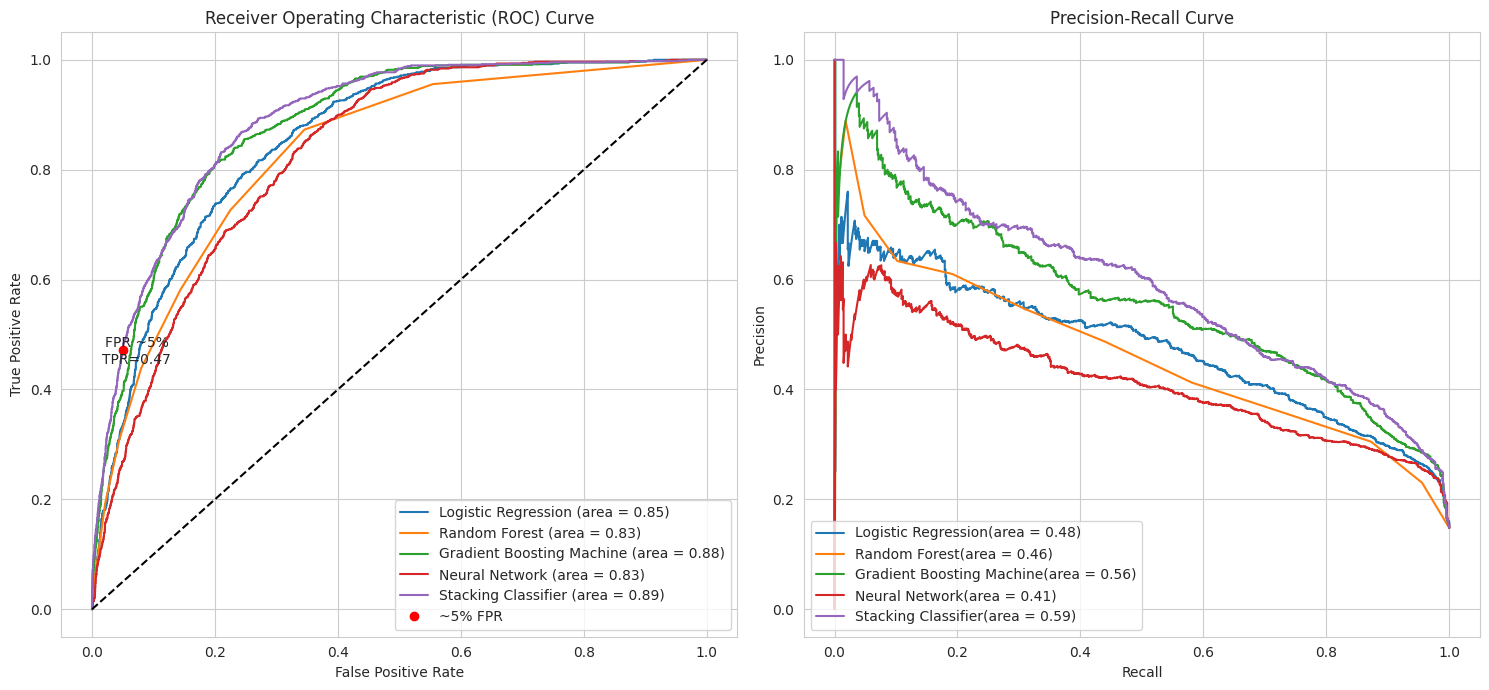

In [ ]:
def plot_model_curves(model_set, X_train, X_test, y_train, y_test):
  plt.figure(figsize=(15,7))

  for name, model in model_set.items():
    # Calculate metrics
    y_test_prob = model.predict_proba(X_test)[:, 1]
    # Binarize labels for AUC calculation
    lb = LabelBinarizer()
    y_test_binarized = lb.fit_transform(y_test).ravel()

    # Calculate ROC curve
    fpr, tpr, thresholds_roc = roc_curve(y_test_binarized, y_test_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

  plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal

  # Highlighting the 5% FPR point
  idx = next(i for i, x in enumerate(fpr) if x >= 0.05)  # Find the index of the FPR just over 5%
  plt.plot(fpr[idx], tpr[idx], 'ro', label='~5% FPR')  # 'ro' for red dot
  plt.annotate(f'FPR ~5%\nTPR={tpr[idx]:.2f}', (fpr[idx], tpr[idx]), textcoords="offset points", xytext=(10,-10), ha='center')

  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc="lower right")

    # Plot PR Curve
  plt.subplot(1, 2, 2)
  for name, model in model_set.items():
    # Calculate metrics
    y_test_prob = model.predict_proba(X_test)[:, 1]
    # Binarize labels for AUC calculation
    lb = LabelBinarizer()
    y_test_binarized = lb.fit_transform(y_test).ravel()
    # Calculate Precision-Recall curve
    precision, recall, thresholds_pr = precision_recall_curve(y_test_binarized, y_test_prob)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{name}(area = {pr_auc:.2f})')

  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall Curve')
  plt.legend(loc="lower left")
  plt.tight_layout()
  plt.show()

# Example Usage
plot_model_curves(model_set, X_train, X_test, y_train, y_test)

#### Individual Plots
- Logistic Regression
- Random Forest
- Gradient Boosting Machine
- Neural Network
- Stacking Classifier

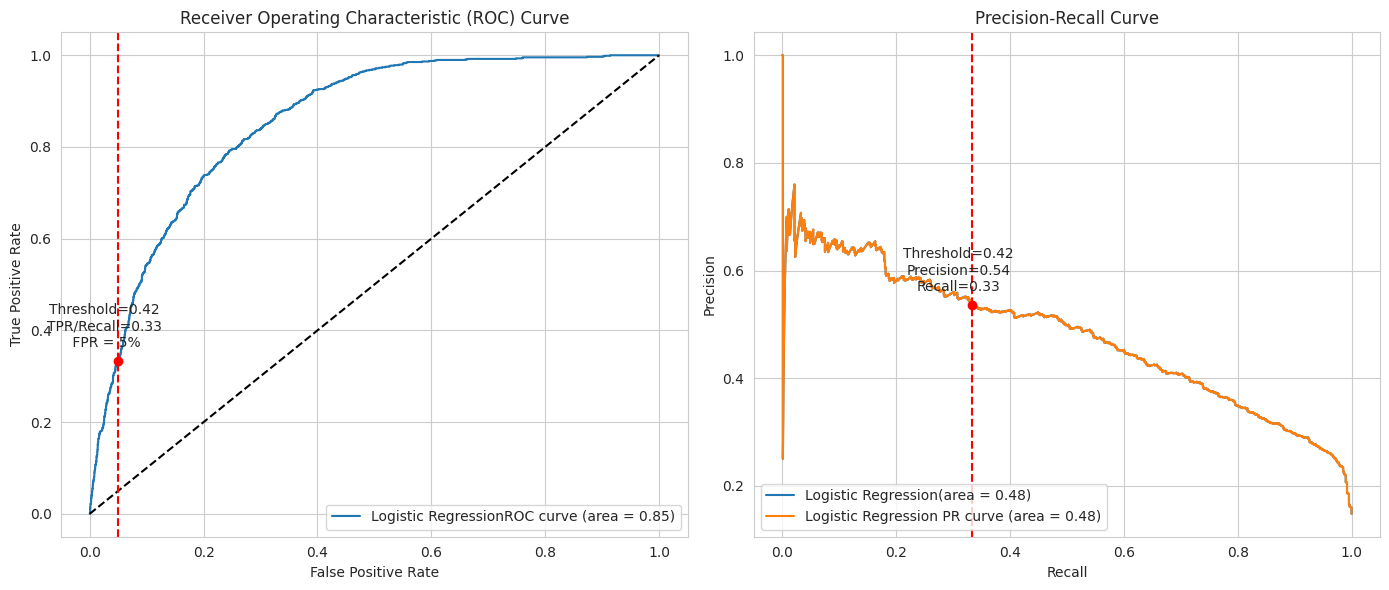

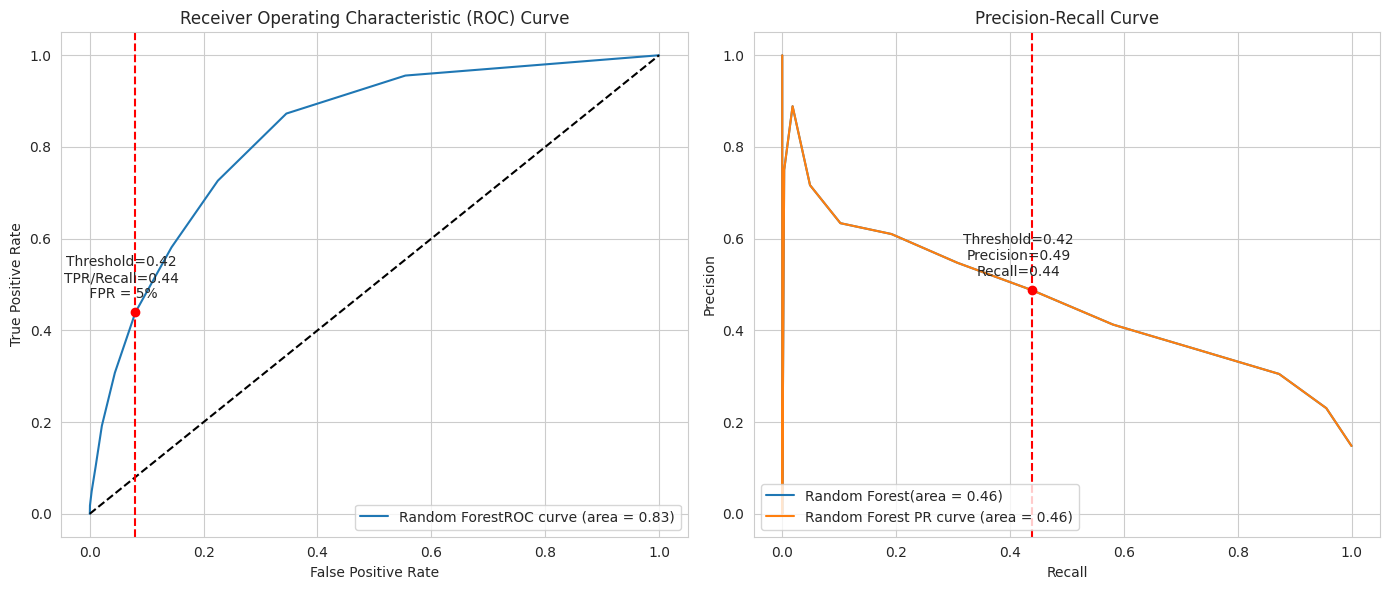

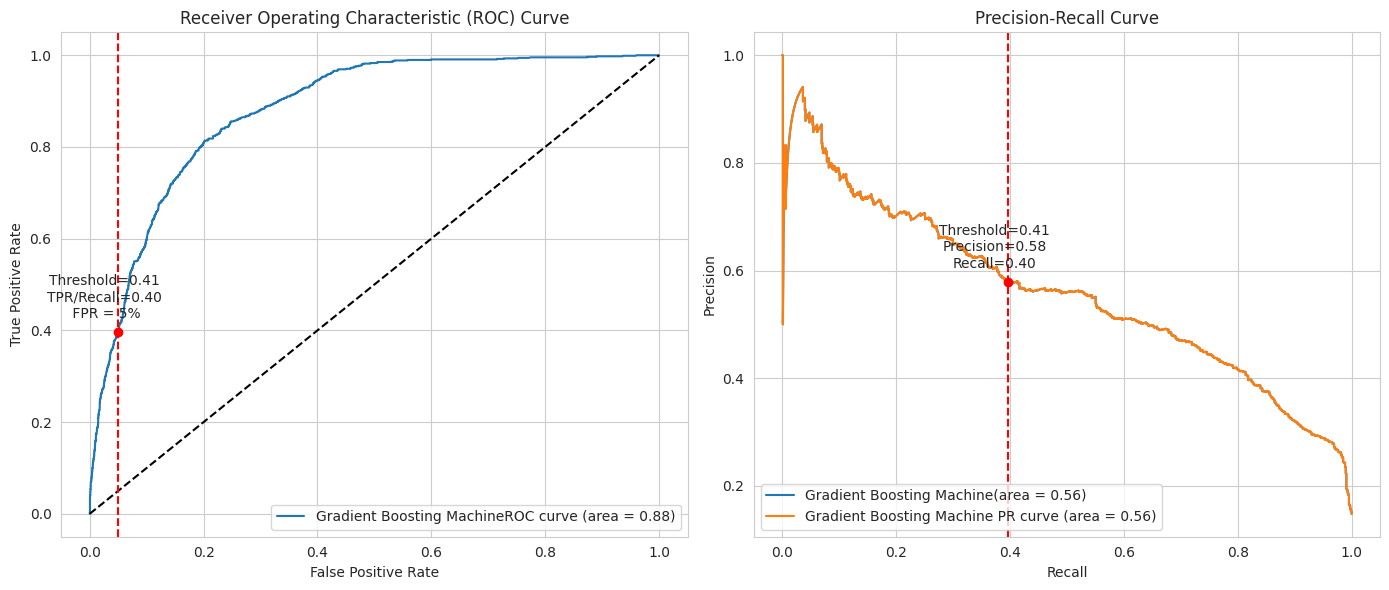

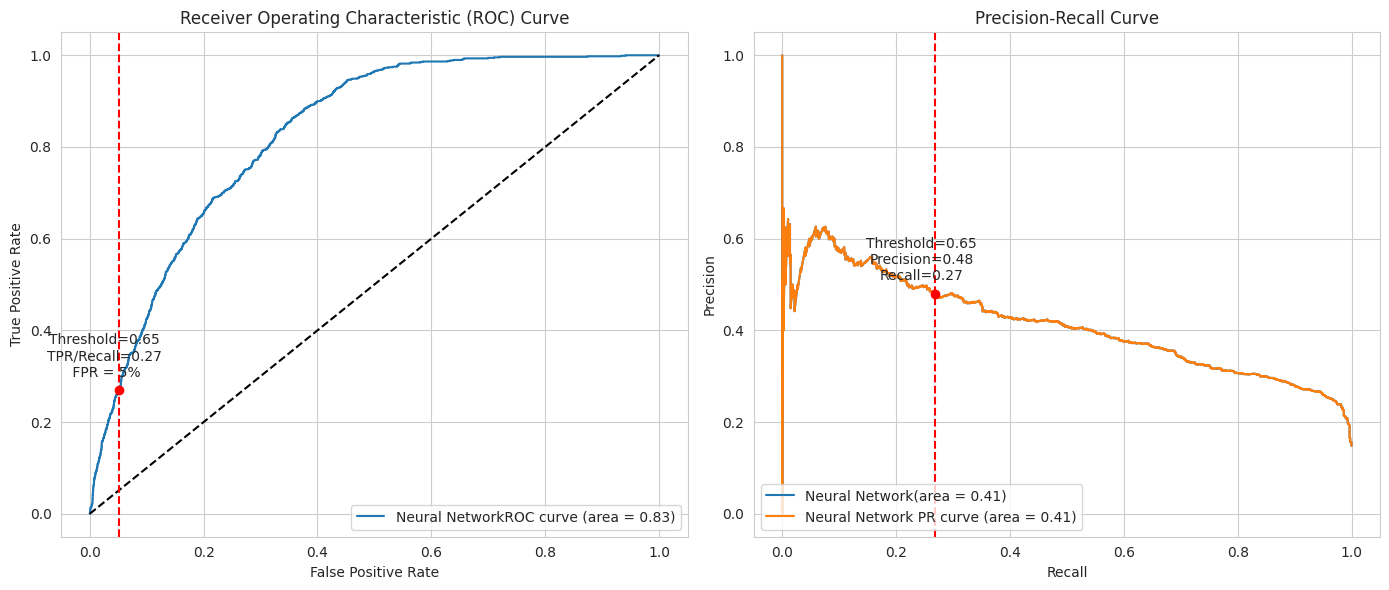

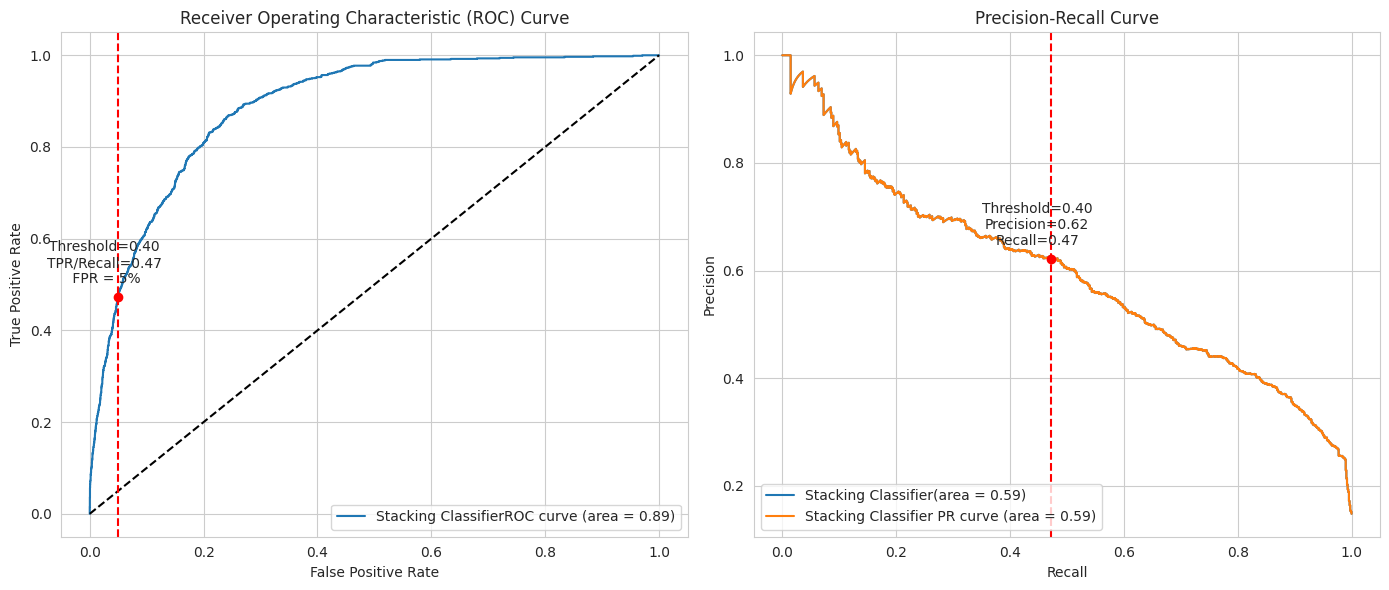

In [ ]:
# Assuming calculations for fpr, tpr, and thresholds_roc are already done
for name, model in model_set.items():
  plt.figure(figsize=(14, 6))
  # Calculate metrics
  y_test_prob = model.predict_proba(X_test)[:, 1]
  # Binarize labels for AUC calculation
  lb = LabelBinarizer()
  y_test_binarized = lb.fit_transform(y_test).ravel()

  # Calculate ROC curve
  fpr, tpr, thresholds_roc = roc_curve(y_test_binarized, y_test_prob)
  roc_auc = auc(fpr, tpr)

  # Plot ROC Curve
  plt.subplot(1, 2, 1)
  plt.plot(fpr, tpr, label=f'{name}ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal

  # Highlight the 5% FPR with a vertical line
  idx = next(i for i, x in enumerate(fpr) if x >= 0.05)  # Find the index for FPR just over 5%
  plt.axvline(x=fpr[idx], color='r', linestyle='--')  # Vertical line for ~5% FPR
  plt.plot(fpr[idx], tpr[idx], 'ro')  # Red dot at the intersection

  # Adding a text annotation for the threshold
  plt.annotate(f'Threshold={thresholds_roc[idx]:.2f}\nTPR/Recall={tpr[idx]:.2f}\n FPR = 5%',
   (fpr[idx], tpr[idx]),
   textcoords="offset points",
   xytext=(-10,10),
   ha='center')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc="lower right")

  # Plot PR Curve
  plt.subplot(1, 2, 2)
  # Calculate Precision-Recall curve
  precision, recall, thresholds_pr = precision_recall_curve(y_test_binarized, y_test_prob)
  pr_auc = auc(recall, precision)
  plt.plot(recall, precision, label=f'{name}(area = {pr_auc:.2f})')
  plt.plot(recall, precision, label=f'{name} PR curve (area = {pr_auc:.2f})')
  roc_threshold = thresholds_roc[idx]
  closest_threshold_index = np.argmin(np.abs(thresholds_pr - roc_threshold))
  selected_precision = precision[closest_threshold_index]
  selected_recall = recall[closest_threshold_index]
  plt.annotate(f'Threshold={roc_threshold:.2f}\nPrecision={selected_precision:.2f}\nRecall={selected_recall:.2f}',
             (selected_recall, selected_precision),
             textcoords="offset points",
             xytext=(-10,10),
             ha='center')
  # Highlight the 5% FPR with a vertical line
  idx = next(i for i, x in enumerate(fpr) if x >= 0.05)  # Find the index for FPR just over 5%
  plt.axvline(x=selected_recall, color='r', linestyle='--')  # Vertical line for ~5% FPR
  plt.plot(selected_recall,selected_precision, 'ro')  # Red dot at the intersection
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall Curve')
  plt.legend(loc="lower left")
  plt.tight_layout()
  plt.show()


### 5. Parameter Tuning for each model

In [ ]:
# Log Pipeline
log_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier',LogisticRegression(random_state=42, max_iter=150))
])

# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier',RandomForestClassifier(n_estimators=12, random_state=42))
])

# Gradient Boosting Machine Pipeline
gbm_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier',GradientBoostingClassifier(n_estimators=20, learning_rate=.5, max_depth=3, random_state=42))
])

# Neural Network Pipeline
nn_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', MLPClassifier(random_state=42))
])

# base estimators for stacker
base_estimators = [
    ('gbm', GradientBoostingClassifier(n_estimators=30, learning_rate=1.0, max_depth=3, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=25, random_state=42)),
    ('nn', MLPClassifier(random_state=42))
]

# final estimator on top
final_estimator = LogisticRegression()

stacking_classifier = StackingClassifier(
    estimators=base_estimators,
    final_estimator=final_estimator,
    cv=3,
    n_jobs=-1
)

stacking_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', stacking_classifier)])

#### Logistic Regression Tuning

In [ ]:
log_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['loan_amnt',
                                                   'last_pymnt_amnt',
                                                   'total_rec_late_fee',
                                                   'out_prncp_inv', 'out_prncp',
                                                   'total_acc', 'revol_bal',
                                                   'pub_rec', 'open_acc',
                                                   'mths_since_last_delinq',
                                                   'mths_since_last_record',
                                                   'fico_range_high',
                                                   'fico_range_low',
                                                   'delinq_2yrs', 'dti',
                                                   'annual_inc', 'installment',
                                                   'funded_amnt_inv',
                                                   'funded_amnt',
                                                   'inq_last_6mths']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['home_ownership', 'grade',
                                                   'sub_grade',
                                                   'verification_status'])])),
                ('classifier',
                 LogisticRegression(max_iter=150, random_state=42))])

In [ ]:
# Create a grid space
param_grid = {
    'classifier__C': [0.001, 0.01, .1, .2, 0.5, .75, 1],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__max_iter': [100, 200, 300, 400],
    'classifier__solver': ['liblinear']
}

rs = RandomizedSearchCV(log_pipeline, param_grid, scoring='roc_auc', cv=3)
rs.fit(X_train, y_train)

# Best ROC AUC Score
print(rs.best_params_)

{'classifier__solver': 'liblinear', 'classifier__penalty': 'l1', 'classifier__max_iter': 100, 'classifier__C': 0.5}


In [ ]:
# Configure the pipeline
lr_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier',LogisticRegression(C=0.5, random_state=42, max_iter=100, penalty='l1', solver='liblinear'))
])

lr_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'funded_amnt',
                                                   'funded_amnt_inv',
                                                   'installment', 'annual_inc',
                                                   'dti', 'delinq_2yrs',
                                                   'fico_range_low',
                                                   'fico_range_high',
                                                   'inq_last_6mths',
                                                   'mths_since_last_delinq',
                                                   'mths_since_last_record',
                                                   'open_acc', 'pub_...
                                                   'out_prncp', 'out_prncp_inv',
                                                   'total_rec_late_fee',
                                                   'last_pymnt_amnt']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'sub_grade',
                                                   'home_ownership',
                                                   'verification_status'])])),
                ('classifier',
                 LogisticRegression(C=0.5, penalty='l1', random_state=42,
                                    solver='liblinear'))])

In [ ]:
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['loan_amnt',
                                                   'last_pymnt_amnt',
                                                   'total_rec_late_fee',
                                                   'out_prncp_inv', 'out_prncp',
                                                   'total_acc', 'revol_bal',
                                                   'pub_rec', 'open_acc',
                                                   'mths_since_last_delinq',
                                                   'mths_since_last_record',
                                                   'fico_range_high',
                                                   'fico_range_low',...
                                                   'annual_inc', 'installment',
                                                   'funded_amnt_inv',
                                                   'funded_amnt',
                                                   'inq_last_6mths']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['home_ownership', 'grade',
                                                   'sub_grade',
                                                   'verification_status'])])),
                ('classifier',
                 LogisticRegression(C=0.5, penalty='l1', random_state=42,
                                    solver='liblinear'))])

In [ ]:
# Name of model
name = 'Logistic Regression Hyper Parameterized'

# Predictions for the training set
y_train_pred = lr_pipeline.predict(X_train)
y_train_prob = lr_pipeline.predict_proba(X_train)[:, 1]

# Predictions for the test set
y_test_pred = lr_pipeline.predict(X_test)
y_test_prob = lr_pipeline.predict_proba(X_test)[:, 1]

# Binarize labels for AUC calculation
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train).ravel()
y_test_binarized = lb.transform(y_test).ravel()

# Calculating metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred, )
test_precision = precision_score(y_test, y_test_pred, )

train_recall = recall_score(y_train, y_train_pred, )
test_recall = recall_score(y_test, y_test_pred, )

train_f1 = f1_score(y_train, y_train_pred, )
test_f1 = f1_score(y_test, y_test_pred, )

train_auc = roc_auc_score(y_train_binarized, y_train_prob)
test_auc = roc_auc_score(y_test_binarized, y_test_prob)

# Append metrics to the DataFrame
metrics_dataframe = metrics_dataframe.append({
  'Model': name,
  'Train_Accuracy': train_accuracy,
  'Test_Accuracy': test_accuracy,
  'Train_Precision': train_precision,
  'Test_Precision': test_precision,
  'Train_Recall': train_recall,
  'Test_Recall': test_recall,
  'Train_F1_Score': train_f1,
  'Test_F1_Score': test_f1,
  'Train_AUC': train_auc,
  'Test_AUC': test_auc
}, ignore_index=True)

# Show updated dataframe
metrics_dataframe

Model  Train_Accuracy  Test_Accuracy  \
0                      Logistic Regression         0.86361        0.86148   
1                            Random Forest         0.99051        0.86232   
2                Gradient Boosting Machine         0.88032        0.87223   
3                           Neural Network         0.92427        0.83731   
4                      Stacking Classifier         0.96721        0.87861   
5  Logistic Regression Hyper Parameterized         0.86340        0.86081   

   Train_Precision  Test_Precision  Train_Recall  Test_Recall  Train_F1_Score  \
0          0.62124         0.58383       0.24722      0.22134         0.35369   
1          0.99823         0.61011       0.93882      0.19183         0.96761   
2          0.72951         0.66129       0.32925      0.27923         0.45373   
3          0.80393         0.44038       0.65907      0.36890         0.72433   
4          0.96284         0.65076       0.81424      0.38706         0.88233   
5          0.61925         0.57558       0.24694      0.22474         0.35308   

   Test_F1_Score  Train_AUC  Test_AUC  
0        0.32099    0.86956   0.85491  
1        0.29188    0.99987   0.83007  
2        0.39266    0.90285   0.88059  
3        0.40148    0.95644   0.82715  
4        0.48541    0.99650   0.88854  
5        0.32327    0.86973   0.85525

#### Random Forest Tuning

In [ ]:
rf_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['loan_amnt',
                                                   'last_pymnt_amnt',
                                                   'total_rec_late_fee',
                                                   'out_prncp_inv', 'out_prncp',
                                                   'total_acc', 'revol_bal',
                                                   'pub_rec', 'open_acc',
                                                   'mths_since_last_delinq',
                                                   'mths_since_last_record',
                                                   'fico_range_high',
                                                   'fico_range_low',
                                                   'delinq_2yrs', 'dti',
                                                   'annual_inc', 'installment',
                                                   'funded_amnt_inv',
                                                   'funded_amnt',
                                                   'inq_last_6mths']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['home_ownership', 'grade',
                                                   'sub_grade',
                                                   'verification_status'])])),
                ('classifier',
                 RandomForestClassifier(n_estimators=12, random_state=42))])

In [ ]:
# Create a grid space
param_grid = {
 'classifier__bootstrap': [True, False],
 'classifier__max_depth': [1,2,3, None],
 'classifier__min_samples_split': [2, 5, 10],
 'classifier__n_estimators': [1,2,3]
}

rs = RandomizedSearchCV(rf_pipeline, param_grid, scoring='roc_auc', cv=3)
rs.fit(X_train, y_train)

# Print Best Parameters
print(rs.best_params_)

# Use the best paramters to make predictions on our test data (X_test)
predictions=rs.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
print(f"Random Forest ROC Curve: {roc_auc:.2f}")

{'classifier__n_estimators': 3, 'classifier__min_samples_split': 10, 'classifier__max_depth': 3, 'classifier__bootstrap': True}
Random Forest ROC Curve: 0.50


In [ ]:
# Configure the pipeline
rf_pipeline_2 = Pipeline([
    ('preprocess', preprocessor),
    ('classifier',RandomForestClassifier(n_estimators=3, random_state=42, min_samples_split=10, max_depth=3, bootstrap=True))
])

rf_pipeline_2

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'funded_amnt',
                                                   'funded_amnt_inv',
                                                   'installment', 'annual_inc',
                                                   'dti', 'delinq_2yrs',
                                                   'fico_range_low',
                                                   'fico_range_high',
                                                   'inq_last_6mths',
                                                   'mths_since_last_delinq',
                                                   'mths_since_last_record',
                                                   'open_acc', 'pub_...
                                                   'out_prncp', 'out_prncp_inv',
                                                   'total_rec_late_fee',
                                                   'last_pymnt_amnt']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'sub_grade',
                                                   'home_ownership',
                                                   'verification_status'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=3, min_samples_split=10,
                                        n_estimators=3, random_state=42))])

In [ ]:
rf_pipeline_2.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['loan_amnt',
                                                   'last_pymnt_amnt',
                                                   'total_rec_late_fee',
                                                   'out_prncp_inv', 'out_prncp',
                                                   'total_acc', 'revol_bal',
                                                   'pub_rec', 'open_acc',
                                                   'mths_since_last_delinq',
                                                   'mths_since_last_record',
                                                   'fico_range_high',
                                                   'fico_range_low',...
                                                   'annual_inc', 'installment',
                                                   'funded_amnt_inv',
                                                   'funded_amnt',
                                                   'inq_last_6mths']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['home_ownership', 'grade',
                                                   'sub_grade',
                                                   'verification_status'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=3, min_samples_split=10,
                                        n_estimators=3, random_state=42))])

In [ ]:
# Name of model
name = 'Random Forest Hyper Parameterized'

# Predictions for the training set
y_train_pred = rf_pipeline_2.predict(X_train)
y_train_prob = rf_pipeline_2.predict_proba(X_train)[:, 1]

# Predictions for the test set
y_test_pred = rf_pipeline_2.predict(X_test)
y_test_prob = rf_pipeline_2.predict_proba(X_test)[:, 1]

# Binarize labels for AUC calculation
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train).ravel()
y_test_binarized = lb.transform(y_test).ravel()

# Calculating metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred, )
test_precision = precision_score(y_test, y_test_pred, )

train_recall = recall_score(y_train, y_train_pred, )
test_recall = recall_score(y_test, y_test_pred, )

train_f1 = f1_score(y_train, y_train_pred, )
test_f1 = f1_score(y_test, y_test_pred, )

train_auc = roc_auc_score(y_train_binarized, y_train_prob)
test_auc = roc_auc_score(y_test_binarized, y_test_prob)

# Append metrics to the DataFrame
metrics_dataframe = metrics_dataframe.append({
  'Model': name,
  'Train_Accuracy': train_accuracy,
  'Test_Accuracy': test_accuracy,
  'Train_Precision': train_precision,
  'Test_Precision': test_precision,
  'Train_Recall': train_recall,
  'Test_Recall': test_recall,
  'Train_F1_Score': train_f1,
  'Test_F1_Score': test_f1,
  'Train_AUC': train_auc,
  'Test_AUC': test_auc
}, ignore_index=True)

# Show updated dataframe
metrics_dataframe

Model  Train_Accuracy  Test_Accuracy  \
0                      Logistic Regression         0.86361        0.86148   
1                            Random Forest         0.99051        0.86232   
2                Gradient Boosting Machine         0.88032        0.87223   
3                           Neural Network         0.92427        0.83731   
4                      Stacking Classifier         0.96721        0.87861   
5  Logistic Regression Hyper Parameterized         0.86340        0.86081   
6        Random Forest Hyper Parameterized         0.84904        0.85208   

   Train_Precision  Test_Precision  Train_Recall  Test_Recall  Train_F1_Score  \
0          0.62124         0.58383       0.24722      0.22134         0.35369   
1          0.99823         0.61011       0.93882      0.19183         0.96761   
2          0.72951         0.66129       0.32925      0.27923         0.45373   
3          0.80393         0.44038       0.65907      0.36890         0.72433   
4          0.96284         0.65076       0.81424      0.38706         0.88233   
5          0.61925         0.57558       0.24694      0.22474         0.35308   
6          0.00000         0.00000       0.00000      0.00000         0.00000   

   Test_F1_Score  Train_AUC  Test_AUC  
0        0.32099    0.86956   0.85491  
1        0.29188    0.99987   0.83007  
2        0.39266    0.90285   0.88059  
3        0.40148    0.95644   0.82715  
4        0.48541    0.99650   0.88854  
5        0.32327    0.86973   0.85525  
6        0.00000    0.74031   0.72311

#### Gradient Boosting Machine Tuning

In [ ]:
gbm_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['loan_amnt',
                                                   'last_pymnt_amnt',
                                                   'total_rec_late_fee',
                                                   'out_prncp_inv', 'out_prncp',
                                                   'total_acc', 'revol_bal',
                                                   'pub_rec', 'open_acc',
                                                   'mths_since_last_delinq',
                                                   'mths_since_last_record',
                                                   'fico_range_high',
                                                   'fico_range_low',...
                                                   'annual_inc', 'installment',
                                                   'funded_amnt_inv',
                                                   'funded_amnt',
                                                   'inq_last_6mths']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['home_ownership', 'grade',
                                                   'sub_grade',
                                                   'verification_status'])])),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.5, n_estimators=20,
                                            random_state=42))])

In [ ]:
# Create a grid space
param_grid = {
 'classifier__learning_rate': [0.01, .05, .1, .2, .3],
 'classifier__max_depth': [1, 2, 3, 4, 5, None],
 'classifier__min_samples_split': [2, 5, 10],
 'classifier__n_estimators': [1, 2, 3, 4]
}

rs = RandomizedSearchCV(gbm_pipeline, param_grid, scoring='roc_auc', cv=3)
rs.fit(X_train, y_train)

# Print Best Parameters
print(rs.best_params_)

# Use the best paramters to make predictions on our test data (X_test)
predictions=rs.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
print(f"Gradient Boosting Machine ROC Curve: {roc_auc:.2f}")

{'classifier__n_estimators': 4, 'classifier__min_samples_split': 5, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.3}
Gradient Boosting Machine ROC Curve: 0.52


In [ ]:
# Configure the pipeline
gbm_pipeline_2 = Pipeline([
    ('preprocess', preprocessor),
    ('classifier',GradientBoostingClassifier(n_estimators=4, random_state=42, max_depth=3, learning_rate=0.3))
])

gbm_pipeline_2

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'funded_amnt',
                                                   'funded_amnt_inv',
                                                   'installment', 'annual_inc',
                                                   'dti', 'delinq_2yrs',
                                                   'fico_range_low',
                                                   'fico_range_high',
                                                   'inq_last_6mths',
                                                   'mths_since_last_delinq',
                                                   'mths_since_last_record',
                                                   'open_acc', 'pub_...
                                                   'out_prncp', 'out_prncp_inv',
                                                   'total_rec_late_fee',
                                                   'last_pymnt_amnt']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'sub_grade',
                                                   'home_ownership',
                                                   'verification_status'])])),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.3, n_estimators=4,
                                            random_state=42))])

In [ ]:
gbm_pipeline_2.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['loan_amnt',
                                                   'last_pymnt_amnt',
                                                   'total_rec_late_fee',
                                                   'out_prncp_inv', 'out_prncp',
                                                   'total_acc', 'revol_bal',
                                                   'pub_rec', 'open_acc',
                                                   'mths_since_last_delinq',
                                                   'mths_since_last_record',
                                                   'fico_range_high',
                                                   'fico_range_low',...
                                                   'annual_inc', 'installment',
                                                   'funded_amnt_inv',
                                                   'funded_amnt',
                                                   'inq_last_6mths']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['home_ownership', 'grade',
                                                   'sub_grade',
                                                   'verification_status'])])),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.3, n_estimators=4,
                                            random_state=42))])

In [ ]:
# Name of model
name = 'Gradient Boosting Machine Hyper Parameterized'

# Predictions for the training set
y_train_pred = gbm_pipeline_2.predict(X_train)
y_train_prob = gbm_pipeline_2.predict_proba(X_train)[:, 1]

# Predictions for the test set
y_test_pred = gbm_pipeline_2.predict(X_test)
y_test_prob = gbm_pipeline_2.predict_proba(X_test)[:, 1]

# Binarize labels for AUC calculation
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train).ravel()
y_test_binarized = lb.transform(y_test).ravel()

# Calculating metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred, )
test_precision = precision_score(y_test, y_test_pred, )

train_recall = recall_score(y_train, y_train_pred, )
test_recall = recall_score(y_test, y_test_pred, )

train_f1 = f1_score(y_train, y_train_pred, )
test_f1 = f1_score(y_test, y_test_pred, )

train_auc = roc_auc_score(y_train_binarized, y_train_prob)
test_auc = roc_auc_score(y_test_binarized, y_test_prob)

# Append metrics to the DataFrame
metrics_dataframe = metrics_dataframe.append({
  'Model': name,
  'Train_Accuracy': train_accuracy,
  'Test_Accuracy': test_accuracy,
  'Train_Precision': train_precision,
  'Test_Precision': test_precision,
  'Train_Recall': train_recall,
  'Test_Recall': test_recall,
  'Train_F1_Score': train_f1,
  'Test_F1_Score': test_f1,
  'Train_AUC': train_auc,
  'Test_AUC': test_auc
}, ignore_index=True)

# Show updated dataframe
metrics_dataframe

Model  Train_Accuracy  \
0                            Logistic Regression         0.86361   
1                                  Random Forest         0.99051   
2                      Gradient Boosting Machine         0.88032   
3                                 Neural Network         0.92427   
4                            Stacking Classifier         0.96721   
5        Logistic Regression Hyper Parameterized         0.86340   
6              Random Forest Hyper Parameterized         0.84904   
7  Gradient Boosting Machine Hyper Parameterized         0.85656   

   Test_Accuracy  Train_Precision  Test_Precision  Train_Recall  Test_Recall  \
0        0.86148          0.62124         0.58383       0.24722      0.22134   
1        0.86232          0.99823         0.61011       0.93882      0.19183   
2        0.87223          0.72951         0.66129       0.32925      0.27923   
3        0.83731          0.80393         0.44038       0.65907      0.36890   
4        0.87861          0.96284         0.65076       0.81424      0.38706   
5        0.86081          0.61925         0.57558       0.24694      0.22474   
6        0.85208          0.00000         0.00000       0.00000      0.00000   
7        0.85745          0.95897         0.90000       0.05200      0.04086   

   Train_F1_Score  Test_F1_Score  Train_AUC  Test_AUC  
0         0.35369        0.32099    0.86956   0.85491  
1         0.96761        0.29188    0.99987   0.83007  
2         0.45373        0.39266    0.90285   0.88059  
3         0.72433        0.40148    0.95644   0.82715  
4         0.88233        0.48541    0.99650   0.88854  
5         0.35308        0.32327    0.86973   0.85525  
6         0.00000        0.00000    0.74031   0.72311  
7         0.09865        0.07818    0.85007   0.83794

#### Neural Network Tuning

In [ ]:
nn_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['loan_amnt',
                                                   'last_pymnt_amnt',
                                                   'total_rec_late_fee',
                                                   'out_prncp_inv', 'out_prncp',
                                                   'total_acc', 'revol_bal',
                                                   'pub_rec', 'open_acc',
                                                   'mths_since_last_delinq',
                                                   'mths_since_last_record',
                                                   'fico_range_high',
                                                   'fico_range_low',
                                                   'delinq_2yrs', 'dti',
                                                   'annual_inc', 'installment',
                                                   'funded_amnt_inv',
                                                   'funded_amnt',
                                                   'inq_last_6mths']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['home_ownership', 'grade',
                                                   'sub_grade',
                                                   'verification_status'])])),
                ('classifier', MLPClassifier(random_state=42))])

In [ ]:
# Create a grid space
param_grid = {
 'classifier__alpha': [0.0001, 0.001, 0.01, 0.1]
}

rs = RandomizedSearchCV(nn_pipeline, param_grid, scoring='roc_auc', cv=3)
rs.fit(X_train, y_train)

# Print Best Parameters
print(rs.best_params_)

{'classifier__alpha': 0.1}


In [ ]:
# Configure the pipeline
nn_pipeline_2 = Pipeline([
    ('preprocess', preprocessor),
    ('classifier',  MLPClassifier(alpha=0.1, random_state=42))
])

nn_pipeline_2

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'funded_amnt',
                                                   'funded_amnt_inv',
                                                   'installment', 'annual_inc',
                                                   'dti', 'delinq_2yrs',
                                                   'fico_range_low',
                                                   'fico_range_high',
                                                   'inq_last_6mths',
                                                   'mths_since_last_delinq',
                                                   'mths_since_last_record',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'total_acc',
                                                   'out_prncp', 'out_prncp_inv',
                                                   'total_rec_late_fee',
                                                   'last_pymnt_amnt']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'sub_grade',
                                                   'home_ownership',
                                                   'verification_status'])])),
                ('classifier', MLPClassifier(alpha=0.1, random_state=42))])

In [ ]:
nn_pipeline_2.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['loan_amnt',
                                                   'last_pymnt_amnt',
                                                   'total_rec_late_fee',
                                                   'out_prncp_inv', 'out_prncp',
                                                   'total_acc', 'revol_bal',
                                                   'pub_rec', 'open_acc',
                                                   'mths_since_last_delinq',
                                                   'mths_since_last_record',
                                                   'fico_range_high',
                                                   'fico_range_low',
                                                   'delinq_2yrs', 'dti',
                                                   'annual_inc', 'installment',
                                                   'funded_amnt_inv',
                                                   'funded_amnt',
                                                   'inq_last_6mths']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['home_ownership', 'grade',
                                                   'sub_grade',
                                                   'verification_status'])])),
                ('classifier', MLPClassifier(alpha=0.1, random_state=42))])

In [ ]:
# Name of model
name = 'Neural Network Hyper Parameterized'

# Predictions for the training set
y_train_pred = nn_pipeline_2.predict(X_train)
y_train_prob = nn_pipeline_2.predict_proba(X_train)[:, 1]

# Predictions for the test set
y_test_pred = nn_pipeline_2.predict(X_test)
y_test_prob = nn_pipeline_2.predict_proba(X_test)[:, 1]

# Binarize labels for AUC calculation
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train).ravel()
y_test_binarized = lb.transform(y_test).ravel()

# Calculating metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred, )
test_precision = precision_score(y_test, y_test_pred, )

train_recall = recall_score(y_train, y_train_pred, )
test_recall = recall_score(y_test, y_test_pred, )

train_f1 = f1_score(y_train, y_train_pred, )
test_f1 = f1_score(y_test, y_test_pred, )

train_auc = roc_auc_score(y_train_binarized, y_train_prob)
test_auc = roc_auc_score(y_test_binarized, y_test_prob)

# Append metrics to the DataFrame
metrics_dataframe = metrics_dataframe.append({
  'Model': name,
  'Train_Accuracy': train_accuracy,
  'Test_Accuracy': test_accuracy,
  'Train_Precision': train_precision,
  'Test_Precision': test_precision,
  'Train_Recall': train_recall,
  'Test_Recall': test_recall,
  'Train_F1_Score': train_f1,
  'Test_F1_Score': test_f1,
  'Train_AUC': train_auc,
  'Test_AUC': test_auc
}, ignore_index=True)

# Show updated dataframe
metrics_dataframe

Model  Train_Accuracy  \
0                            Logistic Regression         0.86361   
1                                  Random Forest         0.99051   
2                      Gradient Boosting Machine         0.88032   
3                                 Neural Network         0.92427   
4                            Stacking Classifier         0.96721   
5        Logistic Regression Hyper Parameterized         0.86340   
6              Random Forest Hyper Parameterized         0.84904   
7  Gradient Boosting Machine Hyper Parameterized         0.85656   
8             Neural Network Hyper Parameterized         0.88955   

   Test_Accuracy  Train_Precision  Test_Precision  Train_Recall  Test_Recall  \
0        0.86148          0.62124         0.58383       0.24722      0.22134   
1        0.86232          0.99823         0.61011       0.93882      0.19183   
2        0.87223          0.72951         0.66129       0.32925      0.27923   
3        0.83731          0.80393         0.44038       0.65907      0.36890   
4        0.87861          0.96284         0.65076       0.81424      0.38706   
5        0.86081          0.61925         0.57558       0.24694      0.22474   
6        0.85208          0.00000         0.00000       0.00000      0.00000   
7        0.85745          0.95897         0.90000       0.05200      0.04086   
8        0.85745          0.75355         0.53540       0.39878      0.27469   

   Train_F1_Score  Test_F1_Score  Train_AUC  Test_AUC  
0         0.35369        0.32099    0.86956   0.85491  
1         0.96761        0.29188    0.99987   0.83007  
2         0.45373        0.39266    0.90285   0.88059  
3         0.72433        0.40148    0.95644   0.82715  
4         0.88233        0.48541    0.99650   0.88854  
5         0.35308        0.32327    0.86973   0.85525  
6         0.00000        0.00000    0.74031   0.72311  
7         0.09865        0.07818    0.85007   0.83794  
8         0.52155        0.36309    0.91544   0.85766

#### Stacking Classifier Tuning

In [ ]:
stacking_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['loan_amnt',
                                                   'last_pymnt_amnt',
                                                   'total_rec_late_fee',
                                                   'out_prncp_inv', 'out_prncp',
                                                   'total_acc', 'revol_bal',
                                                   'pub_rec', 'open_acc',
                                                   'mths_since_last_delinq',
                                                   'mths_since_last_record',
                                                   'fico_range_high',
                                                   'fico_range_low...
                                                  ['home_ownership', 'grade',
                                                   'sub_grade',
                                                   'verification_status'])])),
                ('classifier',
                 StackingClassifier(cv=3,
                                    estimators=[('gbm',
                                                 GradientBoostingClassifier(learning_rate=1.0,
                                                                            n_estimators=30,
                                                                            random_state=42)),
                                                ('rf',
                                                 RandomForestClassifier(n_estimators=25,
                                                                        random_state=42)),
                                                ('nn',
                                                 MLPClassifier(random_state=42))],
                                    final_estimator=LogisticRegression(),
                                    n_jobs=-1))])

In [ ]:
from scipy.stats import randint
# Example of tuning the stacking classifier with grid search
# Parameter Grid & We use two underscores '___' and then enter the parameter name
param_distributions = {
    'classifier__gbm__n_estimators': randint(10,100),
    'classifier__gbm__learning_rate': [0.01, 0.1, .5, 1.0],
    'classifier__gbm__max_depth': randint(3,10),
    'classifier__rf__n_estimators': randint(10,100),
    'classifier__rf__max_depth': randint(3,10),
    'classifier__nn__alpha': [0.0001, 0.001, 0.01, .1]
}

# Create the RandomizedSearchCV object
random_search=RandomizedSearchCV(stacking_pipeline, param_distributions=param_distributions, n_iter=2, cv=3, verbose=2, n_jobs=-1, random_state=42)

# Fit the RandomSearchCV with the X_train and y_train data
random_search.fit(X_train, y_train)

# After fitting, print the best parameters
print("Best Parameters Found: ", random_search.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Parameters Found:  {'classifier__gbm__learning_rate': 0.5, 'classifier__gbm__max_depth': 6, 'classifier__gbm__n_estimators': 24, 'classifier__nn__alpha': 0.01, 'classifier__rf__max_depth': 7, 'classifier__rf__n_estimators': 30}


In [ ]:
# Configure the pipeline
# base estimators for stacker
base_estimators = [
    ('gbm', GradientBoostingClassifier(n_estimators=24, learning_rate=0.5, max_depth=6, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=30, max_depth=7, random_state=42)),
    ('nn', MLPClassifier(alpha=0.01,random_state=42))
]

# final estimator on top
final_estimator = LogisticRegression()

stacking_classifier = StackingClassifier(
    estimators=base_estimators,
    final_estimator=final_estimator,
    cv=3,
    n_jobs=-1
)

stacking_pipeline_2 = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', stacking_classifier)])

stacking_pipeline_2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'funded_amnt',
                                                   'funded_amnt_inv',
                                                   'installment', 'annual_inc',
                                                   'dti', 'delinq_2yrs',
                                                   'fico_range_low',
                                                   'fico_range_high',
                                                   'inq_last_6mths',
                                                   'mths_since_last_delinq',
                                                   'mths_since_last_record',
                                                   'open_acc', 'pu...
                                                   'verification_status'])])),
                ('classifier',
                 StackingClassifier(cv=3,
                                    estimators=[('gbm',
                                                 GradientBoostingClassifier(learning_rate=0.5,
                                                                            max_depth=6,
                                                                            n_estimators=24,
                                                                            random_state=42)),
                                                ('rf',
                                                 RandomForestClassifier(max_depth=7,
                                                                        n_estimators=30,
                                                                        random_state=42)),
                                                ('nn',
                                                 MLPClassifier(alpha=0.01,
                                                               random_state=42))],
                                    final_estimator=LogisticRegression(),
                                    n_jobs=-1))])

In [ ]:
stacking_pipeline_2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'funded_amnt',
                                                   'funded_amnt_inv',
                                                   'installment', 'annual_inc',
                                                   'dti', 'delinq_2yrs',
                                                   'fico_range_low',
                                                   'fico_range_high',
                                                   'inq_last_6mths',
                                                   'mths_since_last_delinq',
                                                   'mths_since_last_record',
                                                   'open_acc', 'pu...
                                                   'verification_status'])])),
                ('classifier',
                 StackingClassifier(cv=3,
                                    estimators=[('gbm',
                                                 GradientBoostingClassifier(learning_rate=0.5,
                                                                            max_depth=6,
                                                                            n_estimators=24,
                                                                            random_state=42)),
                                                ('rf',
                                                 RandomForestClassifier(max_depth=7,
                                                                        n_estimators=30,
                                                                        random_state=42)),
                                                ('nn',
                                                 MLPClassifier(alpha=0.01,
                                                               random_state=42))],
                                    final_estimator=LogisticRegression(),
                                    n_jobs=-1))])

In [ ]:
# Name of model
name = 'Stacking Classifier Hyper Parameterized'

# Predictions for the training set
y_train_pred = stacking_pipeline_2.predict(X_train)
y_train_prob = stacking_pipeline_2.predict_proba(X_train)[:, 1]

# Predictions for the test set
y_test_pred = stacking_pipeline_2.predict(X_test)
y_test_prob = stacking_pipeline_2.predict_proba(X_test)[:, 1]

# Binarize labels for AUC calculation
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train).ravel()
y_test_binarized = lb.transform(y_test).ravel()

# Calculating metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred, )
test_precision = precision_score(y_test, y_test_pred, )

train_recall = recall_score(y_train, y_train_pred, )
test_recall = recall_score(y_test, y_test_pred, )

train_f1 = f1_score(y_train, y_train_pred, )
test_f1 = f1_score(y_test, y_test_pred, )

train_auc = roc_auc_score(y_train_binarized, y_train_prob)
test_auc = roc_auc_score(y_test_binarized, y_test_prob)

# Append metrics to the DataFrame
metrics_dataframe = metrics_dataframe.append({
  'Model': name,
  'Train_Accuracy': train_accuracy,
  'Test_Accuracy': test_accuracy,
  'Train_Precision': train_precision,
  'Test_Precision': test_precision,
  'Train_Recall': train_recall,
  'Test_Recall': test_recall,
  'Train_F1_Score': train_f1,
  'Test_F1_Score': test_f1,
  'Train_AUC': train_auc,
  'Test_AUC': test_auc
}, ignore_index=True)

# Show updated dataframe
metrics_dataframe

Model  Train_Accuracy  \
0                            Logistic Regression         0.86361   
1                                  Random Forest         0.99051   
2                      Gradient Boosting Machine         0.88032   
3                                 Neural Network         0.92427   
4                            Stacking Classifier         0.96721   
5        Logistic Regression Hyper Parameterized         0.86340   
6              Random Forest Hyper Parameterized         0.84904   
7  Gradient Boosting Machine Hyper Parameterized         0.85656   
8             Neural Network Hyper Parameterized         0.88955   
9        Stacking Classifier Hyper Parameterized         0.92423   

   Test_Accuracy  Train_Precision  Test_Precision  Train_Recall  Test_Recall  \
0        0.86148          0.62124         0.58383       0.24722      0.22134   
1        0.86232          0.99823         0.61011       0.93882      0.19183   
2        0.87223          0.72951         0.66129       0.32925      0.27923   
3        0.83731          0.80393         0.44038       0.65907      0.36890   
4        0.87861          0.96284         0.65076       0.81424      0.38706   
5        0.86081          0.61925         0.57558       0.24694      0.22474   
6        0.85208          0.00000         0.00000       0.00000      0.00000   
7        0.85745          0.95897         0.90000       0.05200      0.04086   
8        0.85745          0.75355         0.53540       0.39878      0.27469   
9        0.87861          0.87769         0.64739       0.57870      0.39387   

   Train_F1_Score  Test_F1_Score  Train_AUC  Test_AUC  
0         0.35369        0.32099    0.86956   0.85491  
1         0.96761        0.29188    0.99987   0.83007  
2         0.45373        0.39266    0.90285   0.88059  
3         0.72433        0.40148    0.95644   0.82715  
4         0.88233        0.48541    0.99650   0.88854  
5         0.35308        0.32327    0.86973   0.85525  
6         0.00000        0.00000    0.74031   0.72311  
7         0.09865        0.07818    0.85007   0.83794  
8         0.52155        0.36309    0.91544   0.85766  
9         0.69750        0.48977    0.95594   0.89679

In [ ]:
metrics_dataframe.to_csv('Metrics Dataframe Final.csv')

In [ ]:
# Read the metrics final data
#metrics_dataframe_final = pd.read_csv('')

### Plotting Curves and Selecting Our Best Fitting Model

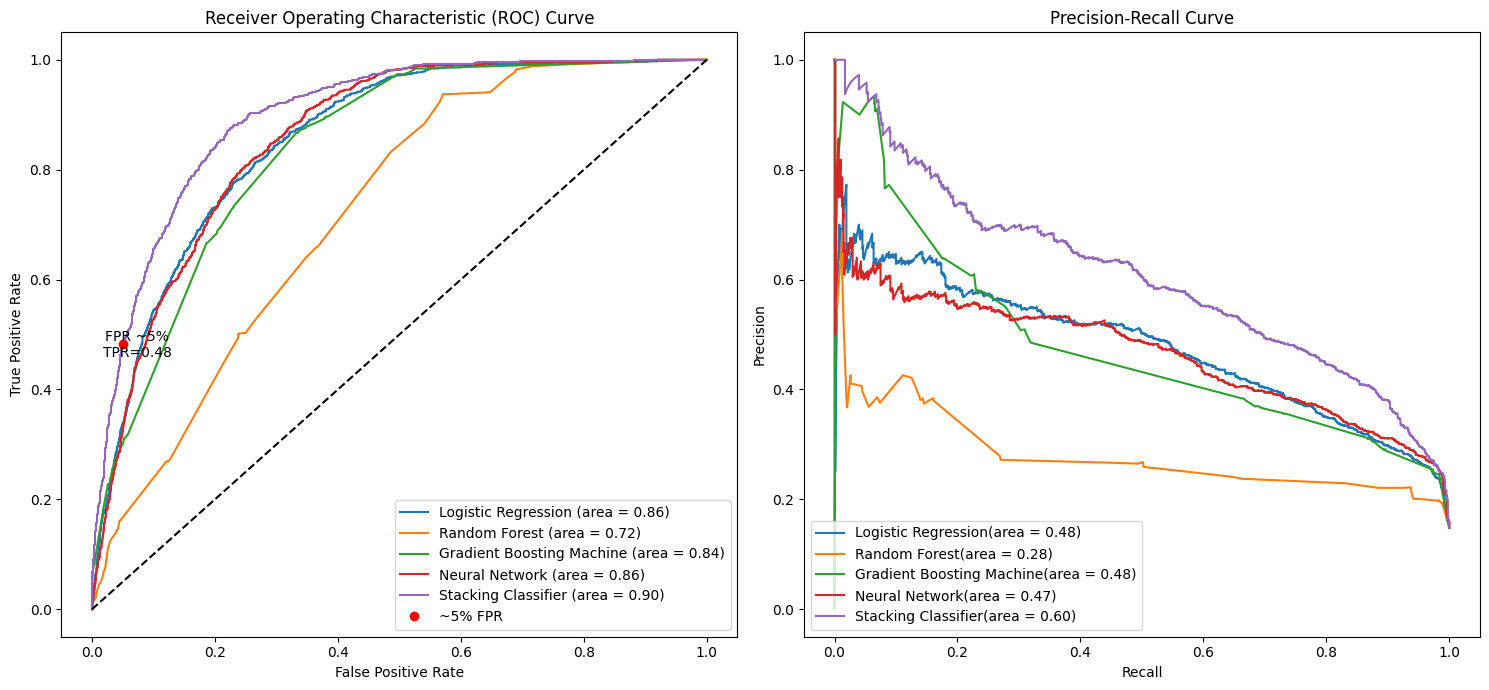

In [ ]:
# Example Usage
model_set_2 = {"Logistic Regression": lr_pipeline,
            "Random Forest": rf_pipeline_2,
            "Gradient Boosting Machine": gbm_pipeline_2,
             "Neural Network": nn_pipeline_2,
             "Stacking Classifier": stacking_pipeline_2}

def plot_model_curves(model_set, X_train, X_test, y_train, y_test):
  plt.figure(figsize=(15,7))

  for name, model in model_set.items():
    # Calculate metrics
    y_test_prob = model.predict_proba(X_test)[:, 1]
    # Binarize labels for AUC calculation
    lb = LabelBinarizer()
    y_test_binarized = lb.fit_transform(y_test).ravel()

    # Calculate ROC curve
    fpr, tpr, thresholds_roc = roc_curve(y_test_binarized, y_test_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

  plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal

  # Highlighting the 5% FPR point
  idx = next(i for i, x in enumerate(fpr) if x >= 0.05)  # Find the index of the FPR just over 5%
  plt.plot(fpr[idx], tpr[idx], 'ro', label='~5% FPR')  # 'ro' for red dot
  plt.annotate(f'FPR ~5%\nTPR={tpr[idx]:.2f}', (fpr[idx], tpr[idx]), textcoords="offset points", xytext=(10,-10), ha='center')

  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc="lower right")

    # Plot PR Curve
  plt.subplot(1, 2, 2)
  for name, model in model_set.items():
    # Calculate metrics
    y_test_prob = model.predict_proba(X_test)[:, 1]
    # Binarize labels for AUC calculation
    lb = LabelBinarizer()
    y_test_binarized = lb.fit_transform(y_test).ravel()
    # Calculate Precision-Recall curve
    precision, recall, thresholds_pr = precision_recall_curve(y_test_binarized, y_test_prob)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{name}(area = {pr_auc:.2f})')

  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall Curve')
  plt.legend(loc="lower left")
  plt.tight_layout()
  plt.show()


plot_model_curves(model_set_2, X_train, X_test, y_train, y_test)

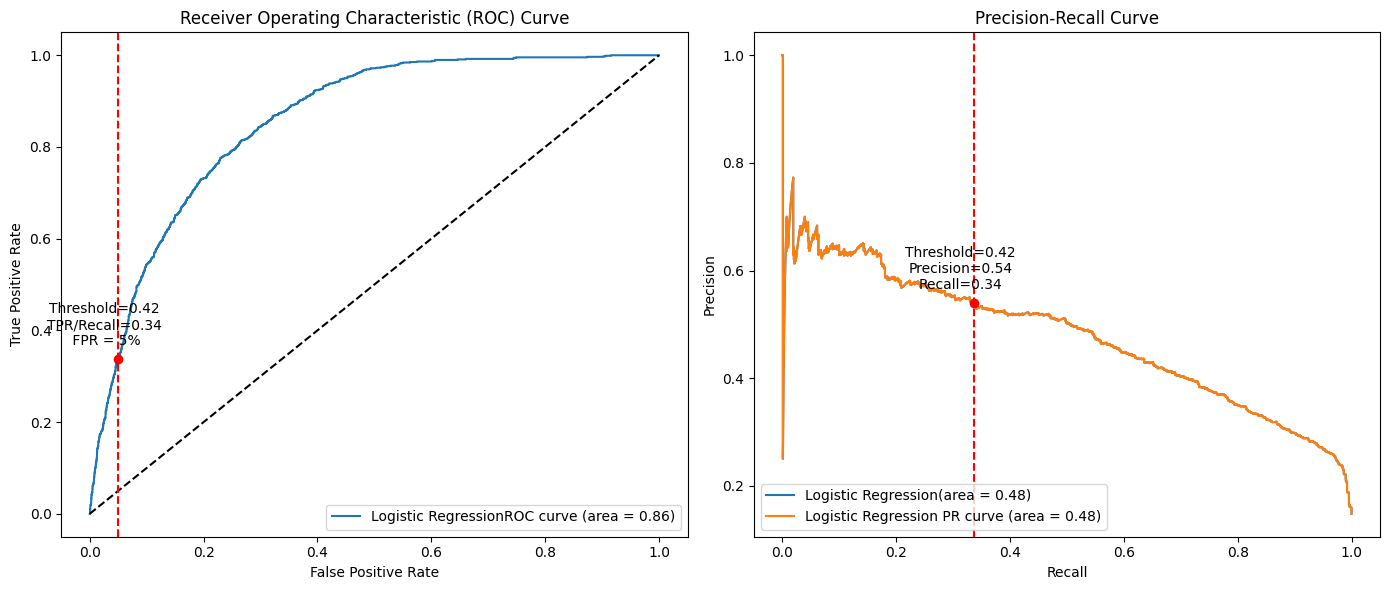

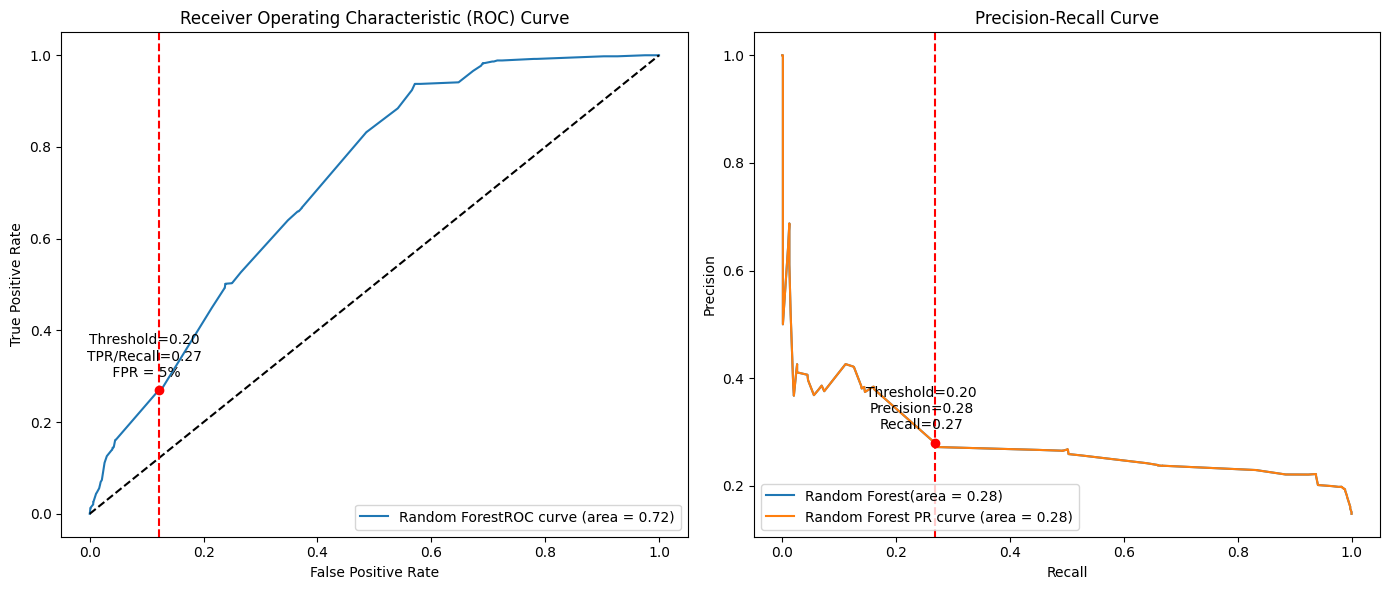

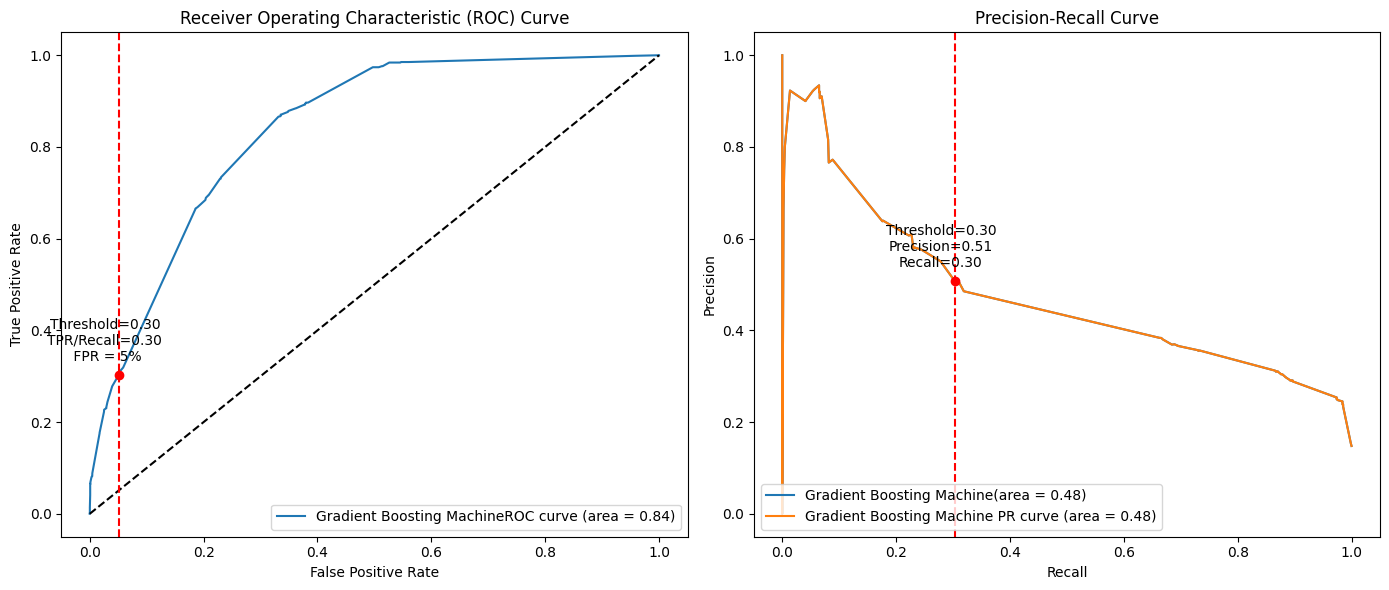

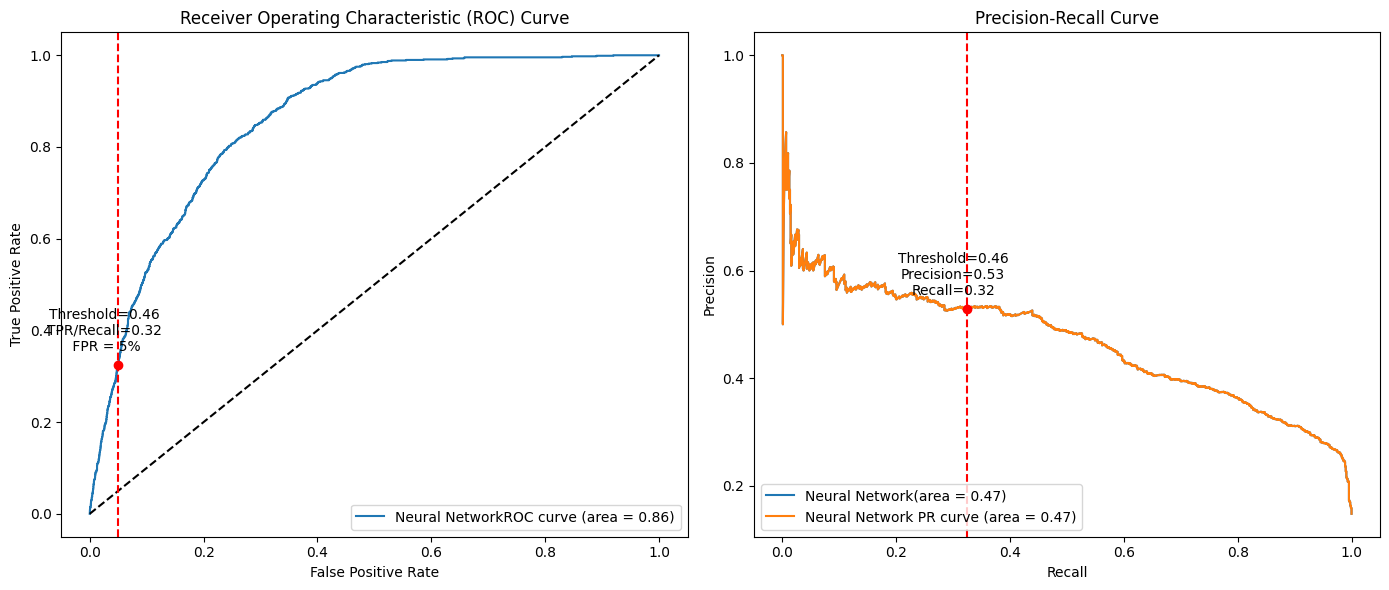

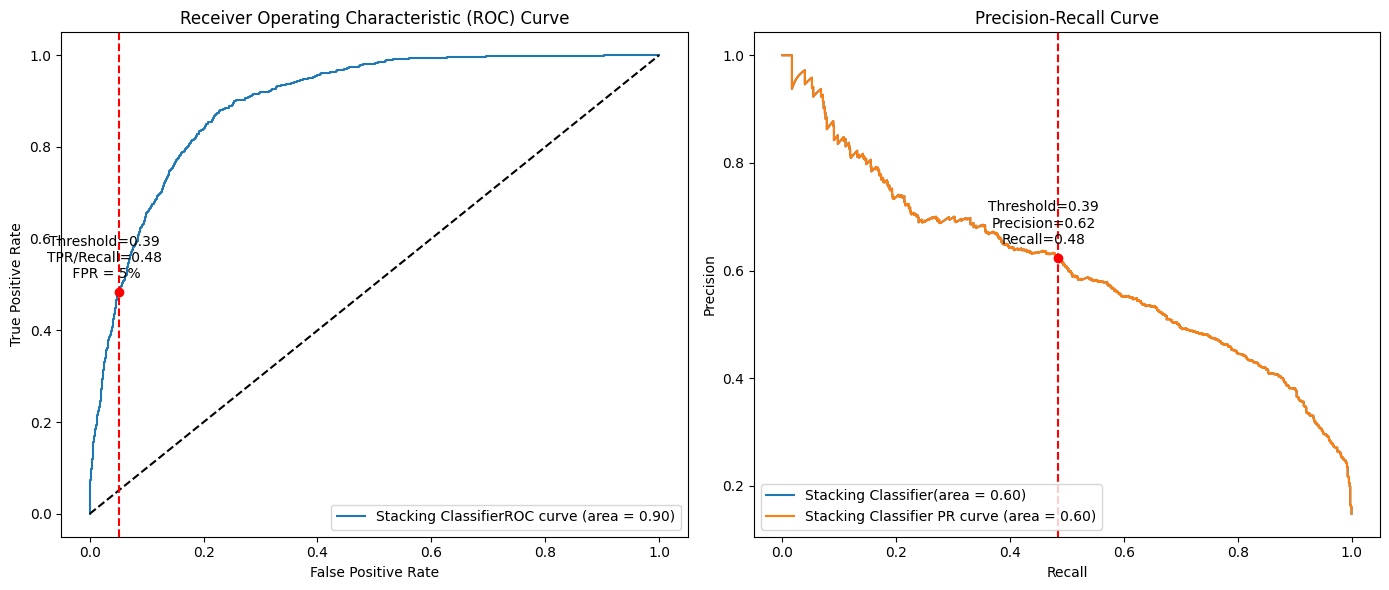

In [ ]:
# Assuming calculations for fpr, tpr, and thresholds_roc are already done
for name, model in model_set_2.items():
  plt.figure(figsize=(14, 6))
  # Calculate metrics
  y_test_prob = model.predict_proba(X_test)[:, 1]
  # Binarize labels for AUC calculation
  lb = LabelBinarizer()
  y_test_binarized = lb.fit_transform(y_test).ravel()

  # Calculate ROC curve
  fpr, tpr, thresholds_roc = roc_curve(y_test_binarized, y_test_prob)
  roc_auc = auc(fpr, tpr)

  # Plot ROC Curve
  plt.subplot(1, 2, 1)
  plt.plot(fpr, tpr, label=f'{name}ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal

  # Highlight the 5% FPR with a vertical line
  idx = next(i for i, x in enumerate(fpr) if x >= 0.05)  # Find the index for FPR just over 5%
  plt.axvline(x=fpr[idx], color='r', linestyle='--')  # Vertical line for ~5% FPR
  plt.plot(fpr[idx], tpr[idx], 'ro')  # Red dot at the intersection

  # Adding a text annotation for the threshold
  plt.annotate(f'Threshold={thresholds_roc[idx]:.2f}\nTPR/Recall={tpr[idx]:.2f}\n FPR = 5%',
   (fpr[idx], tpr[idx]),
   textcoords="offset points",
   xytext=(-10,10),
   ha='center')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc="lower right")

  # Plot PR Curve
  plt.subplot(1, 2, 2)
  # Calculate Precision-Recall curve
  precision, recall, thresholds_pr = precision_recall_curve(y_test_binarized, y_test_prob)
  pr_auc = auc(recall, precision)
  plt.plot(recall, precision, label=f'{name}(area = {pr_auc:.2f})')
  plt.plot(recall, precision, label=f'{name} PR curve (area = {pr_auc:.2f})')
  roc_threshold = thresholds_roc[idx]
  closest_threshold_index = np.argmin(np.abs(thresholds_pr - roc_threshold))
  selected_precision = precision[closest_threshold_index]
  selected_recall = recall[closest_threshold_index]
  plt.annotate(f'Threshold={roc_threshold:.2f}\nPrecision={selected_precision:.2f}\nRecall={selected_recall:.2f}',
             (selected_recall, selected_precision),
             textcoords="offset points",
             xytext=(-10,10),
             ha='center')
  # Highlight the 5% FPR with a vertical line
  idx = next(i for i, x in enumerate(fpr) if x >= 0.05)  # Find the index for FPR just over 5%
  plt.axvline(x=selected_recall, color='r', linestyle='--')  # Vertical line for ~5% FPR
  plt.plot(selected_recall,selected_precision, 'ro')  # Red dot at the intersection
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall Curve')
  plt.legend(loc="lower left")
  plt.tight_layout()
  plt.show()

---
## Exploring With Our Best Fitting Model: Stacking Classifier
- Permutation Importance
- Coefficient Importance
- Partial Dependence Plots
- Global and Local Explanations with DALEX

## Permutation Importance


In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(stacking_pipeline_2, X_test, y_test,
                                n_repeats=5, random_state=42,
                                n_jobs=-1)


In [ ]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers."""
    feature_names = []

    # Loop through each transformer within the ColumnTransformer
    for name, transformer, columns in column_transformer.transformers_:
        if name == 'remainder':  # Skip the 'remainder' transformer, if present
            continue
        if isinstance(transformer, Pipeline):
            # If the transformer is a pipeline, get the last transformer from the pipeline
            transformer = transformer.steps[-1][1]

        if hasattr(transformer, 'get_feature_names_out'):
            # If the transformer has 'get_feature_names_out', use it
            names = list(transformer.get_feature_names_out(columns))
        else:
            # Otherwise, just use the column names directly
            names = list(columns)

        feature_names.extend(names)

    return feature_names

transformed_feature_names = get_feature_names(preprocessor)
transformed_feature_names

['loan_amnt',
 'last_pymnt_amnt',
 'total_rec_late_fee',
 'out_prncp_inv',
 'out_prncp',
 'total_acc',
 'revol_bal',
 'pub_rec',
 'open_acc',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'fico_range_high',
 'fico_range_low',
 'delinq_2yrs',
 'dti',
 'annual_inc',
 'installment',
 'funded_amnt_inv',
 'funded_amnt',
 'inq_last_6mths',
 'home_ownership_MORTGAGE',
 'home_ownership_NONE',
 'home_ownership_OTHER',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'grade_A',
 'grade_B',
 'grade_C',
 'grade_D',
 'grade_E',
 'grade_F',
 'grade_G',
 'sub_grade_A1',
 'sub_grade_A2',
 'sub_grade_A3',
 'sub_grade_A4',
 'sub_grade_A5',
 'sub_grade_B1',
 'sub_grade_B2',
 'sub_grade_B3',
 'sub_grade_B4',
 'sub_grade_B5',
 'sub_grade_C1',
 'sub_grade_C2',
 'sub_grade_C3',
 'sub_grade_C4',
 'sub_grade_C5',
 'sub_grade_D1',
 'sub_grade_D2',
 'sub_grade_D3',
 'sub_grade_D4',
 'sub_grade_D5',
 'sub_grade_E1',
 'sub_grade_E2',
 'sub_grade_E3',
 'sub_grade_E4',
 'sub_grade_E5',
 'sub_grade_F1',
 'sub

In [ ]:
feature_names = numeric_features + categorical_features

for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
        print(f"Feature {feature_names[i]} "
              f"Mean Importance: {result.importances_mean[i]:.3f} "
              f"+/- {result.importances_std[i]:.3f}")


Feature inq_last_6mths Mean Importance: 0.060 +/- 0.002
Feature last_pymnt_amnt Mean Importance: 0.042 +/- 0.003
Feature funded_amnt Mean Importance: 0.018 +/- 0.001
Feature out_prncp_inv Mean Importance: 0.016 +/- 0.003
Feature total_rec_late_fee Mean Importance: 0.013 +/- 0.002
Feature out_prncp Mean Importance: 0.012 +/- 0.002
Feature home_ownership Mean Importance: 0.009 +/- 0.002
Feature loan_amnt Mean Importance: 0.009 +/- 0.001
Feature funded_amnt_inv Mean Importance: 0.003 +/- 0.001
Feature mths_since_last_delinq Mean Importance: 0.002 +/- 0.001


In [ ]:
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,  # Or 'feature_names' if applicable
    'Importance Mean': result.importances_mean,
    'Importance Std': result.importances_std
}).sort_values(by='Importance Mean', ascending=False).reset_index(drop=True)
feature_importances_df

Feature  Importance Mean  Importance Std
0           inq_last_6mths          0.05964         0.00181
1          last_pymnt_amnt          0.04224         0.00275
2              funded_amnt          0.01763         0.00133
3            out_prncp_inv          0.01588         0.00251
4       total_rec_late_fee          0.01269         0.00179
5                out_prncp          0.01232         0.00228
6           home_ownership          0.00944         0.00156
7                loan_amnt          0.00880         0.00119
8          funded_amnt_inv          0.00255         0.00062
9   mths_since_last_delinq          0.00238         0.00059
10                     dti          0.00124         0.00062
11             installment          0.00087         0.00046
12          fico_range_low          0.00084         0.00080
13               total_acc          0.00071         0.00039
14                open_acc          0.00047         0.00106
15               sub_grade          0.00044         0.00057
16              annual_inc          0.00034         0.00127
17     verification_status          0.00030         0.00050
18                   grade          0.00000         0.00056
19             delinq_2yrs         -0.00024         0.00050
20               revol_bal         -0.00050         0.00034
21  mths_since_last_record         -0.00077         0.00076
22                 pub_rec         -0.00121         0.00078
23         fico_range_high         -0.00131         0.00029

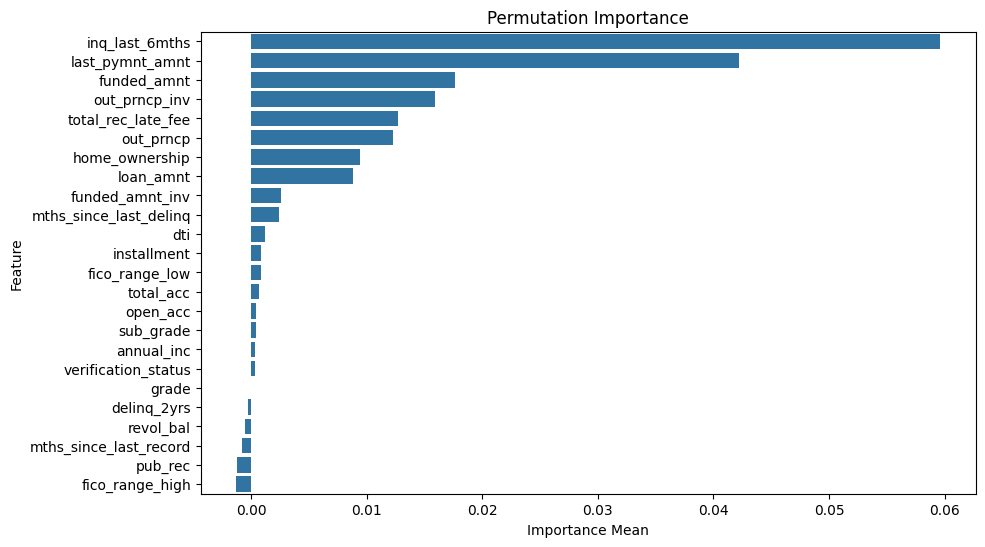

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(feature_importances_df, x='Importance Mean', y='Feature')
plt.title('Permutation Importance')
plt.show()

## Operational Strategy for False Positives (2% and 5%)

In [ ]:
stacking_pipeline_2.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'funded_amnt',
                                                   'funded_amnt_inv',
                                                   'installment', 'annual_inc',
                                                   'dti', 'delinq_2yrs',
                                                   'fico_range_low',
                                                   'fico_range_high',
                                                   'inq_last_6mths',
                                                   'mths_since_last_delinq',
                                                   'mths_since_last_record',
                                                   'open_acc', 'pu...
                                                   'verification_status'])])),
                ('classifier',
                 StackingClassifier(cv=3,
                                    estimators=[('gbm',
                                                 GradientBoostingClassifier(learning_rate=0.5,
                                                                            max_depth=6,
                                                                            n_estimators=24,
                                                                            random_state=42)),
                                                ('rf',
                                                 RandomForestClassifier(max_depth=7,
                                                                        n_estimators=30,
                                                                        random_state=42)),
                                                ('nn',
                                                 MLPClassifier(alpha=0.01,
                                                               random_state=42))],
                                    final_estimator=LogisticRegression(),
                                    n_jobs=-1))])

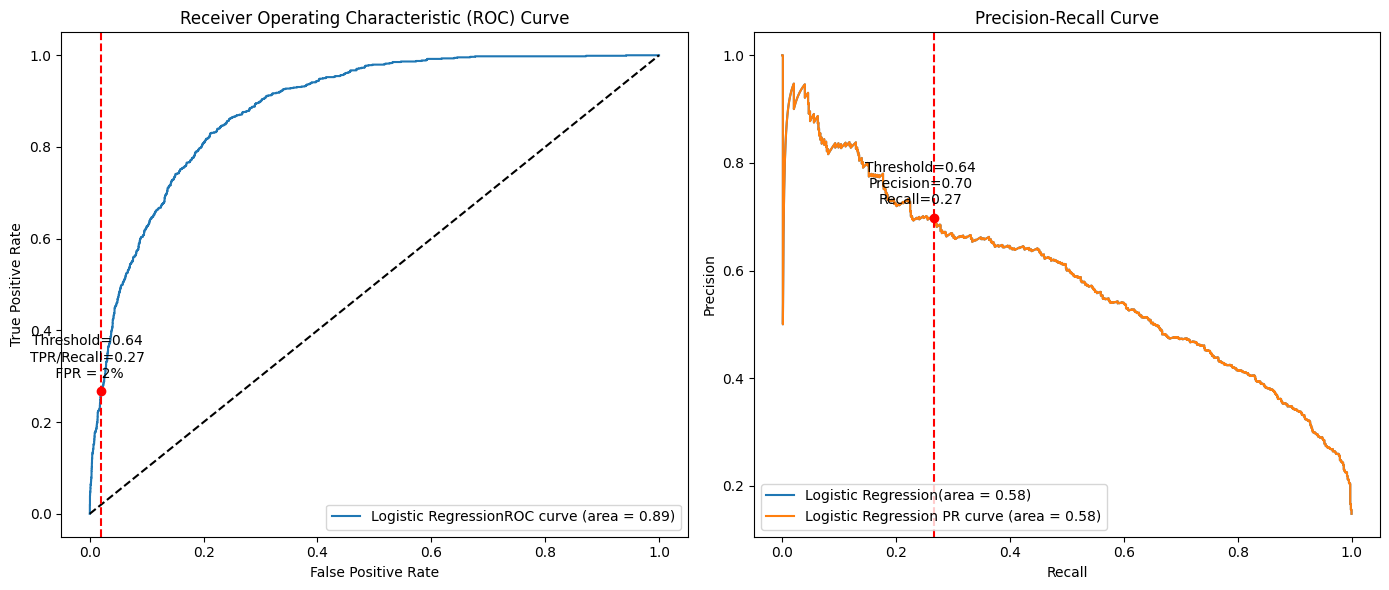

In [ ]:
# Assuming calculations for fpr, tpr, and thresholds_roc are already done
plt.figure(figsize=(14, 6))
# Calculate metrics
y_test_prob = stacking_pipeline_2.predict_proba(X_test)[:, 1]
# Binarize labels for AUC calculation
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test).ravel()

# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test_binarized, y_test_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'{name}ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal

# Highlight the 5% FPR with a vertical line
idx = next(i for i, x in enumerate(fpr) if x >= 0.02)  # Find the index for FPR just over 2%
plt.axvline(x=fpr[idx], color='r', linestyle='--')  # Vertical line for ~2% FPR
plt.plot(fpr[idx], tpr[idx], 'ro')  # Red dot at the intersection

# Adding a text annotation for the threshold
plt.annotate(f'Threshold={thresholds_roc[idx]:.2f}\nTPR/Recall={tpr[idx]:.2f}\n FPR = 2%',
 (fpr[idx], tpr[idx]),
   textcoords="offset points",
   xytext=(-10,10),
   ha='center')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot PR Curve
plt.subplot(1, 2, 2)
# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test_binarized, y_test_prob)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, label=f'{name}(area = {pr_auc:.2f})')
plt.plot(recall, precision, label=f'{name} PR curve (area = {pr_auc:.2f})')
roc_threshold = thresholds_roc[idx]
closest_threshold_index = np.argmin(np.abs(thresholds_pr - roc_threshold))
selected_precision = precision[closest_threshold_index]
selected_recall = recall[closest_threshold_index]
plt.annotate(f'Threshold={roc_threshold:.2f}\nPrecision={selected_precision:.2f}\nRecall={selected_recall:.2f}',
             (selected_recall, selected_precision),
             textcoords="offset points",
             xytext=(-10,10),
             ha='center')
# Highlight the 5% FPR with a vertical line
idx = next(i for i, x in enumerate(fpr) if x >= 0.02)  # Find the index for FPR just over 2%
plt.axvline(x=selected_recall, color='r', linestyle='--')  # Vertical line for ~2% FPR
plt.plot(selected_recall,selected_precision, 'ro')  # Red dot at the intersection
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

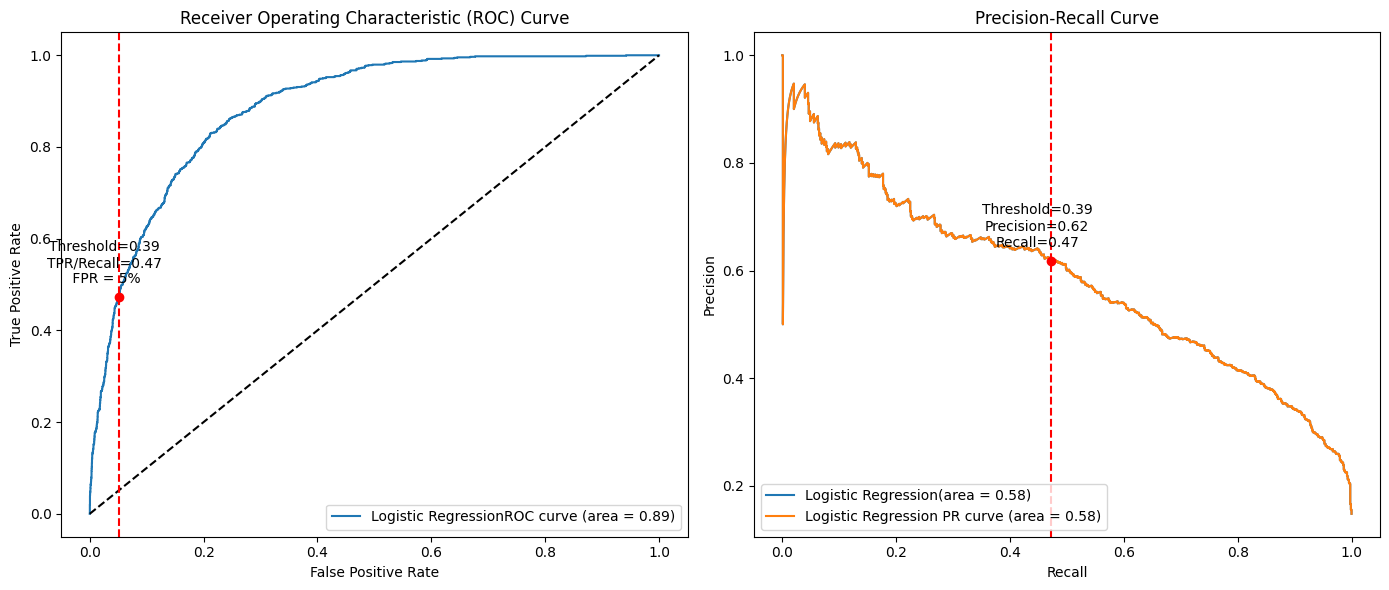

In [ ]:
# Assuming calculations for fpr, tpr, and thresholds_roc are already done
plt.figure(figsize=(14, 6))
# Calculate metrics
y_test_prob = stacking_pipeline_2.predict_proba(X_test)[:, 1]
# Binarize labels for AUC calculation
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test).ravel()

# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test_binarized, y_test_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'{name}ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal

# Highlight the 5% FPR with a vertical line
idx = next(i for i, x in enumerate(fpr) if x >= 0.05)  # Find the index for FPR just over 2%
plt.axvline(x=fpr[idx], color='r', linestyle='--')  # Vertical line for ~5% FPR
plt.plot(fpr[idx], tpr[idx], 'ro')  # Red dot at the intersection

# Adding a text annotation for the threshold
plt.annotate(f'Threshold={thresholds_roc[idx]:.2f}\nTPR/Recall={tpr[idx]:.2f}\n FPR = 5%',
 (fpr[idx], tpr[idx]),
   textcoords="offset points",
   xytext=(-10,10),
   ha='center')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot PR Curve
plt.subplot(1, 2, 2)
# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test_binarized, y_test_prob)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, label=f'{name}(area = {pr_auc:.2f})')
plt.plot(recall, precision, label=f'{name} PR curve (area = {pr_auc:.2f})')
roc_threshold = thresholds_roc[idx]
closest_threshold_index = np.argmin(np.abs(thresholds_pr - roc_threshold))
selected_precision = precision[closest_threshold_index]
selected_recall = recall[closest_threshold_index]
plt.annotate(f'Threshold={roc_threshold:.2f}\nPrecision={selected_precision:.2f}\nRecall={selected_recall:.2f}',
             (selected_recall, selected_precision),
             textcoords="offset points",
             xytext=(-10,10),
             ha='center')
# Highlight the 5% FPR with a vertical line
idx = next(i for i, x in enumerate(fpr) if x >= 0.05)  # Find the index for FPR just over 5%
plt.axvline(x=selected_recall, color='r', linestyle='--')  # Vertical line for ~5% FPR
plt.plot(selected_recall,selected_precision, 'ro')  # Red dot at the intersection
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

In [ ]:
stacking_pipeline_2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['loan_amnt',
                                                   'last_pymnt_amnt',
                                                   'total_rec_late_fee',
                                                   'out_prncp_inv', 'out_prncp',
                                                   'total_acc', 'revol_bal',
                                                   'pub_rec', 'open_acc',
                                                   'mths_since_last_delinq',
                                                   'mths_since_last_record',
                                                   'fico_range_high',
                                                   'fico_range_low...
                                                   'verification_status'])])),
                ('classifier',
                 StackingClassifier(cv=3,
                                    estimators=[('gbm',
                                                 GradientBoostingClassifier(learning_rate=0.5,
                                                                            max_depth=6,
                                                                            n_estimators=24,
                                                                            random_state=42)),
                                                ('rf',
                                                 RandomForestClassifier(max_depth=7,
                                                                        n_estimators=30,
                                                                        random_state=42)),
                                                ('nn',
                                                 MLPClassifier(alpha=0.01,
                                                               random_state=42))],
                                    final_estimator=LogisticRegression(),
                                    n_jobs=-1))])

## Partial Dependance Plot

In [ ]:
#!pip install -U scikit-learn
numeric_features

['loan_amnt',
 'last_pymnt_amnt',
 'total_rec_late_fee',
 'out_prncp_inv',
 'out_prncp',
 'total_acc',
 'revol_bal',
 'pub_rec',
 'open_acc',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'fico_range_high',
 'fico_range_low',
 'delinq_2yrs',
 'dti',
 'annual_inc',
 'installment',
 'funded_amnt_inv',
 'funded_amnt',
 'inq_last_6mths']

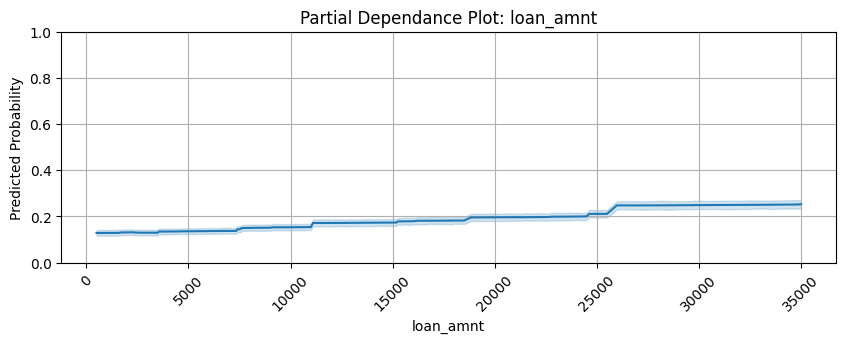

In [ ]:
var = 'loan_amnt'
sample_n = 1000
pdp_values = pd.DataFrame(X_train[var].sort_values().sample(frac=0.2).unique(),columns=[var])
pdp_sample = X_train.sample(sample_n).drop(var, axis=1)

pdp_cross = pdp_sample.merge(pdp_values, how='cross')
pdp_cross['pred'] = stacking_pipeline_2.predict_proba(pdp_cross)[:,1]
plt.figure(figsize=(10, 3))
sns.lineplot(x=f"{var}", y='pred', data=pdp_cross)
plt.title(f"Partial Dependance Plot: {var}")
plt.ylabel('Predicted Probability')
plt.xticks(rotation=45)
plt.ylim(0.0, 1)
plt.grid(True)
plt.show()

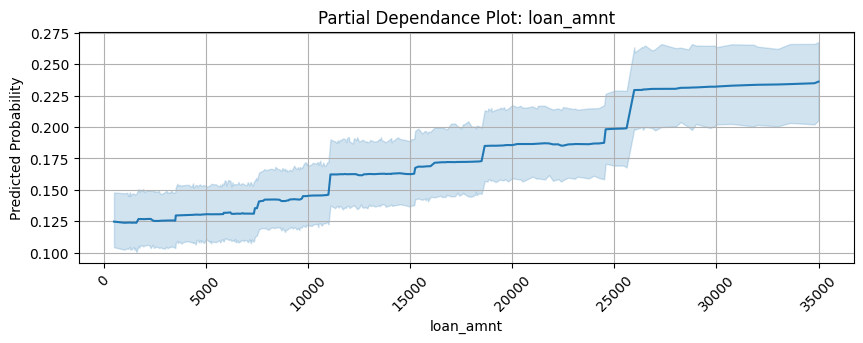

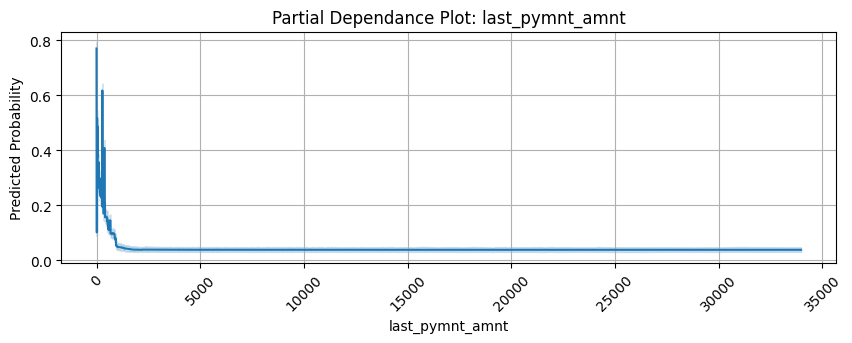

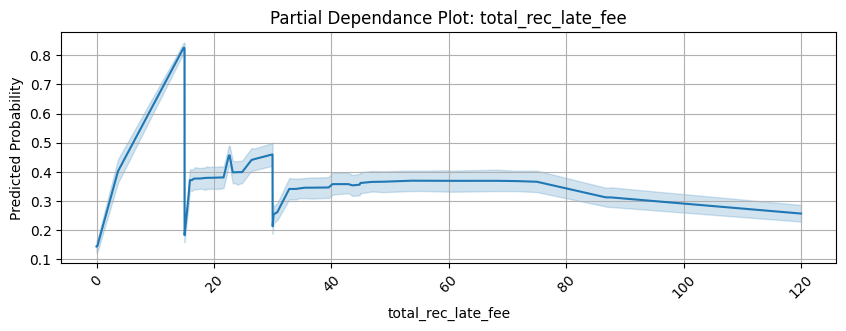

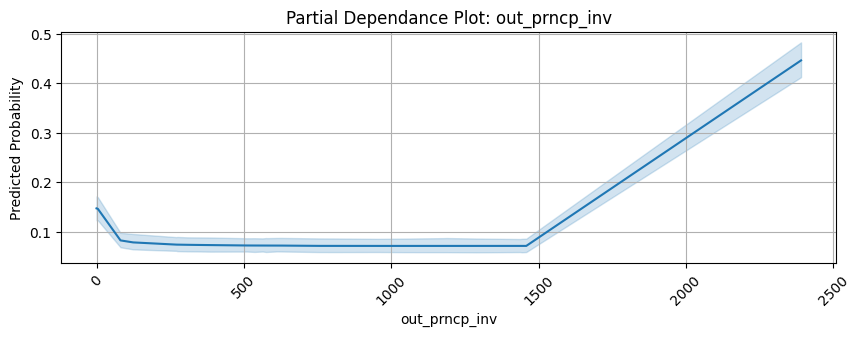

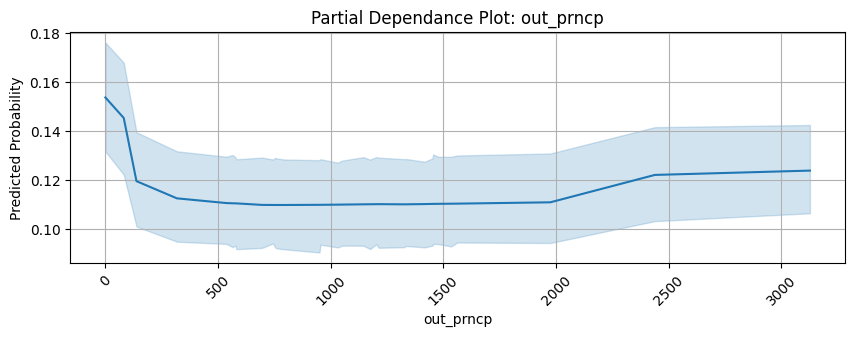

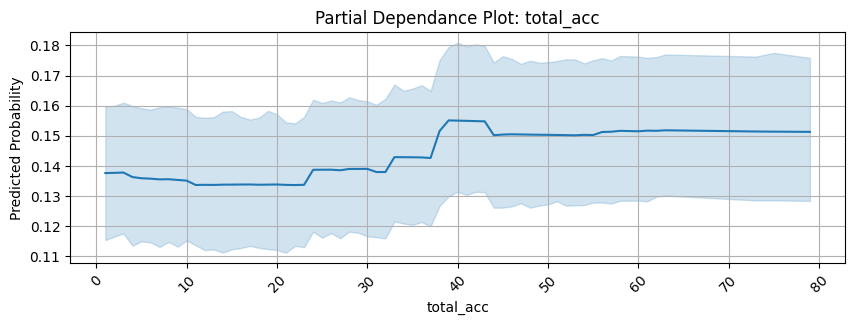

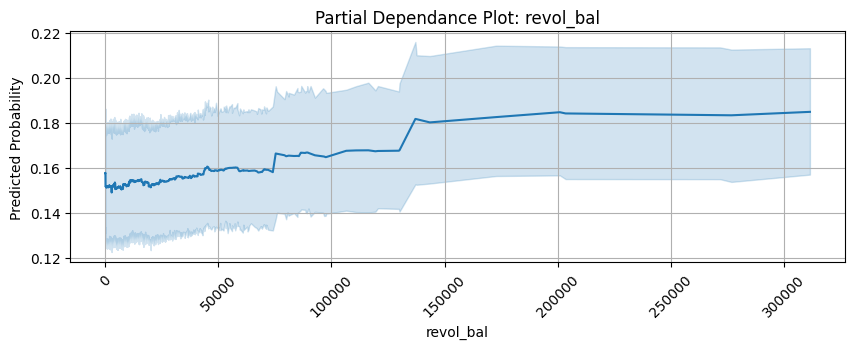

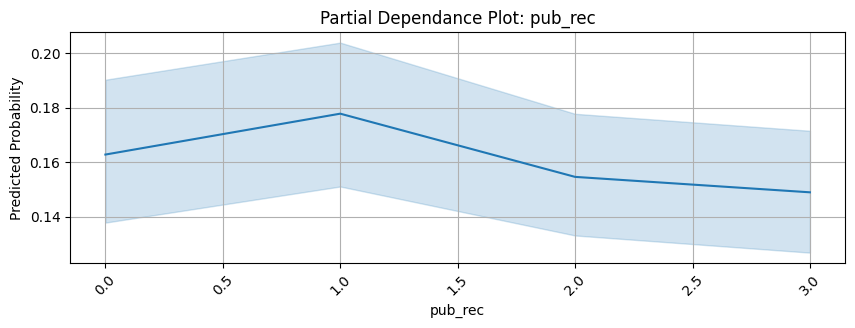

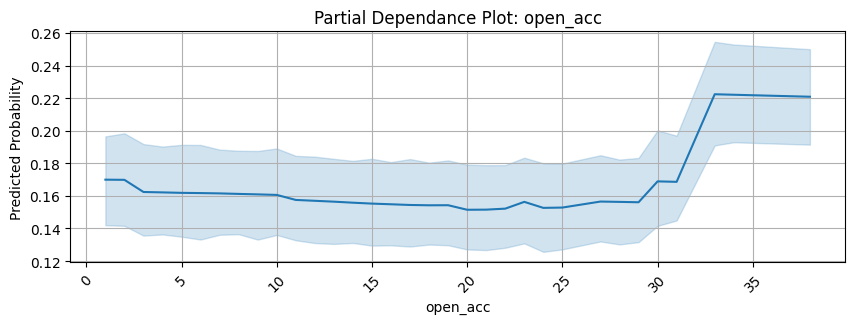

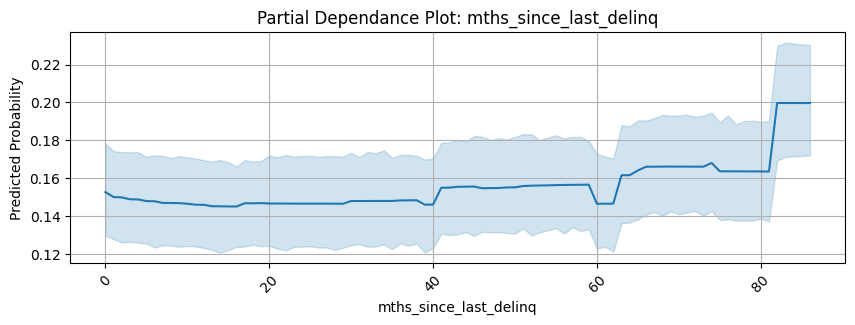

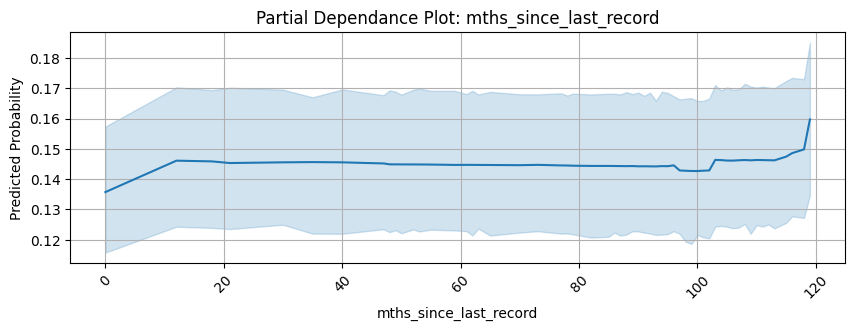

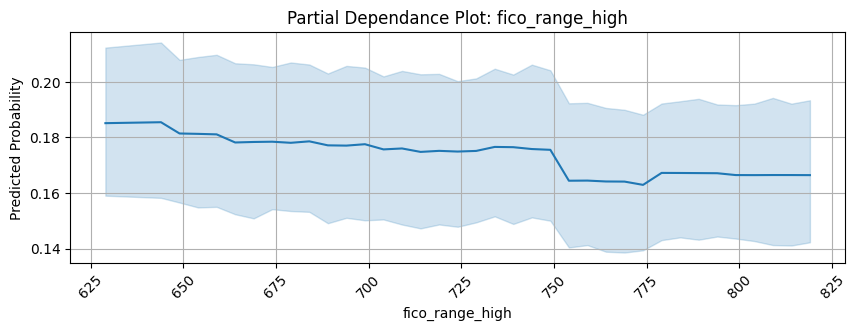

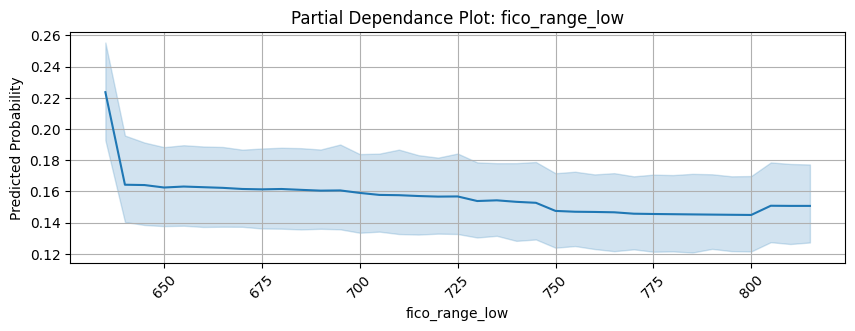

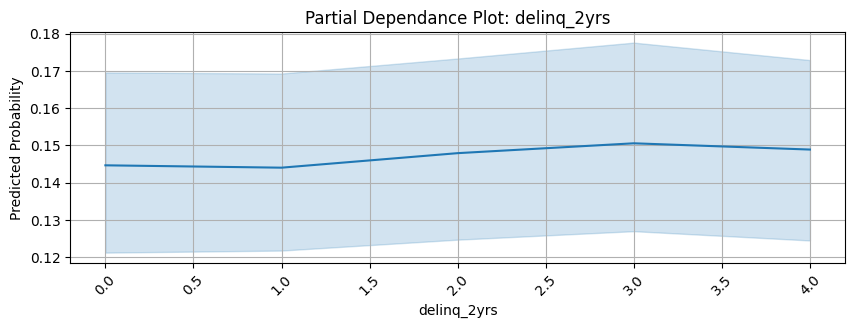

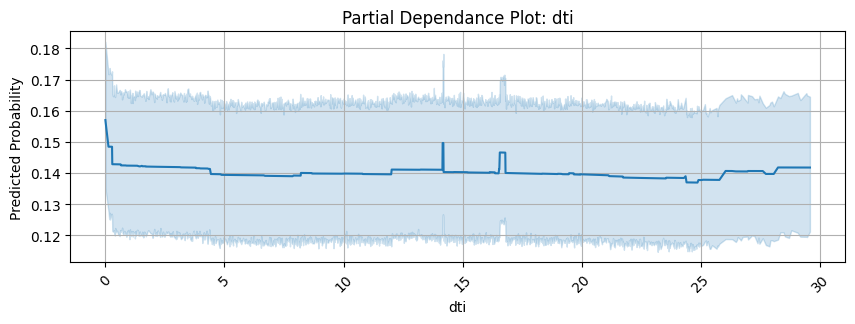

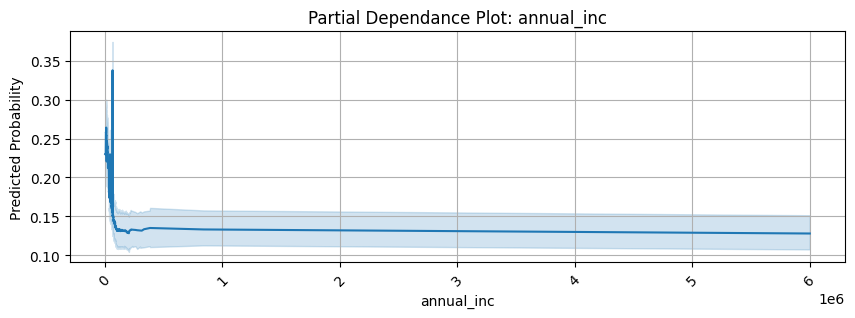

In [ ]:
def pdp_plot_numeric(var, sample_n):
  # var = 'credit_amount'
  pdp_values = pd.DataFrame(X_train[var].sort_values().sample(frac=0.1).unique(),columns=[var])
  pdp_sample = X_train.sample(sample_n).drop(var, axis=1)

  pdp_cross = pdp_sample.merge(pdp_values, how='cross')
  pdp_cross['pred'] = stacking_pipeline_2.predict_proba(pdp_cross)[:,1]
  plt.figure(figsize=(10, 3))
  sns.lineplot(x=f"{var}", y='pred', data=pdp_cross)
  plt.title(f"Partial Dependance Plot: {var}")
  plt.ylabel('Predicted Probability')
  plt.xticks(rotation=45)
  #plt.ylim(0, 1)
  plt.grid(True)
  plt.show()

# numeric_features = ['credit_amount', 'duration', 'age']
for var in numeric_features:
  pdp_plot_numeric(var, sample_n=300)

## PDP Categorical

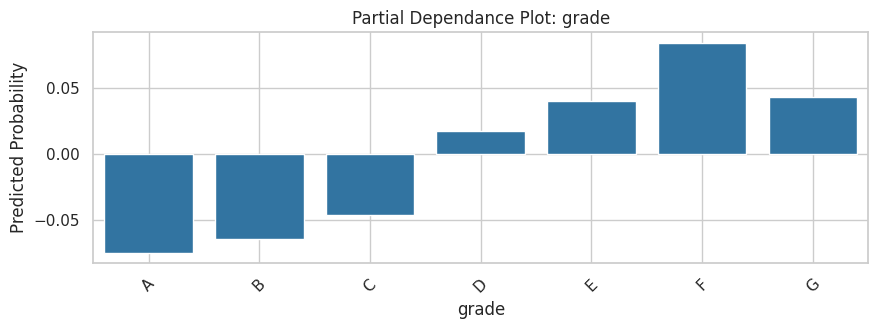

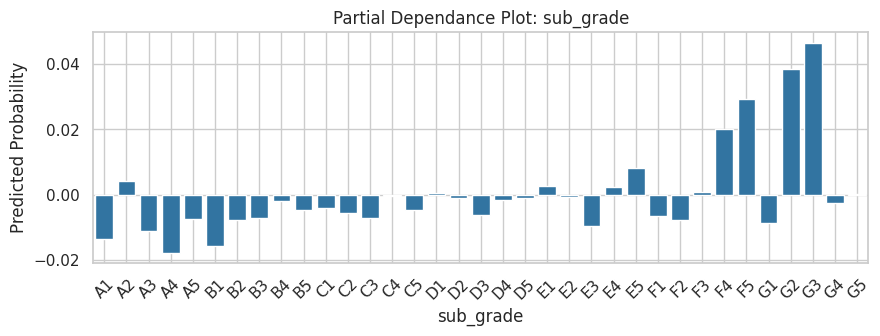

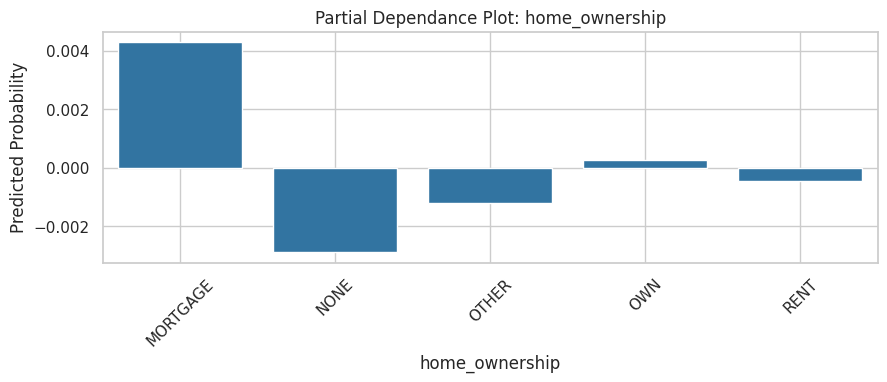

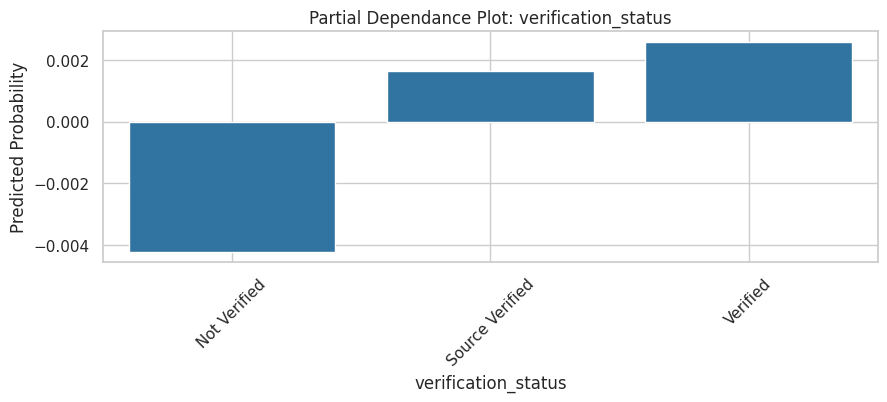

In [ ]:
def pdp_plot_categorical(var, sample_n):
  sns.set_style("whitegrid")  # Try "darkgrid", "ticks", etc.
  sns.set_context("notebook")  # Try "paper", "notebook", "poster" for different sizes

  pdp_values = pd.DataFrame(X_test[var].sort_values().unique(),columns=[var])
  pdp_sample = X_test.sample(sample_n).drop(var, axis=1)

  pdp_cross = pdp_sample.merge(pdp_values, how='cross')
  pdp_cross['pred'] = stacking_pipeline_2.predict_proba(pdp_cross)[:,1]
  mean_pred = pdp_cross['pred'].mean()
  pdp_cross['pred'] = pdp_cross['pred'].apply(lambda x: x - mean_pred)
  plt.figure(figsize=(10, 3))
 #sns.lineplot(x=f"{var}", y='pred', data=pdp_cross)
  sns.barplot(x=f"{var}", y='pred',
              ci=None,
              data=pdp_cross,
              estimator="mean")
  plt.title(f"Partial Dependance Plot: {var}")
  plt.ylabel('Predicted Probability')
  plt.xticks(rotation=45)
  #plt.ylim(0, 1)
  plt.grid(True)
  plt.show()


for var in categorical_features:
  pdp_plot_categorical(var, sample_n=100)

In [ ]:
!pip install dalex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.0-py3-none-any.whl size=1042470 sha256=1553fe170ce0ca2deaa8a2dc05318967eb8d32507484a1e54848e0e77ba2f0f2
  Stored in directory: /root/.cache/pip/wheels/e2/38/c1/25a95206a4873a287d776fc8e77aa7d93971acc643ecb3db38
Successfully built dalex


In [ ]:
import dalex as dx # for explanations
pipeline_explainer = dx.Explainer(stacking_pipeline_2, X_test, y_test)
pipeline_explainer

Preparation of a new explainer is initiated

  -> data              : 5956 rows 27 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 5956 values
  -> data              : A column identical to the target variable `y` has been found in the `data`.
  -> data              : It is highly recommended to pass `data` without the target variable column.
  -> model_class       : sklearn.ensemble._stacking.StackingClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7b15dffcc700> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.0248, mean = 0.15, max = 0.963
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.956,

In [ ]:
model_performance  = pipeline_explainer.model_performance("classification")
model_performance.result

recall  precision        f1  accuracy       auc
StackingClassifier  0.376844   0.645914  0.475986  0.877267  0.886689

## Variable Importance

In [ ]:
# Calculate feature importance
fi = pipeline_explainer.model_parts(processes=4)

# Plot feature importance
fi.plot()

## PDP

In [ ]:
# Let's say you want to create PDPs for a feature named 'feature_name'
pdp_numeric_profile = pipeline_explainer.model_profile(variables=numeric_features)

# Now, plot the PDP for 'feature_name'
pdp_numeric_profile.plot()

Calculating ceteris paribus:  80%|████████  | 16/20 [13:29<03:19, 49.98s/it]

In [ ]:
pdp_categorical_profile = pipeline_explainer.model_profile(
    variable_type = 'categorical',
    variables=categorical_features)

# Now, plot the PDP for 'feature_name'
pdp_categorical_profile.plot()

## Local predictions

In [ ]:
X_test['pred']= stacking_pipeline_2.predict(X_test)
X_test['pred_proba']= stacking_pipeline_2.predict_proba(X_test)[:,1]
X_test[target] = y_test
X_test.head()

loan_amnt  funded_amnt  funded_amnt_inv  installment  annual_inc  \
13494     4375.0       4375.0      4225.000000       131.95     17760.0   
21759    10000.0      10000.0      9475.000000       323.85     55000.0   
11247    24000.0      24000.0     22921.129991       560.56     53000.0   
25028     5550.0       5550.0      5550.000000       189.98     50000.0   
20440    10000.0      10000.0      9875.000000       232.58     45000.0   

         dti  delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  \
13494  20.20          0.0           750.0            754.0             0.0   
21759  18.59          0.0           715.0            719.0             0.0   
11247  22.42          0.0           740.0            744.0             1.0   
25028  21.58          0.0           665.0            669.0             2.0   
20440   5.97          0.0           765.0            769.0             0.0   

       ...  out_prncp_inv  total_rec_late_fee  last_pymnt_amnt  grade  \
13494  ...            0.0                 0.0            36.57      A   
21759  ...            0.0                 0.0          1317.62      B   
11247  ...            0.0                 0.0         23722.52      C   
25028  ...            0.0                 0.0           202.16      D   
20440  ...            0.0                 0.0           232.58      C   

       sub_grade  home_ownership  verification_status  pred  pred_proba  \
13494         A1             OWN      Source Verified     0    0.090808   
21759         B2            RENT         Not Verified     0    0.031907   
11247         C5        MORTGAGE             Verified     0    0.033978   
25028         D1        MORTGAGE         Not Verified     0    0.303399   
20440         C3            RENT         Not Verified     0    0.462066   

       loan_status  
13494            0  
21759            0  
11247            0  
25028            0  
20440            1  

[5 rows x 27 columns]

# Explaining True Positives

In [ ]:
top_10_tp = (X_test
             .query('loan_status == pred and loan_status == 1')
             .sort_values(by='pred_proba', ascending=False)
             .head(10)
             .reset_index(drop=True)
)
top_10_tp

loan_amnt  funded_amnt  funded_amnt_inv  installment  annual_inc    dti  \
0     8000.0       8000.0      7975.000000       201.03     40000.0  14.07   
1    25000.0       7850.0      3799.999312       265.41    200000.0  15.62   
2     3000.0       3000.0      3000.000000        93.85     28800.0  20.33   
3     3000.0       3000.0      3000.000000       107.80     44000.0   0.46   
4    30000.0      30000.0      7100.000000       778.72     51600.0  19.09   
5     6400.0       6400.0      6400.000000       197.36     45600.0  13.39   
6     2400.0       2400.0      2400.000000        60.86     21600.0   6.00   
7     5000.0       5000.0       500.009430       163.49    264000.0   8.30   
8    25000.0      25000.0     23950.000000       592.52    109000.0  13.90   
9    13000.0      13000.0     10099.996575       445.45     36000.0  18.93   

   delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  ...  \
0          0.0           675.0            679.0             2.0  ...   
1          0.0           705.0            709.0             3.0  ...   
2          0.0           715.0            719.0             3.0  ...   
3          0.0           660.0            664.0             3.0  ...   
4          0.0           705.0            709.0             3.0  ...   
5          0.0           715.0            719.0             0.0  ...   
6          1.0           675.0            679.0             2.0  ...   
7          0.0           675.0            679.0            25.0  ...   
8          0.0           730.0            734.0             5.0  ...   
9          0.0           665.0            669.0             5.0  ...   

   out_prncp_inv  total_rec_late_fee  last_pymnt_amnt  grade  sub_grade  \
0            0.0           14.932100           201.03      E         E4   
1            0.0           14.904255           103.40      D         D3   
2            0.0           14.971231           108.85      A         A5   
3            0.0           14.949907           107.80      E         E4   
4            0.0            0.000000             0.00      E         E2   
5            0.0           14.984799           197.36      A         A5   
6            0.0           14.953171            60.86      E         E5   
7            0.0           14.997329           163.49      C         C3   
8            0.0           29.630000           350.00      D         D3   
9            0.0           44.472931           460.35      E         E1   

   home_ownership  verification_status  pred  pred_proba  loan_status  
0            RENT      Source Verified     1    0.962955            1  
1        MORTGAGE         Not Verified     1    0.955525            1  
2            RENT         Not Verified     1    0.955027            1  
3            RENT         Not Verified     1    0.954614            1  
4        MORTGAGE             Verified     1    0.949818            1  
5        MORTGAGE      Source Verified     1    0.948395            1  
6             OWN             Verified     1    0.945858            1  
7        MORTGAGE         Not Verified     1    0.945046            1  
8            RENT             Verified     1    0.944491            1  
9            RENT         Not Verified     1    0.943402            1  

[10 rows x 27 columns]

In [ ]:
bd_1 = pipeline_explainer.predict_parts(top_10_tp.iloc[0],
                                           type='break_down',
                                           label="record 1")

In [ ]:
bd_1.result

variable_name   variable_value  \
0                intercept                    
1       total_rec_late_fee            14.93   
2          last_pymnt_amnt            201.0   
3                    grade                E   
4              funded_amnt           8000.0   
5               annual_inc          40000.0   
6           inq_last_6mths              2.0   
7                sub_grade               E4   
8          funded_amnt_inv           7975.0   
9           fico_range_low            675.0   
10         fico_range_high            679.0   
11                open_acc              5.0   
12                     dti            14.07   
13     verification_status  Source Verified   
14               out_prncp              0.0   
15           out_prncp_inv              0.0   
16             delinq_2yrs              0.0   
17              pred_proba            0.963   
18                    pred              1.0   
19             loan_status              1.0   
20  mths_since_last_record              nan   
21          home_ownership             RENT   
22  mths_since_last_delinq              nan   
23             installment            201.0   
24                 pub_rec              0.0   
25               revol_bal           6868.0   
26               loan_amnt           8000.0   
27               total_acc             11.0   
28                                            

                                 variable  cumulative  contribution  sign  \
0                               intercept    0.149949      0.149949   1.0   
1              total_rec_late_fee = 14.93    0.758405      0.608455   1.0   
2                 last_pymnt_amnt = 201.0    0.906722      0.148318   1.0   
3                               grade = E    0.914274      0.007552   1.0   
4                    funded_amnt = 8000.0    0.918699      0.004425   1.0   
5                    annual_inc = 40000.0    0.926867      0.008168   1.0   
6                    inq_last_6mths = 2.0    0.930780      0.003913   1.0   
7                          sub_grade = E4    0.936916      0.006136   1.0   
8                funded_amnt_inv = 7975.0    0.941721      0.004805   1.0   
9                  fico_range_low = 675.0    0.946487      0.004766   1.0   
10                fico_range_high = 679.0    0.947754      0.001267   1.0   
11                         open_acc = 5.0    0.949704      0.001950   1.0   
12                            dti = 14.07    0.951391      0.001687   1.0   
13  verification_status = Source Verified    0.954762      0.003371   1.0   
14                        out_prncp = 0.0    0.959065      0.004303   1.0   
15                    out_prncp_inv = 0.0    0.959640      0.000575   1.0   
16                      delinq_2yrs = 0.0    0.959846      0.000205   1.0   
17                     pred_proba = 0.963    0.959846      0.000000   0.0   
18                             pred = 1.0    0.959846      0.000000   0.0   
19                      loan_status = 1.0    0.959846      0.000000   0.0   
20           mths_since_last_record = nan    0.960046      0.000201   1.0   
21                  home_ownership = RENT    0.959554     -0.000492  -1.0   
22           mths_since_last_delinq = nan    0.959795      0.000241   1.0   
23                    installment = 201.0    0.965828      0.006032   1.0   
24                          pub_rec = 0.0    0.965844      0.000017   1.0   
25                     revol_bal = 6868.0    0.963885     -0.001959  -1.0   
26                     loan_amnt = 8000.0    0.961036     -0.002849  -1.0   
27                       total_acc = 11.0    0.962955      0.001919   1.0   
28                             prediction    0.962955      0.962955   1.0   

    position     label  
0         28  record 1  
1         27  record 1  
2         26  record 1  
3         25  record 1  
4         24  record 1  
5         23  record 1  
6         22  record 1  
7         21  record 1  
8         20  record 1  
9         19  record 1  
10        18  re

In [ ]:
bd_1.plot()

In [ ]:
for index, row in top_10_tp.iterrows():
  local_breakdown_exp = pipeline_explainer.predict_parts(
      top_10_tp.iloc[index],
      type='break_down',
      label=f"record:{index}, prob:{row['pred_proba']:.3f}")

  local_breakdown_exp.plot()


# Explaning False Positives

In [ ]:
top_10_fp = (X_test
             .query('loan_status != pred and loan_status == 0')
             .sort_values(by='pred_proba', ascending=False)
             .head(10)
             .reset_index(drop=True)
)
top_10_fp

loan_amnt  funded_amnt  funded_amnt_inv  installment  annual_inc    dti  \
0    20000.0      20000.0     19912.901304       539.39     60000.0   6.44   
1    35000.0      35000.0     34660.634364       893.54    166300.0   5.84   
2    11325.0      11325.0      4460.200000       397.21     51000.0  15.93   
3    26000.0      26000.0     23525.556151       697.85     64800.0  22.91   
4    16050.0      16050.0     16025.000000       573.35     45000.0  15.15   
5    11625.0      11625.0      1175.000000       403.07     32500.0   0.74   
6    20000.0      20000.0     20000.000000       490.63     55000.0  15.38   
7    32000.0      32000.0     31890.973337       911.69     80000.0  17.65   
8     6250.0       6250.0      6225.000000       216.17     20640.0  19.24   
9    18000.0      18000.0     18000.000000       490.62     44250.0  13.34   

   delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  ...  \
0          1.0           675.0            679.0             0.0  ...   
1          1.0           690.0            694.0             3.0  ...   
2          0.0           640.0            644.0             3.0  ...   
3          1.0           675.0            679.0             2.0  ...   
4          0.0           665.0            669.0             1.0  ...   
5          0.0           645.0            649.0             4.0  ...   
6          0.0           700.0            704.0             0.0  ...   
7          0.0           660.0            664.0             0.0  ...   
8          0.0           695.0            699.0             0.0  ...   
9          1.0           660.0            664.0             1.0  ...   

   out_prncp_inv  total_rec_late_fee  last_pymnt_amnt  grade  sub_grade  \
0            0.0               26.97            94.34      G         G3   
1            0.0                0.00           893.23      F         F1   
2            0.0                0.00           409.51      F         F2   
3            0.0                0.00           637.58      F         F2   
4            0.0               28.67           624.36      E         E3   
5            0.0                0.00           408.49      F         F1   
6            0.0               49.06          1458.66      E         E1   
7            0.0                0.00           910.68      G         G3   
8            0.0               45.00            60.32      D         D1   
9            0.0                0.00           489.85      F         F4   

   home_ownership  verification_status  pred  pred_proba  loan_status  
0        MORTGAGE      Source Verified     1    0.956380            0  
1        MORTGAGE             Verified     1    0.935714            0  
2        MORTGAGE         Not Verified     1    0.925627            0  
3        MORTGAGE             Verified     1    0.918276            0  
4            RENT             Verified     1    0.915884            0  
5            RENT         Not Verified     1    0.912791            0  
6        MORTGAGE             Verified     1    0.907016            0  
7        MORTGAGE             Verified     1    0.900115            0  
8             OWN      Source Verified     1    0.897879            0  
9        MORTGAGE      Source Verified     1    0.897817            0  

[10 rows x 27 columns]

In [ ]:
for index, row in top_10_fp.iterrows():
  local_breakdown_exp = pipeline_explainer.predict_parts(
      top_10_fp.iloc[index],
      type='break_down',
      label=f"record:{index}, prob:{row['pred_proba']:.3f}")

  local_breakdown_exp.plot()


# Explaining False Negatives
---

In [ ]:
top_10_fn = (X_test
             .query('loan_status != pred and loan_status == 1')
             .sort_values(by='pred_proba', ascending=True)
             .head(10)
             .reset_index(drop=True)
)
top_10_fn

loan_amnt  funded_amnt  funded_amnt_inv  installment  annual_inc    dti  \
0     7000.0       7000.0      7000.000000       212.29     46932.0  26.00   
1    20000.0      20000.0     17991.544969       421.22     96000.0   0.99   
2     5000.0       5000.0      5000.000000       164.86     37000.0  19.20   
3    16000.0      16000.0      7185.610000       553.01    110000.0  23.78   
4     3600.0       3600.0      3600.000000        86.75     46000.0  19.57   
5     5775.0       5775.0      5775.000000       174.18     35554.0  26.02   
6    16000.0      16000.0     15900.000000       385.53     78000.0   8.57   
7     4000.0       4000.0      4000.000000       121.75     54000.0  17.53   
8     6000.0       6000.0      5950.000000       180.96     52800.0   5.73   
9     7100.0       7100.0      7100.000000       219.20     50400.0   0.14   

   delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  ...  \
0          0.0           750.0            754.0             3.0  ...   
1          1.0           725.0            729.0             1.0  ...   
2          0.0           670.0            674.0             0.0  ...   
3          0.0           700.0            704.0             3.0  ...   
4          1.0           675.0            679.0             0.0  ...   
5          1.0           785.0            789.0             1.0  ...   
6          0.0           700.0            704.0             1.0  ...   
7          2.0           810.0            814.0             2.0  ...   
8          0.0           755.0            759.0             0.0  ...   
9          0.0           785.0            789.0             0.0  ...   

   out_prncp_inv  total_rec_late_fee  last_pymnt_amnt  grade  sub_grade  \
0            0.0                 0.0          2300.00      A         A2   
1            0.0                 0.0          4841.69      B         B3   
2            0.0                 0.0          1763.84      B         B4   
3            0.0                 0.0          1106.02      C         C4   
4            0.0                 0.0          1911.36      D         D3   
5            0.0                 0.0           174.18      A         A1   
6            0.0                 0.0         10021.06      D         D3   
7            0.0                 0.0           121.75      A         A1   
8            0.0                 0.0           180.96      A         A1   
9            0.0                 0.0           274.36      A         A3   

   home_ownership  verification_status  pred  pred_proba  loan_status  
0             OWN             Verified     0    0.026980            1  
1             OWN      Source Verified     0    0.029268            1  
2            RENT             Verified     0    0.034368            1  
3        MORTGAGE             Verified     0    0.034695            1  
4            RENT         Not Verified     0    0.035406            1  
5        MORTGAGE             Verified     0    0.035582            1  
6        MORTGAGE             Verified     0    0.036363            1  
7            RENT         Not Verified     0    0.037503            1  
8        MORTGAGE      Source Verified     0    0.037558            1  
9            RENT      Source Verified     0    0.037676            1  

[10 rows x 27 columns]

Shap FN


In [ ]:
for index, row in top_10_fn.iterrows():
  local_breakdown_exp = pipeline_explainer.predict_parts(
      top_10_fn.iloc[index],
      type='shap',
      B=5,
      label=f"record:{index}, prob:{row['pred_proba']:.3f}")

  local_breakdown_exp.plot()

# Making Predictions on Holdout Set

In [ ]:
# Load the holdout set
loan_holdout = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ames Projects Python and SQL/loan_holdout.csv')
loan_holdout.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  \
0  1077175    1313524       2400         2400           2400.0  36 months   
1  1075358    1311748       3000         3000           3000.0  60 months   
2  1075269    1311441       5000         5000           5000.0  36 months   
3  1071570    1306721       5375         5375           5350.0  60 months   
4  1064687    1298717       9000         9000           9000.0  36 months   

  int_rate  installment grade sub_grade  ... next_pymnt_d last_credit_pull_d  \
0   15.96%        84.33     C        C5  ...          NaN           Sep-2016   
1   12.69%        67.79     B        B5  ...     Oct-2016           Sep-2016   
2    7.90%       156.46     A        A4  ...          NaN           Jan-2016   
3   12.69%       121.45     B        B5  ...          NaN           Sep-2016   
4   13.49%       305.38     C        C1  ...          NaN           Sep-2016   

  collections_12_mths_ex_med  policy_code application_type acc_now_delinq  \
0                        0.0            1       INDIVIDUAL            0.0   
1                        0.0            1       INDIVIDUAL            0.0   
2                        0.0            1       INDIVIDUAL            0.0   
3                        0.0            1       INDIVIDUAL            0.0   
4                        0.0            1       INDIVIDUAL            0.0   

  chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies tax_liens  
0                      0.0         0.0                  0.0       0.0  
1                      0.0         0.0                  0.0       0.0  
2                      0.0         0.0                  0.0       0.0  
3                      0.0         0.0                  0.0       0.0  
4                      0.0         0.0                  0.0       0.0  

[5 rows x 51 columns]

In [ ]:
# Train the model before making a prediction
stacking_pipeline_2.fit(X_train, y_train)

# Create predictions
pred = stacking_pipeline_2.predict_proba(loan_holdout)[:,1]

In [ ]:
df_submission = loan_holdout.copy()
df_submission['loan_status_prediction'] = pred
df_submission

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  \
0      1077175    1313524       2400         2400           2400.0  36 months   
1      1075358    1311748       3000         3000           3000.0  60 months   
2      1075269    1311441       5000         5000           5000.0  36 months   
3      1071570    1306721       5375         5375           5350.0  60 months   
4      1064687    1298717       9000         9000           9000.0  36 months   
...        ...        ...        ...          ...              ...        ...   
12756    88637      88629       6000         6000            650.0  36 months   
12757    85961      85923       1200         1200            500.0  36 months   
12758    83979      83974       3000         3000            250.0  36 months   
12759    77757      70626       3000         3000              0.0  36 months   
12760    70686      70681       5000         5000              0.0  36 months   

      int_rate  installment grade sub_grade  ... last_credit_pull_d  \
0       15.96%        84.33     C        C5  ...           Sep-2016   
1       12.69%        67.79     B        B5  ...           Sep-2016   
2        7.90%       156.46     A        A4  ...           Jan-2016   
3       12.69%       121.45     B        B5  ...           Sep-2016   
4       13.49%       305.38     C        C1  ...           Sep-2016   
...        ...          ...   ...       ...  ...                ...   
12756   10.59%       195.28     C        C2  ...           Oct-2014   
12757    9.01%        38.17     B        B2  ...           Sep-2016   
12758    7.43%        93.23     A        A2  ...           Jun-2007   
12759    9.33%        95.86     B        B3  ...           May-2007   
12760    7.75%       156.11     A        A3  ...           Feb-2015   

      collections_12_mths_ex_med policy_code  application_type acc_now_delinq  \
0                            0.0           1        INDIVIDUAL            0.0   
1                            0.0           1        INDIVIDUAL            0.0   
2                            0.0           1        INDIVIDUAL            0.0   
3                            0.0           1        INDIVIDUAL            0.0   
4                            0.0           1        INDIVIDUAL            0.0   
...                          ...         ...               ...            ...   
12756                        NaN           1        INDIVIDUAL            0.0   
12757                        NaN           1        INDIVIDUAL            NaN   
12758                        NaN           1        INDIVIDUAL            NaN   
12759                        NaN           1        INDIVIDUAL            NaN   
12760                        NaN           1        INDIVIDUAL            NaN   

      chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies tax_liens  \
0                          0.0         0.0                  0.0       0.0   
1                          0.0         0.0                  0.0       0.0   
2                          0.0         0.0                  0.0       0.0   
3                          0.0         0.0                  0.0       0.0   
4                          0.0         0.0                  0.0       0.0   
...                        ...         ...                  ...       ...   
12756                      NaN         0.0                  NaN       NaN   
12757                      NaN         NaN                  NaN       NaN   
12758                      NaN         NaN                  NaN       NaN   
12759                      NaN         NaN                  NaN       NaN   
12760                      NaN         NaN                  NaN       NaN   

      loan_status_prediction  
0                   0.063527  
1                   0.052578  
2                   0.072993  
3                   0.451597  
4                   0.187646  
...                      ...  
12756               0.281429  
12757               0.113328  
12758    

In [ ]:
# Count rows with Loan Status less than 0.5
count_less_than_05 = (df_submission['loan_status_prediction'] < 0.5).sum()

# Count rows with Loan Status greater than or equal to 0.5
count_greater_than_or_equal_05 = (df_submission['loan_status_prediction'] >= 0.5).sum()

print("Count of rows that are not likely to Default (less than 0.5):", count_less_than_05)
print("Count of rows that are likely to Default (greater than or equal to 0.5):", count_greater_than_or_equal_05)

Count of rows that are not likely to Default (less than 0.5): 11619
Count of rows that are likely to Default (greater than or equal to 0.5): 1142


In [ ]:
# Count of Current and Default
loan['loan_status'].value_counts()

0    25300
1     4477
Name: loan_status, dtype: int64

In [ ]:
df_submission_final=df_submission[['id', 'loan_status_prediction']]

In [ ]:
df_submission_final.to_csv('final_project_example_submission.csv', index=False)

In [ ]:
df_submission.to_csv('final_project_example_submission_full_data.csv', index=False)